## Customer Retention Analysis Project

## Dataset

A transnational data set which contains all the transactions occurring between 01/12/2021 and 09/12/2022 for a UK-based and registered non-store online retail.

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* Description: Product (item) name. Nominal.

* Quantity: The quantities of each product (item) per transaction. Numeric.

* InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

* UnitPrice: Unit price. Numeric, Product price per unit in sterling.

* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

* Country: Country name. Nominal, the name of the country where each customer resides.


## NoteBook Content

* Data Processing

* Customer Retention Analysis

* Customer Segmentation By RFM Model

* Deep Dive Customer Segmentation

* Reference




## Data Prepocessing

In [ ]:
!pip3 install pandas_profiling --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 32.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 101.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=849d63bc032db84cecd8b23c2416f6b4bb3ddcf20633dc1ef3a7a32510a090ac
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
!pip3 install pandas_profiling --upgrade

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
from IPython.display import display

<ipython-input-4-1a87c7863fbb>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/dự án data /Online Retail (1).xlsx')
display(df)
print(df.shape)

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541913    581588     22138        BAKING SET 9 PIECE RETROSPOT          3   
541914    581589     22138        BAKING SET 9 PIECE RETROSPOT          8   
541915    581589     23256          CHILDRENS CUTLERY SPACEBOY          4   
541916    581589     21217        RED RETROSPOT ROUND CAKE TINS        24   
541917    581590     21217        RED RETROSPOT ROUND CAKE TINS        24   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541913 2011-12-09 12:50:00       4.95     12680.0          France  
541914 2011-12-09 12:39:00       4.95     12680.0          France  
541915 2011-12-09 12:50:00       4.15     12680.0          France  
541916 2011-12-09 12:49:00       8.95     13113.0  United Kingdom  
541917 2011-12-09 12:45:00       8.95     13113.0  United Kingdom  

[541918 rows x 8 columns]

(541918, 8)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541918 entries, 0 to 541917
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541918 non-null  object        
 1   StockCode    541918 non-null  object        
 2   Description  540464 non-null  object        
 3   Quantity     541918 non-null  int64         
 4   InvoiceDate  541918 non-null  datetime64[ns]
 5   UnitPrice    541918 non-null  float64       
 6   CustomerID   406838 non-null  float64       
 7   Country      541918 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
report = ProfileReport(df)

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df_check = df.isnull().sum()
df_check


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df = df.dropna(subset = ['CustomerID'], how = "any")
df.isnull().sum()



InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

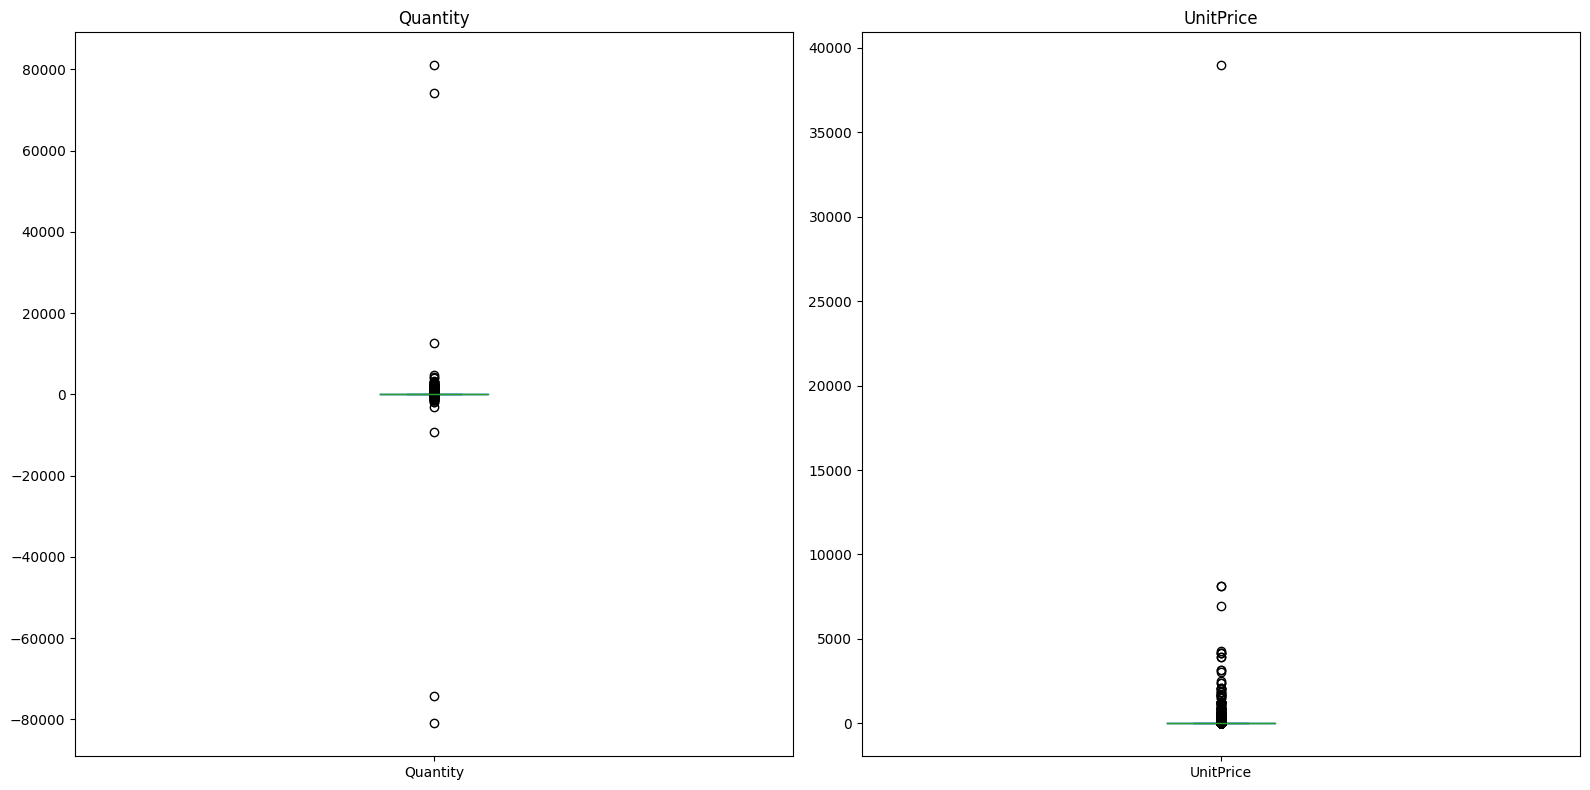

In [ ]:
NumericColumns = ['Quantity', 'UnitPrice']
fig = plt.figure (figsize = (16,8 ))
for i, c in enumerate(NumericColumns):
   ax = fig.add_subplot(1,2,i+1)
   df[c].plot.box(ax = ax)
   ax.set_title(c)
plt.tight_layout()
plt.show()

In [ ]:
df[['UnitPrice', 'Quantity']].describe([0.1, 0.25, 0.5, 0.75, 0.99]).T

count       mean         std      min   10%   25%   50%    75%  \
UnitPrice  406838.0   3.460510   69.314396      0.0  0.55  1.25  1.95   3.75   
Quantity   406838.0  12.061263  248.690622 -80995.0  1.00  2.00  5.00  12.00   

             99%      max  
UnitPrice   15.0  38970.0  
Quantity   120.0  80995.0

In [ ]:
def outlier_process(dataframe, column, q1 = 0.25, q3 = 0.75):
      df_  = dataframe.copy()
      quartile1 = df_[column].quantile(q1)
      quartile3 = df_[column].quantile(q3)
      iqr = quartile3 - quartile1
      uplimit = quartile3 + 1.5 * iqr
      lowlimit = quartile1 - 1.5*iqr
      df_.loc[df_[column]<lowlimit,column] = lowlimit
      df_.loc[df_[column]>uplimit,column] = uplimit
      return df_


def process(df,column,q1, q3):
   df_  = df.copy()
   df_.dropna()
   df_.drop_duplicates()
   df_ = df_[df_[column]>0]
   result = outlier_process(df_, column, q1, q3)
   return result


In [ ]:
df = process(df,'Quantity', 0.1, 0.99)
df = process(df, 'UnitPrice',0.1, 0.99)

In [ ]:
df[['UnitPrice', 'Quantity']].describe([0.1, 0.25, 0.5, 0.75, 0.99]).T

count       mean        std    min   10%   25%   50%    75%  \
UnitPrice  397893.0   2.892659   3.218176  0.001  0.55  1.25  1.95   3.75   
Quantity   397893.0  11.830761  25.522817  1.000  1.00  2.00  6.00  12.00   

              99%     max  
UnitPrice   14.95   36.55  
Quantity   120.00  298.50

## Customer Retention Analysis

### Customer Cohort Analysis

In [ ]:
def ConvertMonth(x):
    month_ = dt.datetime(x.year, x.month, 1)
    return month_
df['InvoiceMonth'] = df['InvoiceDate'].apply(ConvertMonth)
df['CohortMonth'] = df.groupby('CustomerID')['InvoiceMonth'].transform('min')
display(df)

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
541913    581588     22138        BAKING SET 9 PIECE RETROSPOT        3.0   
541914    581589     22138        BAKING SET 9 PIECE RETROSPOT        8.0   
541915    581589     23256          CHILDRENS CUTLERY SPACEBOY        4.0   
541916    581589     21217        RED RETROSPOT ROUND CAKE TINS      24.0   
541917    581590     21217        RED RETROSPOT ROUND CAKE TINS      24.0   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541913 2011-12-09 12:50:00       4.95     12680.0          France   
541914 2011-12-09 12:39:00       4.95     12680.0          France   
541915 2011-12-09 12:50:00       4.15     12680.0          France   
541916 2011-12-09 12:49:00       8.95     13113.0  United Kingdom   
541917 2011-12-09 12:45:00       8.95     13113.0  United Kingdom   

       InvoiceMonth CohortMonth  
0        2010-12-01  2010-12-01  
1        2010-12-01  2010-12-01  
2        2010-12-01  2010-12-01  
3        2010-12-01  2010-12-01  
4        2010-12-01  2010-12-01  
...             ...         ...  
541913   2011-12-01  2011-08-01  
541914   2011-12-01  2011-08-01  
541915   2011-12-01  2011-08-01  
541916   2011-12-01  2010-12-01  
541917   2011-12-01  2010-12-01  

[397893 rows x 10 columns]

In [ ]:
def extract_time(df, column):
    year_ = df[column].dt.year
    month_ = df[column].dt.month
    return year_, month_

Invoice_year, Invoice_month = extract_time(df,'InvoiceMonth')
Cohort_year, Cohort_month = extract_time(df,'CohortMonth')
df['Index'] = (Invoice_year - Cohort_year)*12+(Invoice_month-Cohort_month)+1 #vì là tính theo tháng cho nên phải nhân thêm 12
display(df)

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
541913    581588     22138        BAKING SET 9 PIECE RETROSPOT        3.0   
541914    581589     22138        BAKING SET 9 PIECE RETROSPOT        8.0   
541915    581589     23256          CHILDRENS CUTLERY SPACEBOY        4.0   
541916    581589     21217        RED RETROSPOT ROUND CAKE TINS      24.0   
541917    581590     21217        RED RETROSPOT ROUND CAKE TINS      24.0   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541913 2011-12-09 12:50:00       4.95     12680.0          France   
541914 2011-12-09 12:39:00       4.95     12680.0          France   
541915 2011-12-09 12:50:00       4.15     12680.0          France   
541916 2011-12-09 12:49:00       8.95     13113.0  United Kingdom   
541917 2011-12-09 12:45:00       8.95     13113.0  United Kingdom   

       InvoiceMonth CohortMonth  Index  
0        2010-12-01  2010-12-01      1  
1        2010-12-01  2010-12-01      1  
2        2010-12-01  2010-12-01      1  
3        2010-12-01  2010-12-01      1  
4        2010-12-01  2010-12-01      1  
...             ...         ...    ...  
541913   2011-12-01  2011-08-01      5  
541914   2011-12-01  2011-08-01      5  
541915   2011-12-01  2011-08-01      5  
541916   2011-12-01  2010-12-01     13  
541917   2011-12-01  2010-12-01     13  

[397893 rows x 11 columns]

In [ ]:
#lạp cohort theo dõi lượng khách hàng qua từng tháng
CohortCustomer = df.groupby(['CohortMonth', 'Index']).agg({'CustomerID': pd.Series.nunique})
CohortCustomer = CohortCustomer.reset_index()
CohortCustomer = CohortCustomer.pivot(index = 'CohortMonth', columns = 'Index', values = 'CustomerID')
CohortCustomer.index = CohortCustomer.index.strftime("%B %Y")


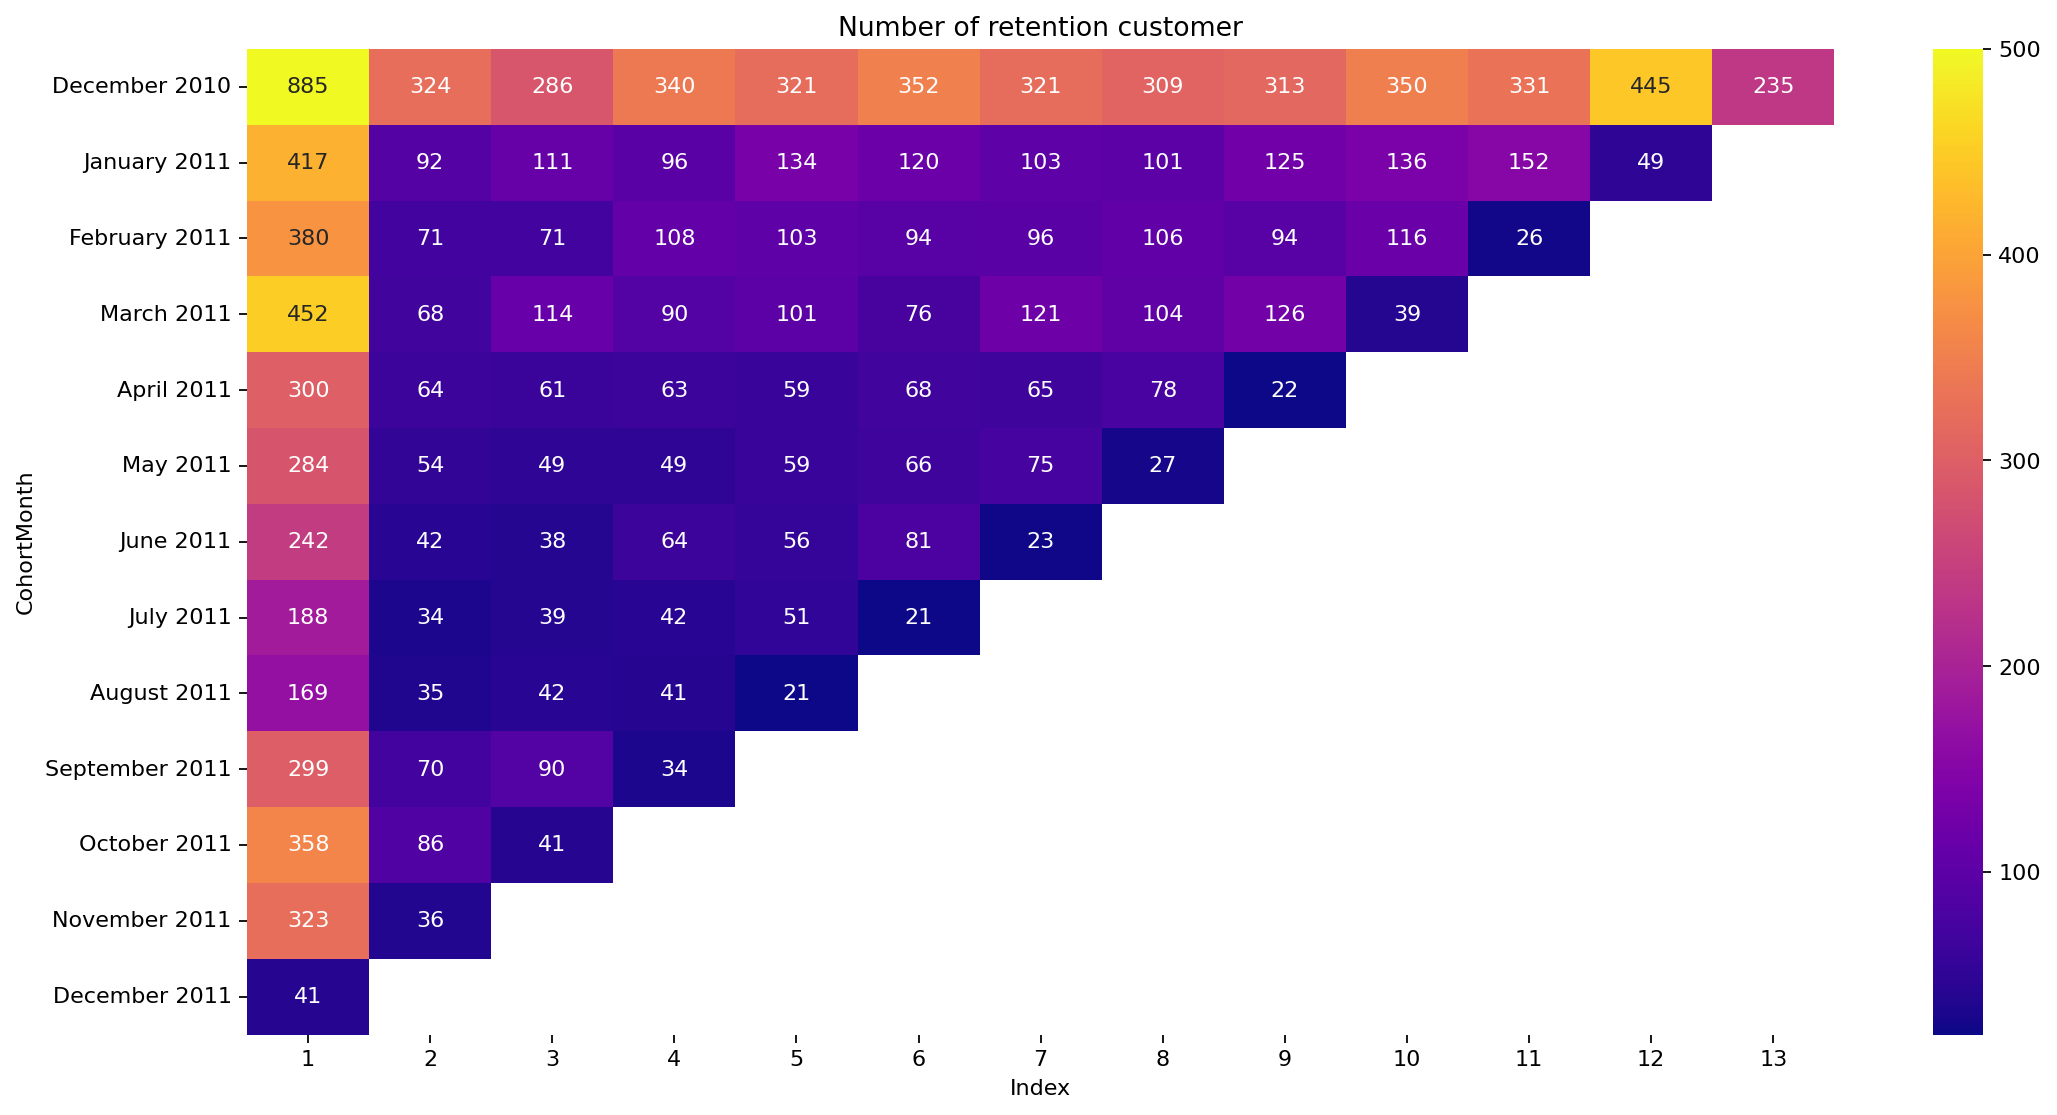

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), dpi = 160)
ax.set_title('Number of retention customer')
ax.set_ylabel('Tháng')
sns.heatmap(data=CohortCustomer, annot=True, fmt=".0f", cmap="plasma", vmax=500, ax=ax)
plt.show()



Biểu đồ cho thấy số lượng quay lại mỗi tháng giảm dần theo thời gian so với lượng khách hàng đầu tiên mà cửa hàng có được. Đây là xu hướng chung của mọi đơn vị kinh doanh. Tuy nhiên điều đặc biệt đáng nói ở đây là lượng khách hàng quay lại của cửa hàng này so với tháng ban đầu là vô cùng ít, chỉ cách nhau với tháng ban đầu có một tháng mà lượng khách hàng quay lại chưa đạt được 50% các tháng sau còn tệ hơn. Sự sụt giảm nghiêm trọng này có thể xuất phát từ một số yếu tố như chất lượng sản phẩm không tốt, các chiến dịch tiếp thị được sử dụng để thu hút khách hàng chưa đạt được hiệu quả hoặc chính sách chăm sóc khách hàng sau khi mua sản phẩm chưa được tốt,...

### Number Of New Customers Month By Month Using A Line chart

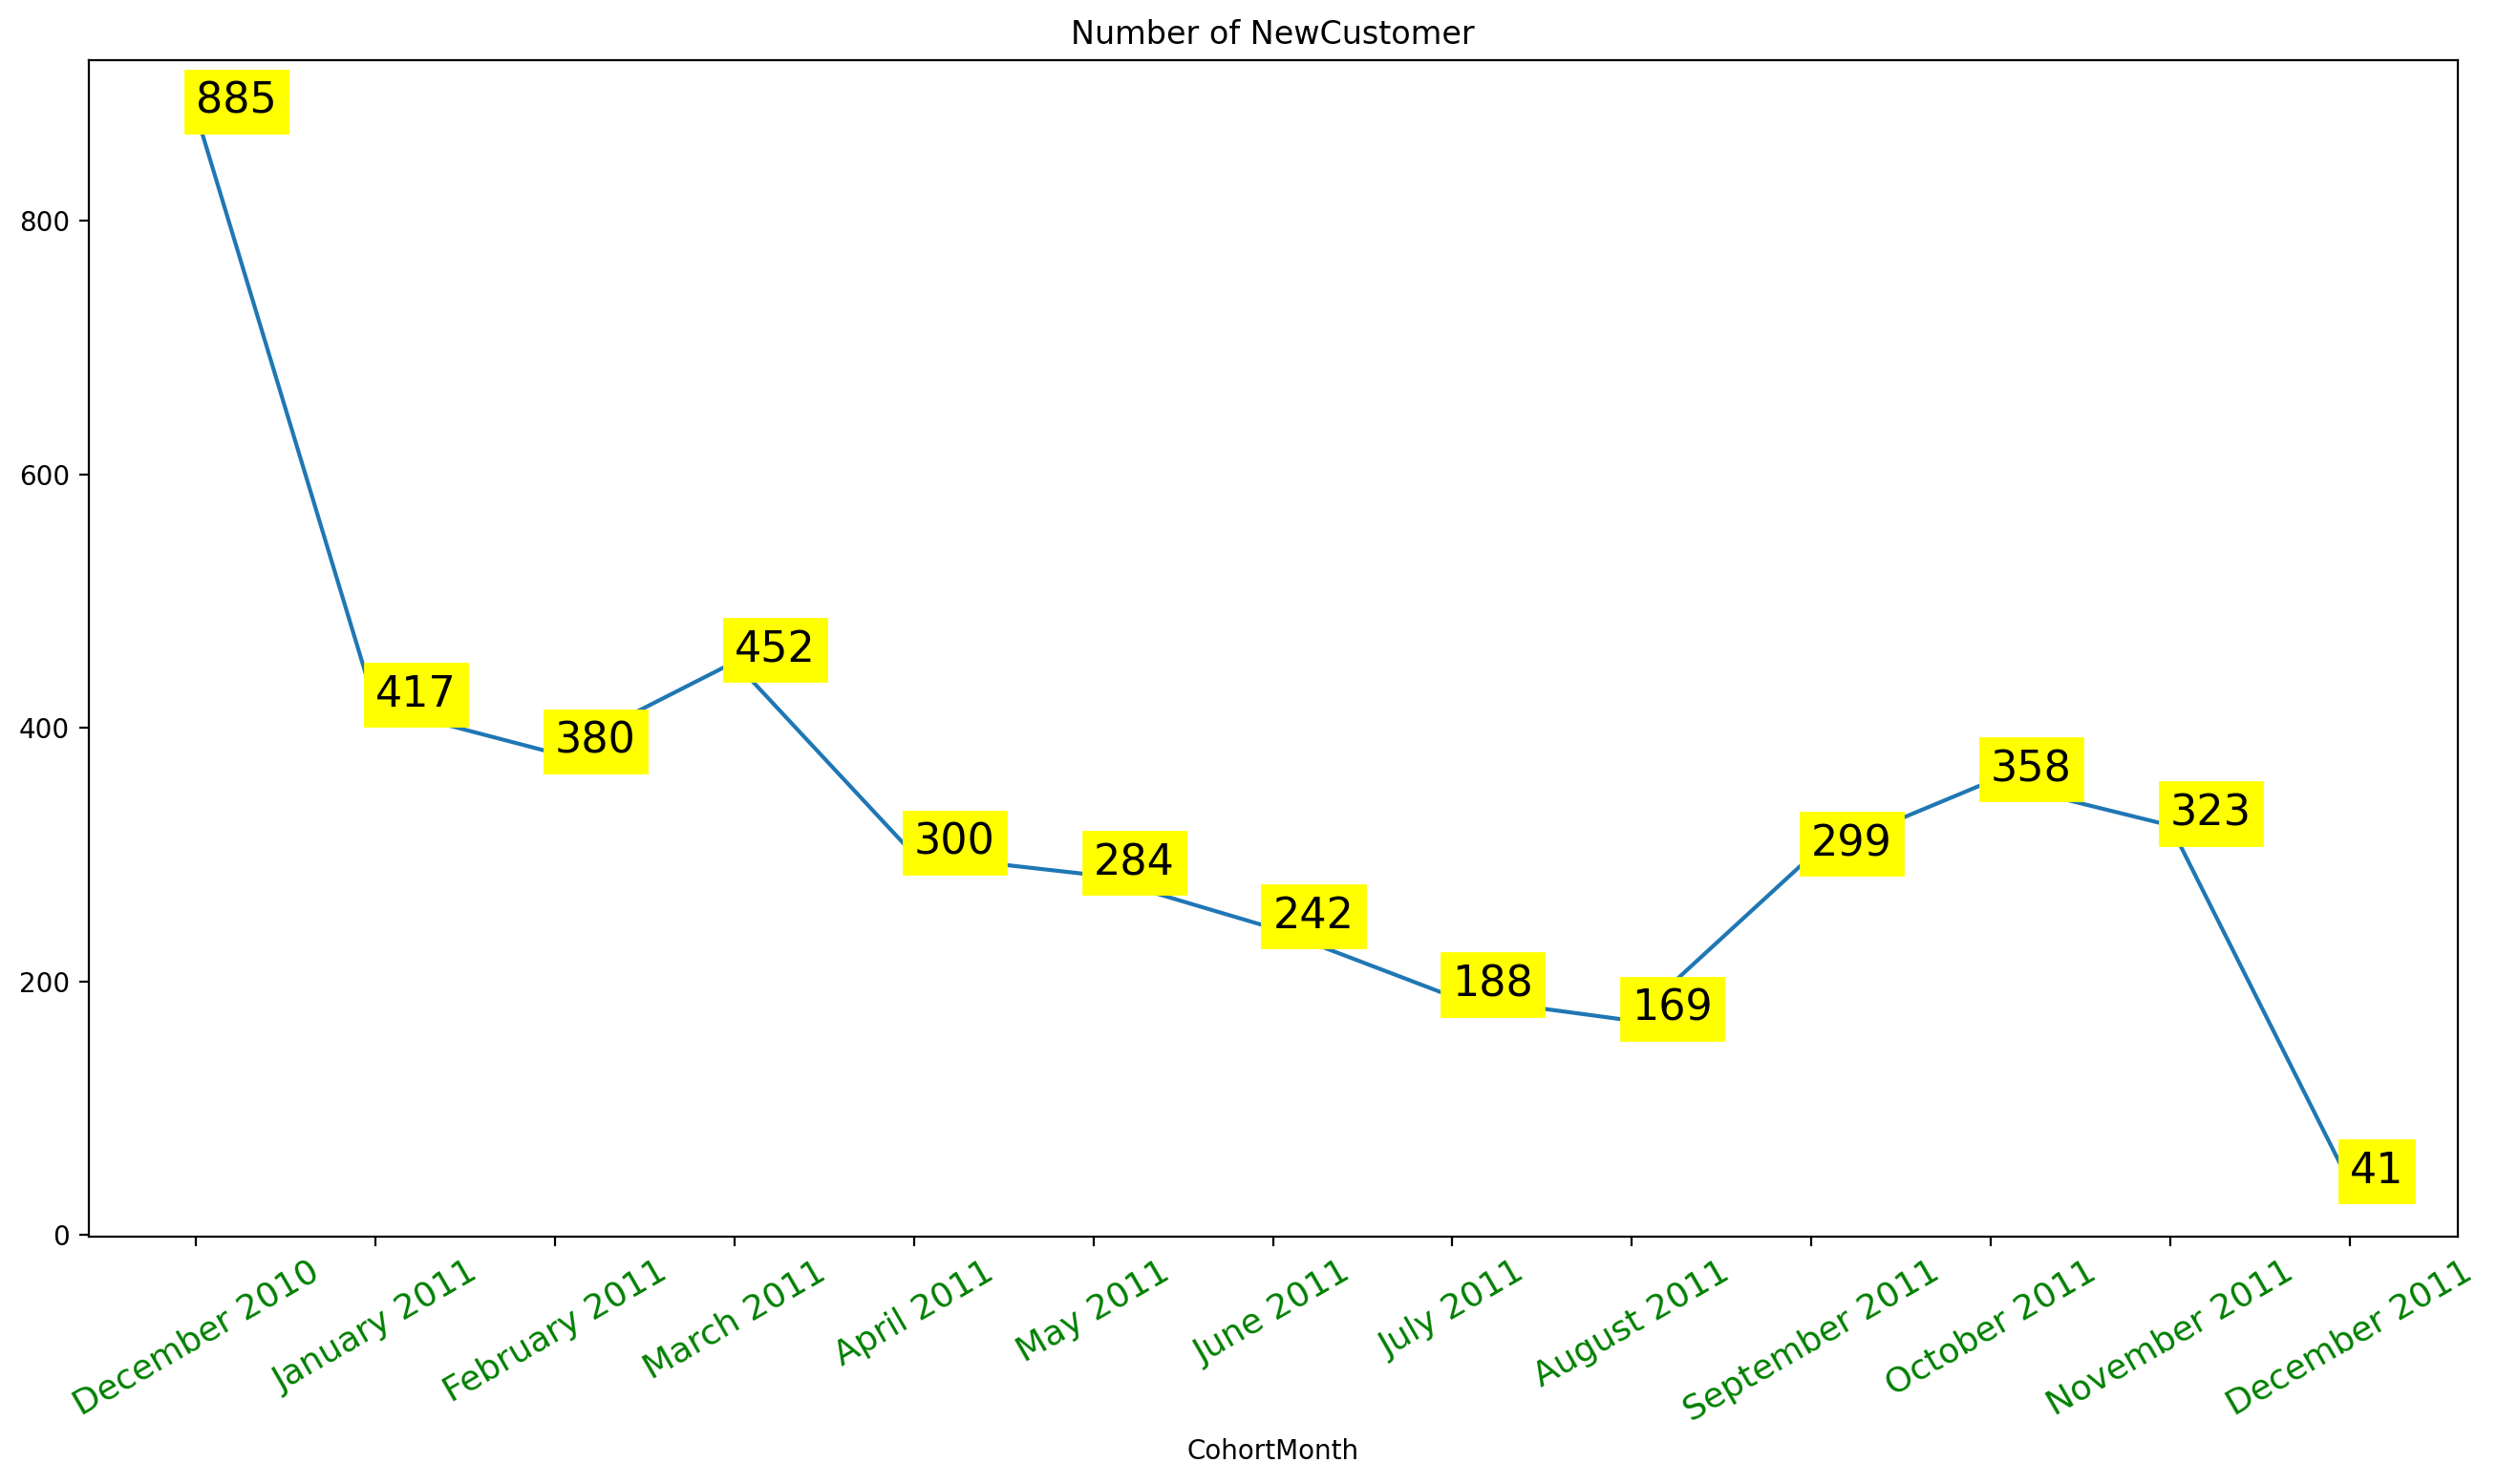

In [ ]:
fig, ax = plt.subplots(figsize = (16,8), dpi = 200)
ax.set_title('Number of NewCustomer')
sns.lineplot(x = CohortCustomer.index, y = CohortCustomer.iloc[:,0].values)
plt.xticks(rotation = 30, size = 13, color = "green")
for x, y in zip(CohortCustomer.index,CohortCustomer.iloc[:,0].values):
  plt.text(x=x, y= y, s = '{:.0f}'.format(y), color = 'black', size = 16).set_backgroundcolor('yellow')


Có khả năng cao là cửa hàng này là cửa hàng nhỏ hoặc sản phẩm chúng ta bán chưa thật sự là cần thiết đối với nhiều người tại thời điểm lúc bấy giờ hoặc do các chiến dịch Marketing liên quan đến việc tăng nhận thức của khách hàng về sản phẩm còn hạn chế chưa thật sự hiệu quả cho nên mới dẫn đến tính trạng lượng khách hàng mới vô cùng ít nhưng lại sụt giảm qua các tháng cụ thể chỉ cách nhau có 1 tháng nhưng số lượng khách hàng mới của tháng 1 năm 2011 đã giảm gần như là 50% so với tháng 12 năm trước đặc biệt với số liệu thu thập được của tháng 12 năm 2011 thì lượng khách hàng mới mà công ty có được chỉ là 41 người chỉ đạt được 4.7% so với tháng đầu ra mắt. Tuy nhiên chỉ với biểu đồ này thì cũng chưa nói lên được là công ty có đang làm tốt hay không vì chúng ta cần phải đánh giá về doanh thu và chi phí cũng như nhiều yếu tố khác đặc biệt là đánh giá xem doanh thu có thật là phụ thuộc lớn vào số lượng khách hàng hay không

### Customer Retention Rate By Cohort Analysis

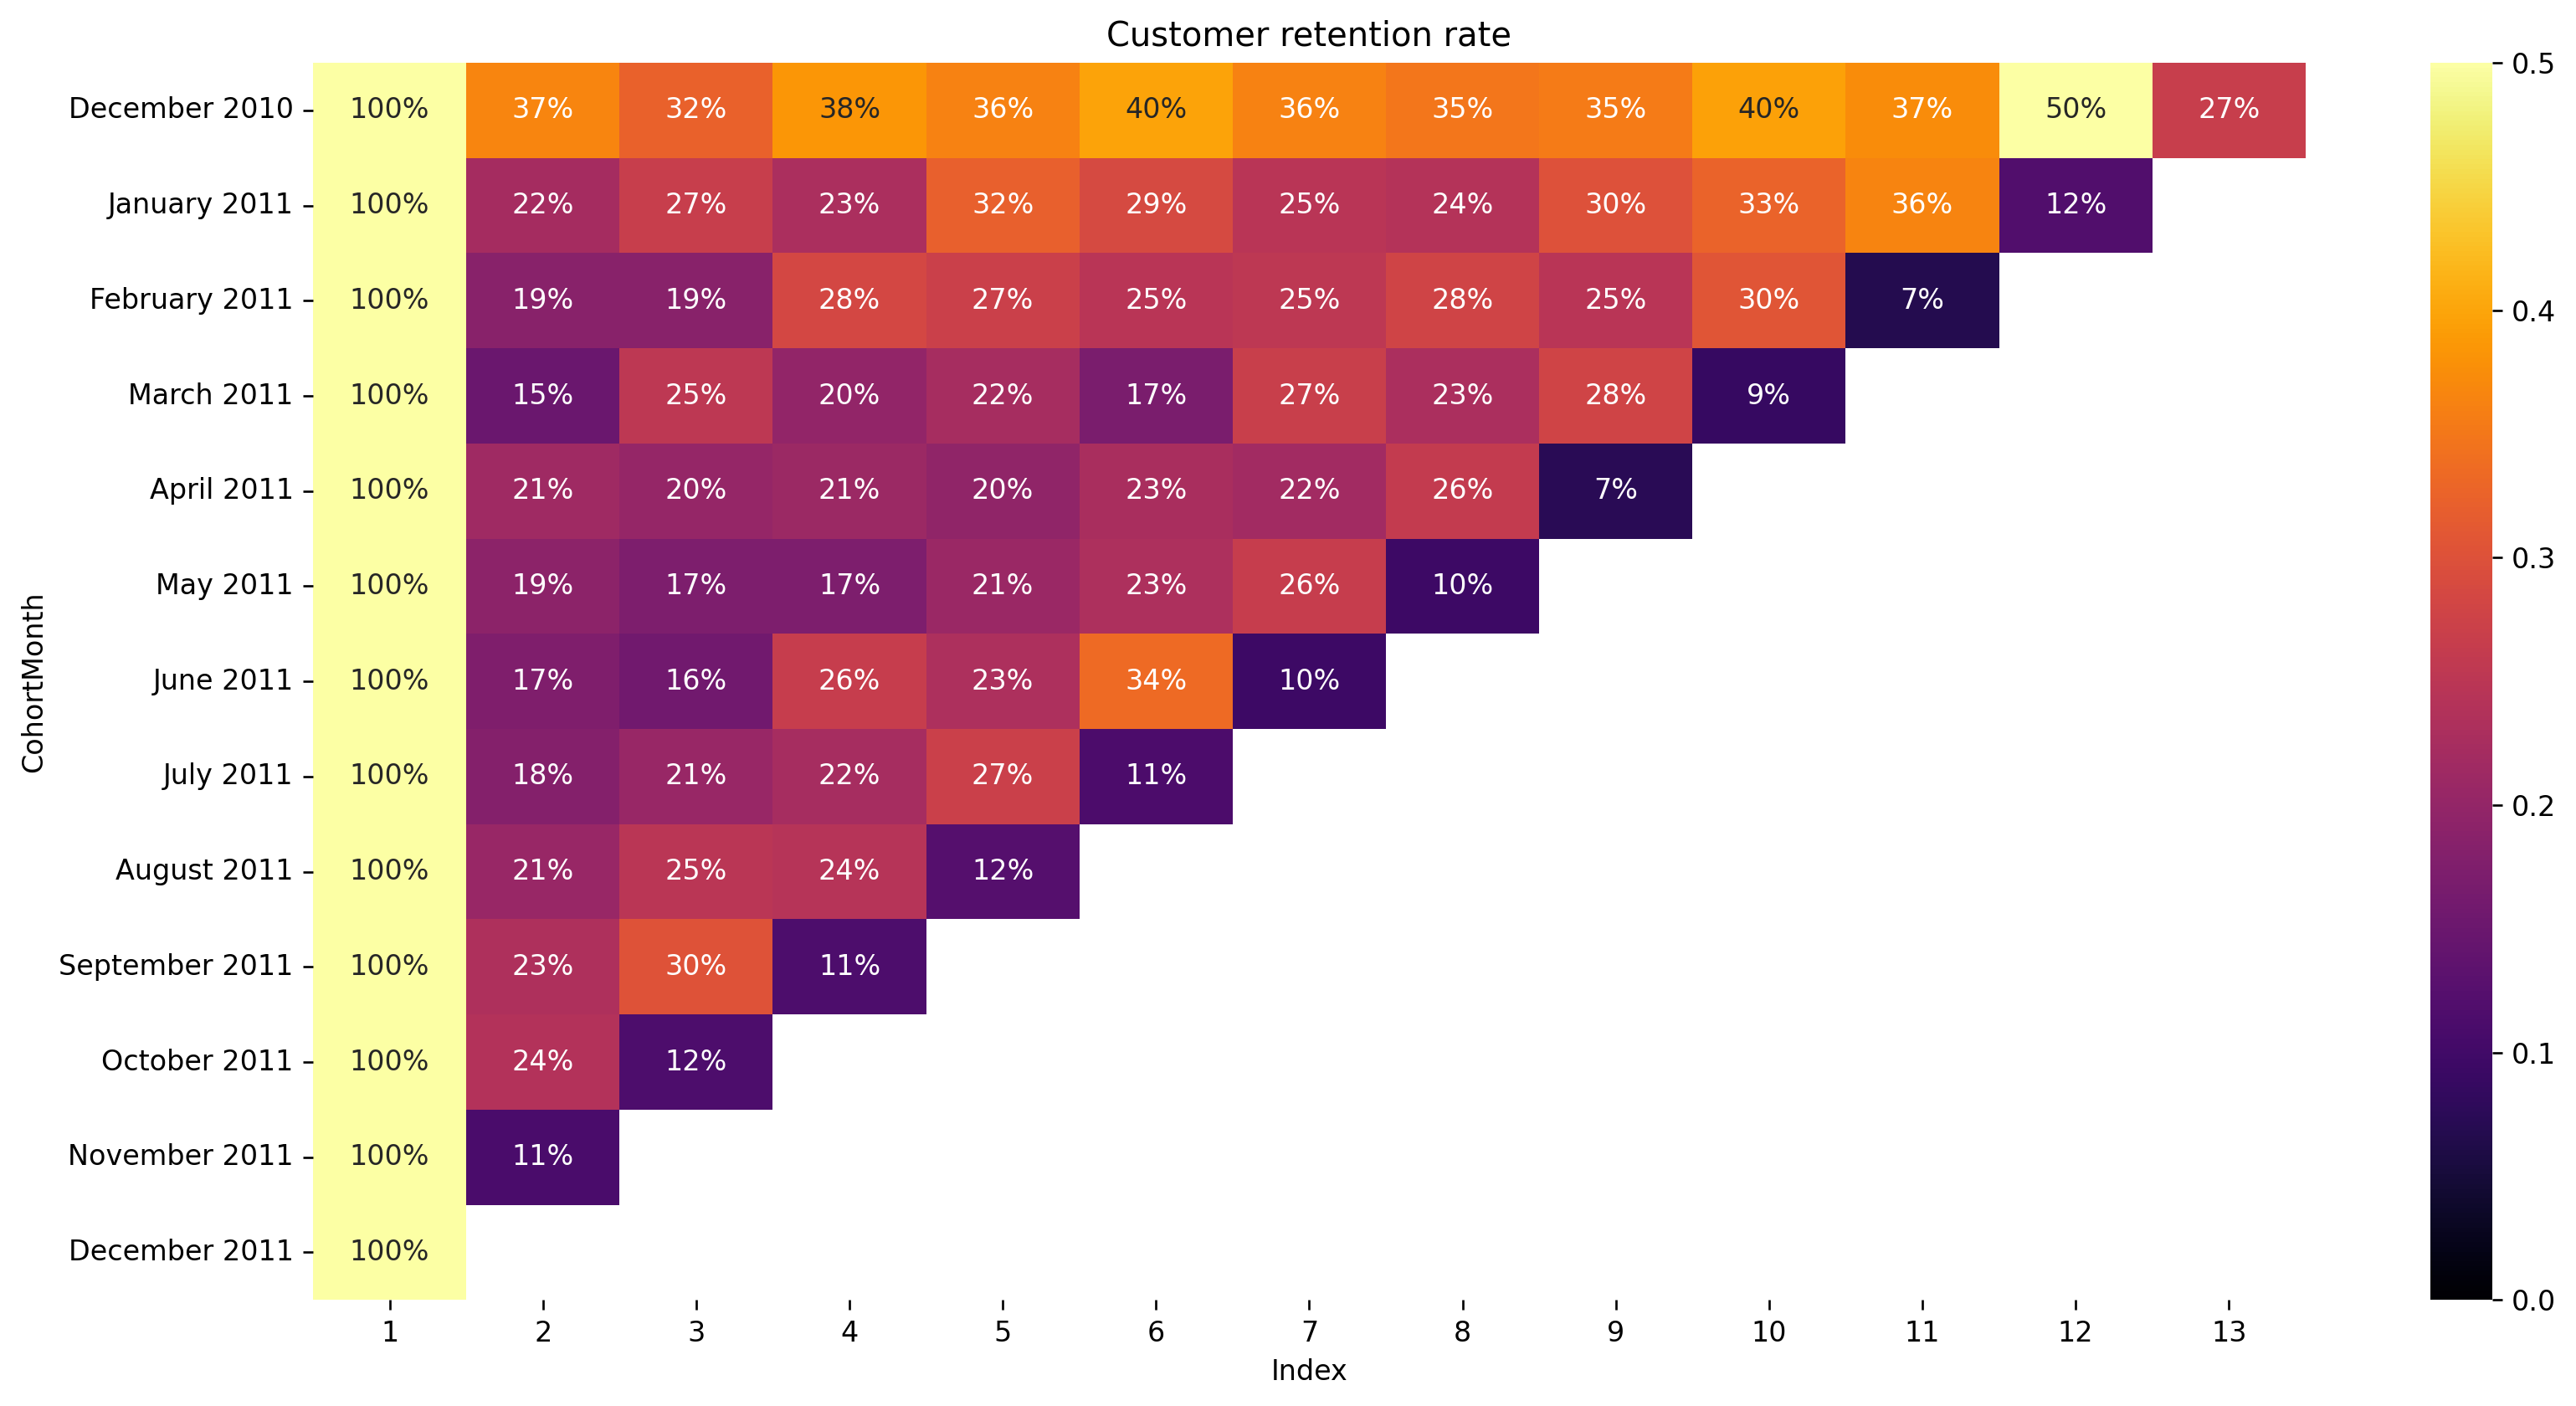

In [ ]:
# tính Customer retention rate
CohortNewCustomer = CohortCustomer[1]
RetentionRate= round(CohortCustomer.divide(CohortNewCustomer,axis = 0),3)
fig, ax = plt.subplots(figsize = (16,8), dpi = 240)
ax.set_title("Customer retention rate")
sns.heatmap(data = RetentionRate, annot = True, fmt = '.0%', cmap = 'inferno',  ax=ax, vmin = 0.0, vmax = 0.5)
plt.show()



Như đã phân tích ở trên tỉ lệ quay lại của khách hàng từ ngày đầu mua sắm là rất thấp chưa kể tỉ lệ đó còn giảm dần qua thời gian tuy nhiên có những tháng sau đó tỷ lệ khách hàng quay lại so với tháng đầu đã tăng cao hơn một số tháng trước ( ví dụ 12 tháng sau kể từ tháng đầu tiên mua sắm là tháng 10 năm 2022 con số tỷ lệ quay lại là 50%, so với tháng trước đã tăng 13% ) tuy nhiên tỷ lệ này lại không được duy trì và giảm ngay lập tức vào tháng sau đó

### Revenue Vs Number of Customer Per Month Analysis

In [ ]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
AovOverall = df.groupby('InvoiceMonth').agg({'CustomerID': pd.Series.nunique, 'Revenue': pd.Series.sum, 'InvoiceNo': pd.Series.nunique})
AovOverall.rename(columns = {'CustomerID': 'NoCustomer', 'InvoiceNo': 'NoOrders'}, inplace = True)
AovOverall['Aov'] = round(AovOverall['Revenue'].divide(AovOverall['NoOrders']),2)
AovOverall.index = AovOverall.index.strftime('%b %Y')
AovOverall

NoCustomer      Revenue  NoOrders     Aov
InvoiceMonth                                           
Dec 2010             885   543291.690      1400  388.07
Jan 2011             741   456958.200       987  462.98
Feb 2011             758   430266.635       997  431.56
Mar 2011             974   571204.040      1321  432.40
Apr 2011             856   429718.596      1149  373.99
May 2011            1056   644312.960      1555  414.35
Jun 2011             991   604040.065      1393  433.63
Jul 2011             949   585785.946      1331  440.11
Aug 2011             935   618840.610      1280  483.47
Sep 2011            1266   893233.522      1755  508.96
Oct 2011            1364   979632.050      1929  507.84
Nov 2011            1664  1124517.630      2657  423.23
Dec 2011             615   326508.925       781  418.07

✈

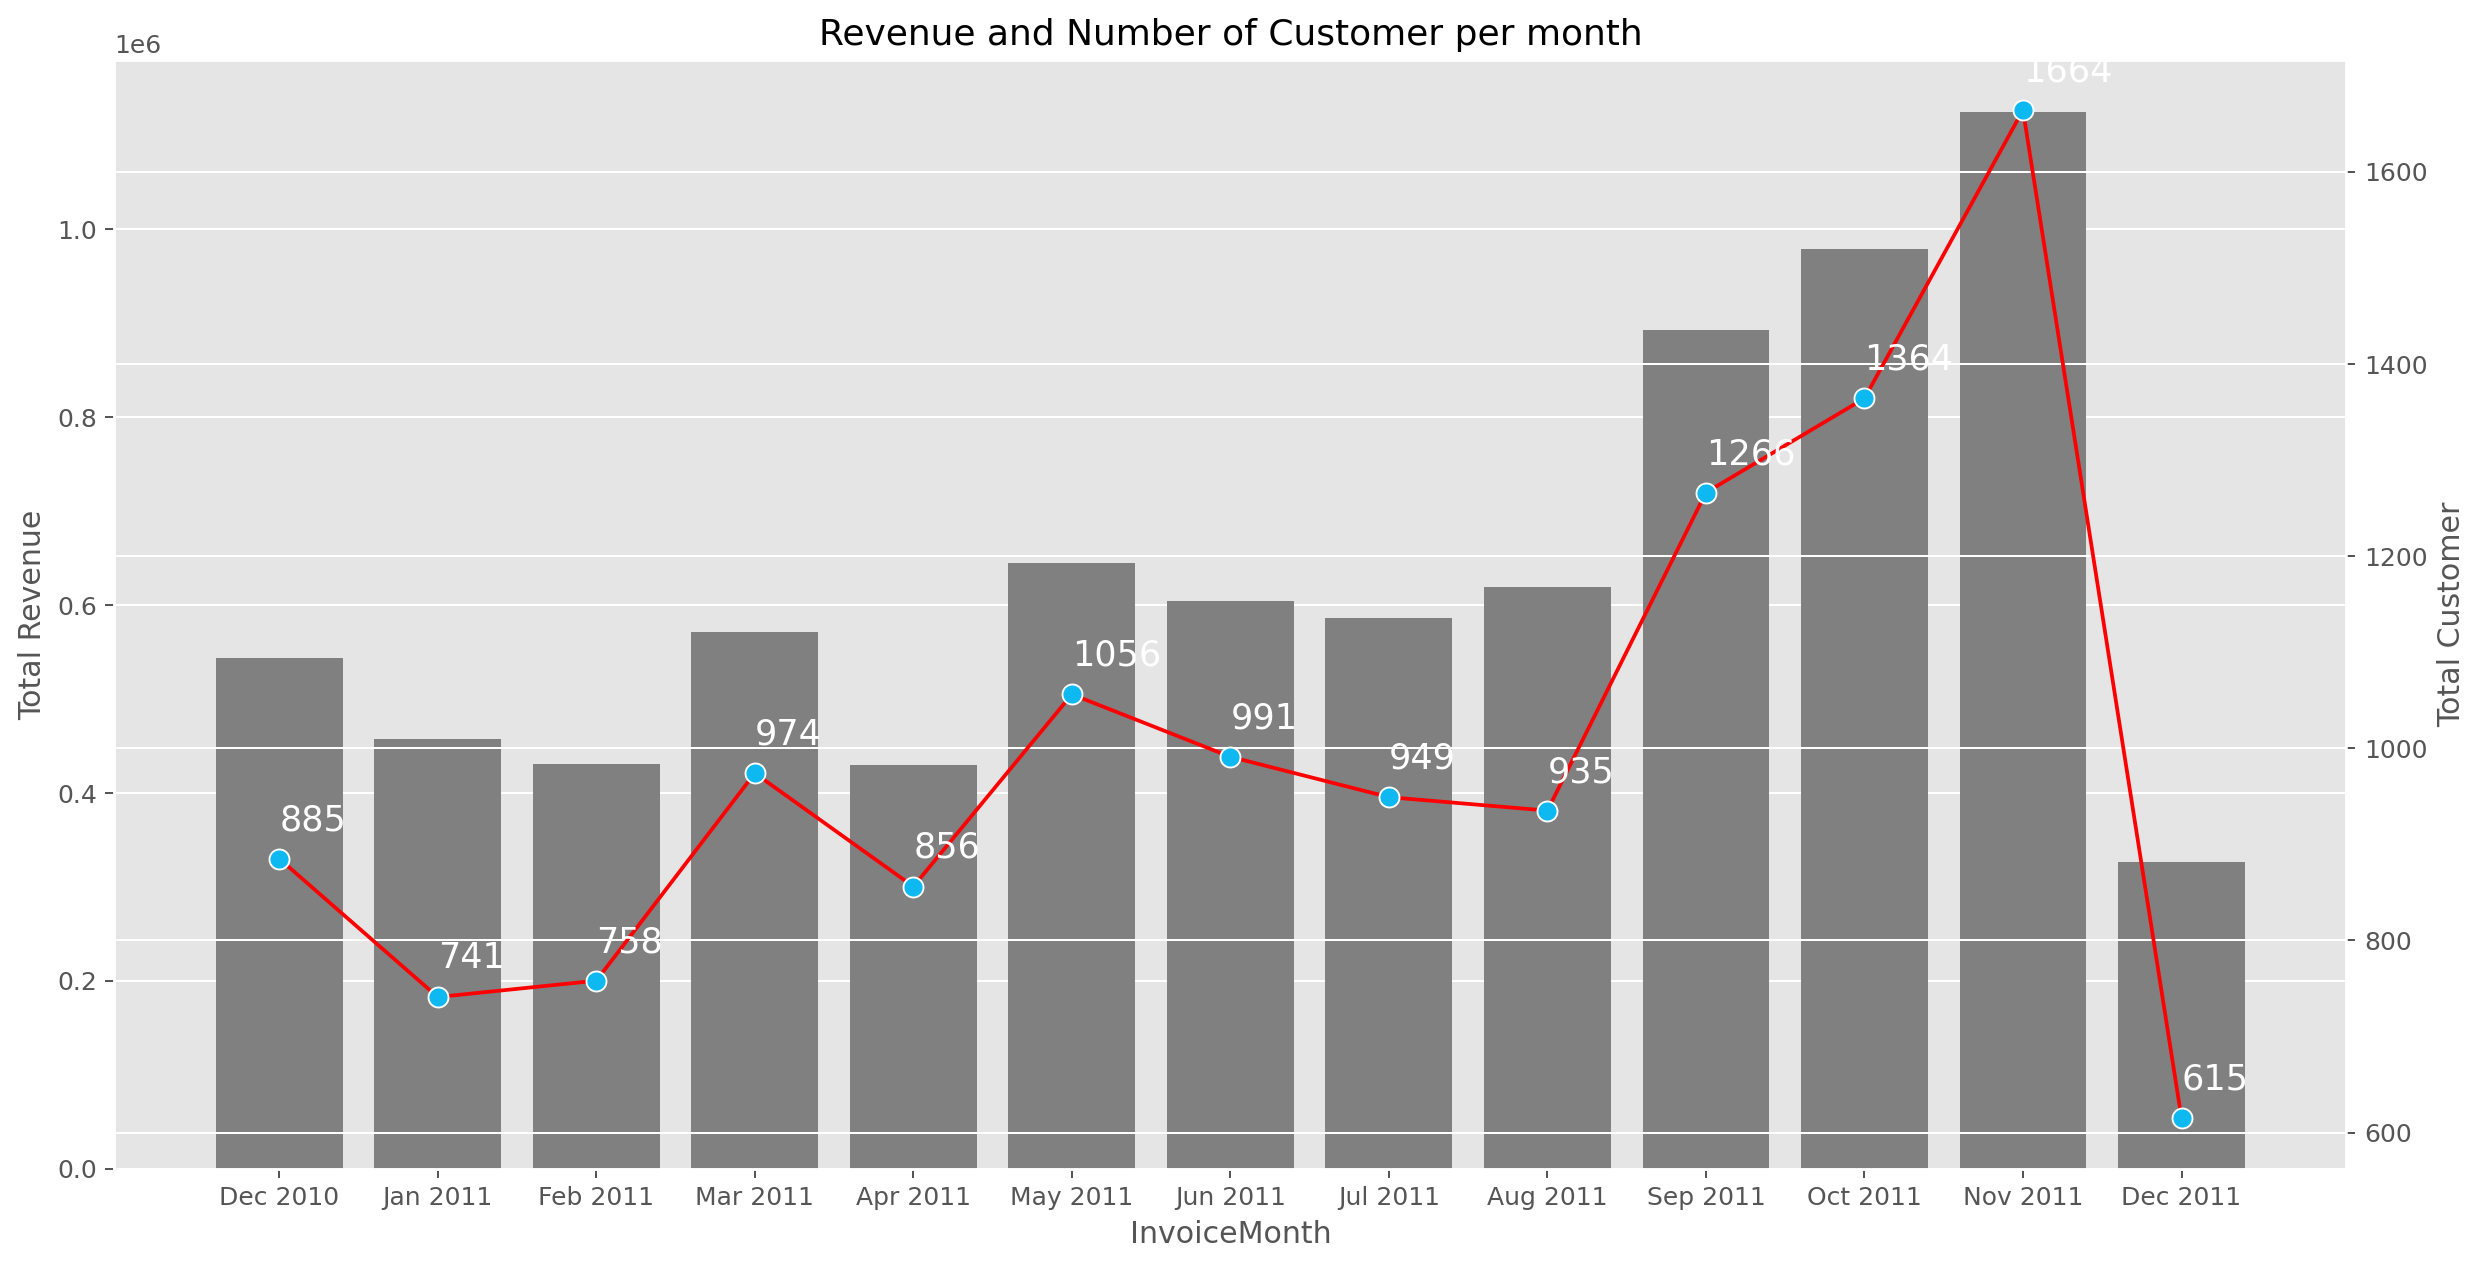

In [ ]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (16,8), dpi = 180 )
sns.barplot(x = AovOverall.index, y = AovOverall['Revenue'], color = 'grey', ax= ax)
ax2 = ax.twinx()
sns.lineplot(x = AovOverall.index, y = AovOverall.NoCustomer, ax = ax2,  color = 'red', marker = "o", markeredgecolor = "white", markerfacecolor = "#0EB8F1", markersize=8 )
ax.set_ylabel("Total Revenue")
ax2.set_ylabel("Total Customer")
plt.title("Revenue and Number of Customer per month")
for x, y in zip(AovOverall.index,  AovOverall.NoCustomer):
    ax2.text(x , y + 30 , y, color = "white", size = 14)
plt.show()






Biểu đồ này cho ta thấy được doanh thu của cửa hàng chịu sự chi phối lớn từ số lượng khách hàng chứ không đến từ giá trị của sản phẩm. Tuy nhiên cửa hàng này lại đang không thực sự làm tốt trong việc chăm sóc khách hàng cũ cũng như thu hút khách hàng mới. Nếu cửa hàng có những chính sách cải thiện giúp tăng tỷ lệ retention rate, new customer thì chắc chắn doanh thu của cửa hàng sẽ tốt hơn giá trị của doanh thu đo lường hiện taị.

### Average Order Value By Cohort Analysis

In [ ]:
CohortAov = df.groupby(["CohortMonth", "Index"]).agg({'InvoiceNo': pd.Series.nunique,
                                                     'Revenue': pd.Series.sum}).reset_index()
CohortAov['Aov'] = CohortAov.Revenue.divide(CohortAov.InvoiceNo).round(2)
CohortAov = CohortAov.pivot(index = 'CohortMonth', columns = 'Index', values = 'Aov')
CohortAov.index = CohortAov.index.strftime('%B %Y')
CohortAov

Index               1       2       3       4       5       6       7   \
CohortMonth                                                              
December 2010   388.07  507.40  490.97  492.43  395.44  484.36  523.15   
January 2011    414.11  464.23  415.76  378.90  429.61  521.39  469.52   
February 2011   358.03  302.41  372.29  324.04  315.74  286.24  445.40   
March 2011      390.89  321.95  372.32  342.71  412.42  393.80  438.06   
April 2011      354.13  321.23  345.25  337.29  379.40  396.73  380.81   
May 2011        352.37  260.65  331.82  299.30  339.78  412.08  319.57   
June 2011       356.24  255.87  305.93  388.03  363.34  328.06  304.59   
July 2011       341.35  310.17  300.78  365.44  275.58  275.23     NaN   
August 2011     431.53  449.82  546.79  743.15  578.28     NaN     NaN   
September 2011  448.39  298.75  291.42  323.84     NaN     NaN     NaN   
October 2011    387.51  298.43  240.66     NaN     NaN     NaN     NaN   
November 2011   336.99  312.71     NaN     NaN     NaN     NaN     NaN   
December 2011   432.61     NaN     NaN     NaN     NaN     NaN     NaN   

Index               8       9       10      11      12      13  
CohortMonth                                                     
December 2010   553.45  574.79  662.19  674.24  527.55  522.41  
January 2011    534.79  435.91  551.74  494.00  407.04     NaN  
February 2011   433.12  441.55  364.60  324.31     NaN     NaN  
March 2011      490.65  353.90  261.32     NaN     NaN     NaN  
April 2011      328.83  235.19     NaN     NaN     NaN     NaN  
May 2011        380.09     NaN     NaN     NaN     NaN     NaN  
June 2011          NaN     NaN     NaN     NaN     NaN     NaN  
July 2011          NaN     NaN     NaN     NaN     NaN     NaN  
August 2011        NaN     NaN     NaN     NaN     NaN     NaN  
September 2011     NaN     NaN     NaN     NaN     NaN     NaN  
October 2011       NaN     NaN     NaN     NaN     NaN     NaN  
November 2011      NaN     NaN     NaN     NaN     NaN     NaN  
December 2011      NaN     NaN     NaN     NaN     NaN     NaN

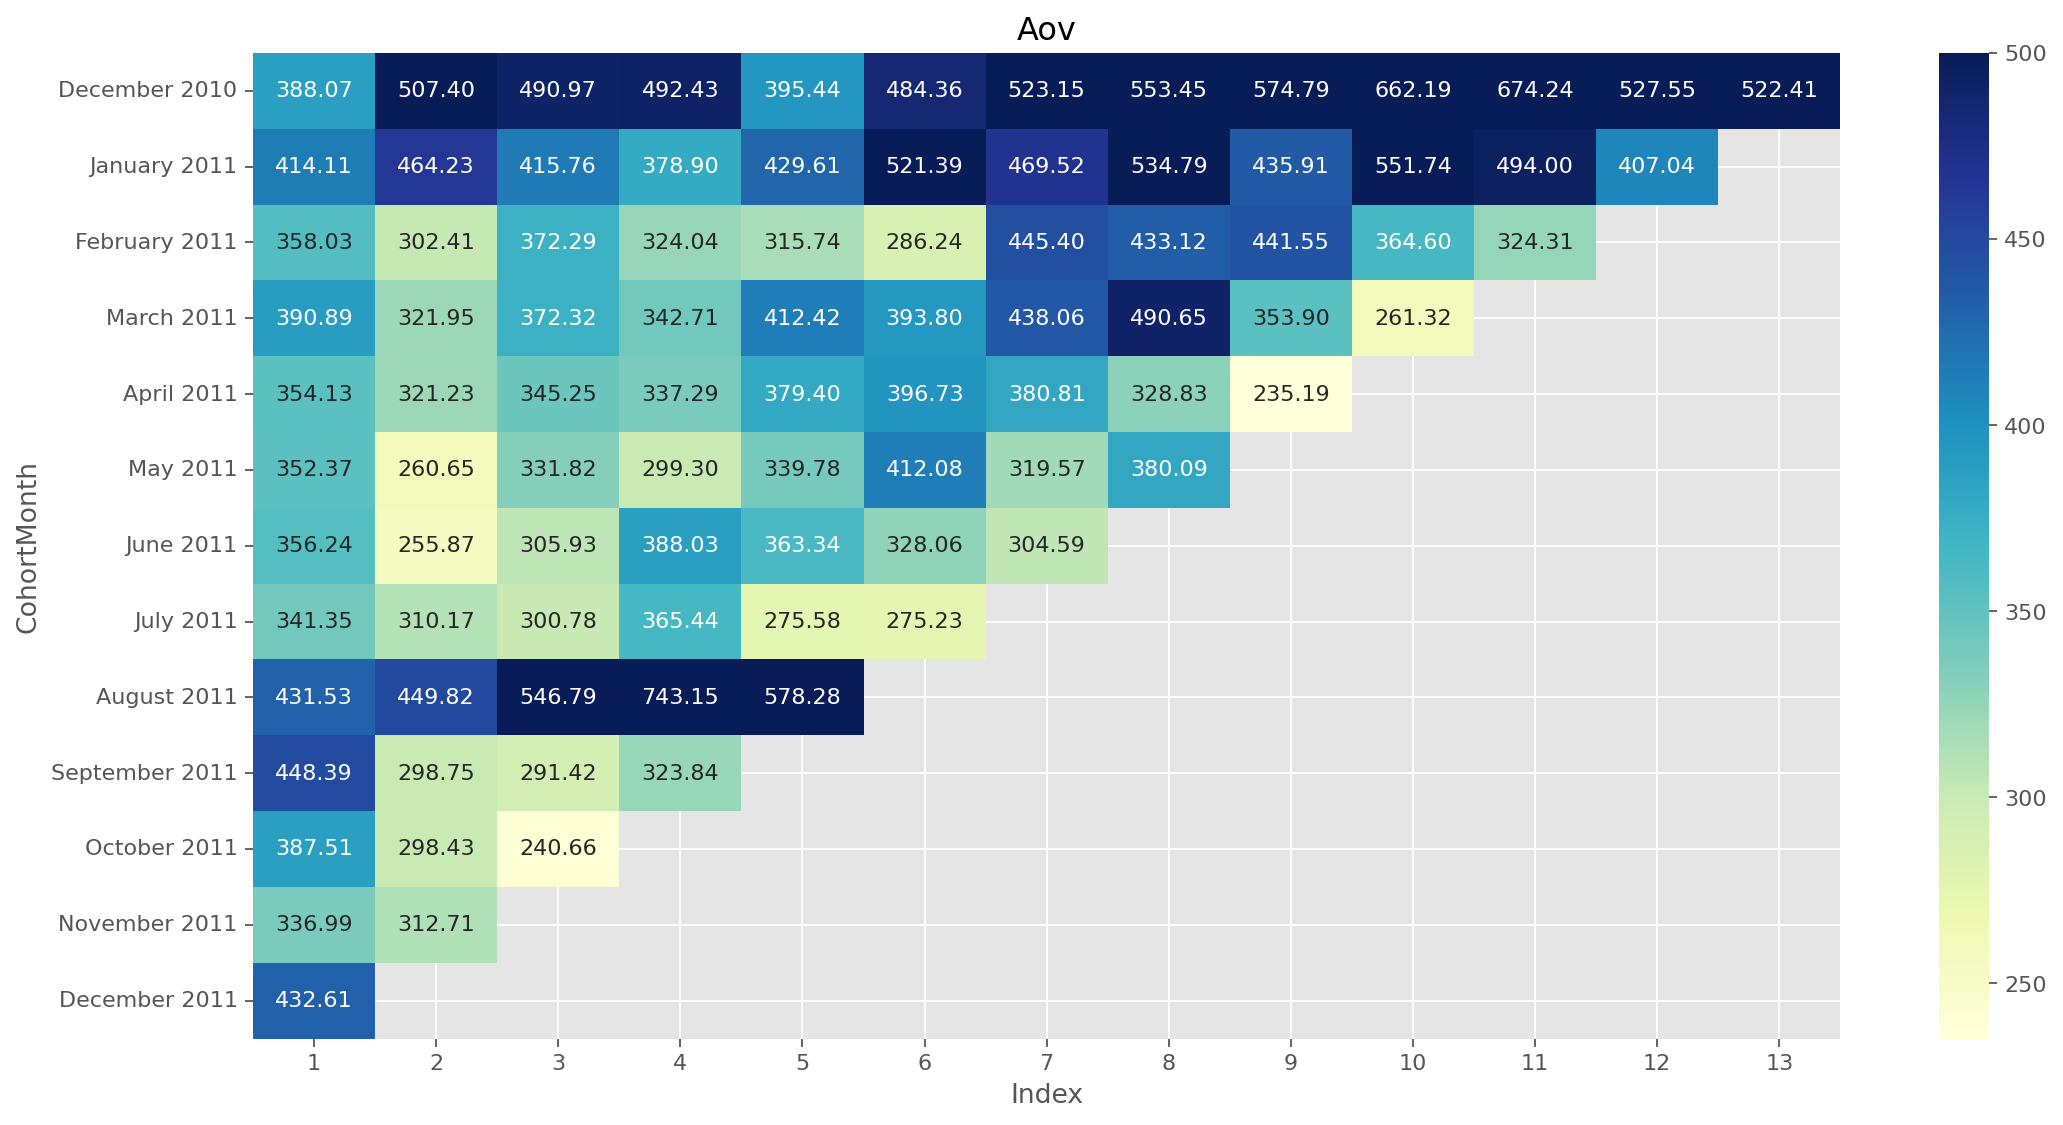

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), dpi = 160)
ax.set_title('Aov')
sns.heatmap(data=CohortAov, annot=True, fmt=".2f", cmap='YlGnBu', vmax=500, ax=ax)
plt.show()

Biểu đồ này cho ta thấy được tỉ lệ retention rate thấp không đến từ chất lượng của sản phẩm, dịch vụ mà cửa hàng cung cấp bằng chứng là đối với những khách hàng quay lại sau lần đầu sử dụng sản phẩm AOV của họ rất cao, cao hơn cả tháng đầu tiên họ bắt đầu đến với cửa hàng. Chưa kể Aov của khách hàng mới của tháng hiện tại cũng cao hơn tháng trước hoặc là giao động nhỏ so với tháng trước chứ không phải là tuột dốc vượt bậc như tỉ lệ rentention rate. Mặc khác  điều này giúp ta càng thêm khẳng định rằng tỉ lệ retention rate thấp là do các chính sách khôi phục khách hàng của cửa hàng đang thật sự chưa tốt cho nên mới dẫn đến tính trạng trên

### The Number Of Retained Customers In This Period

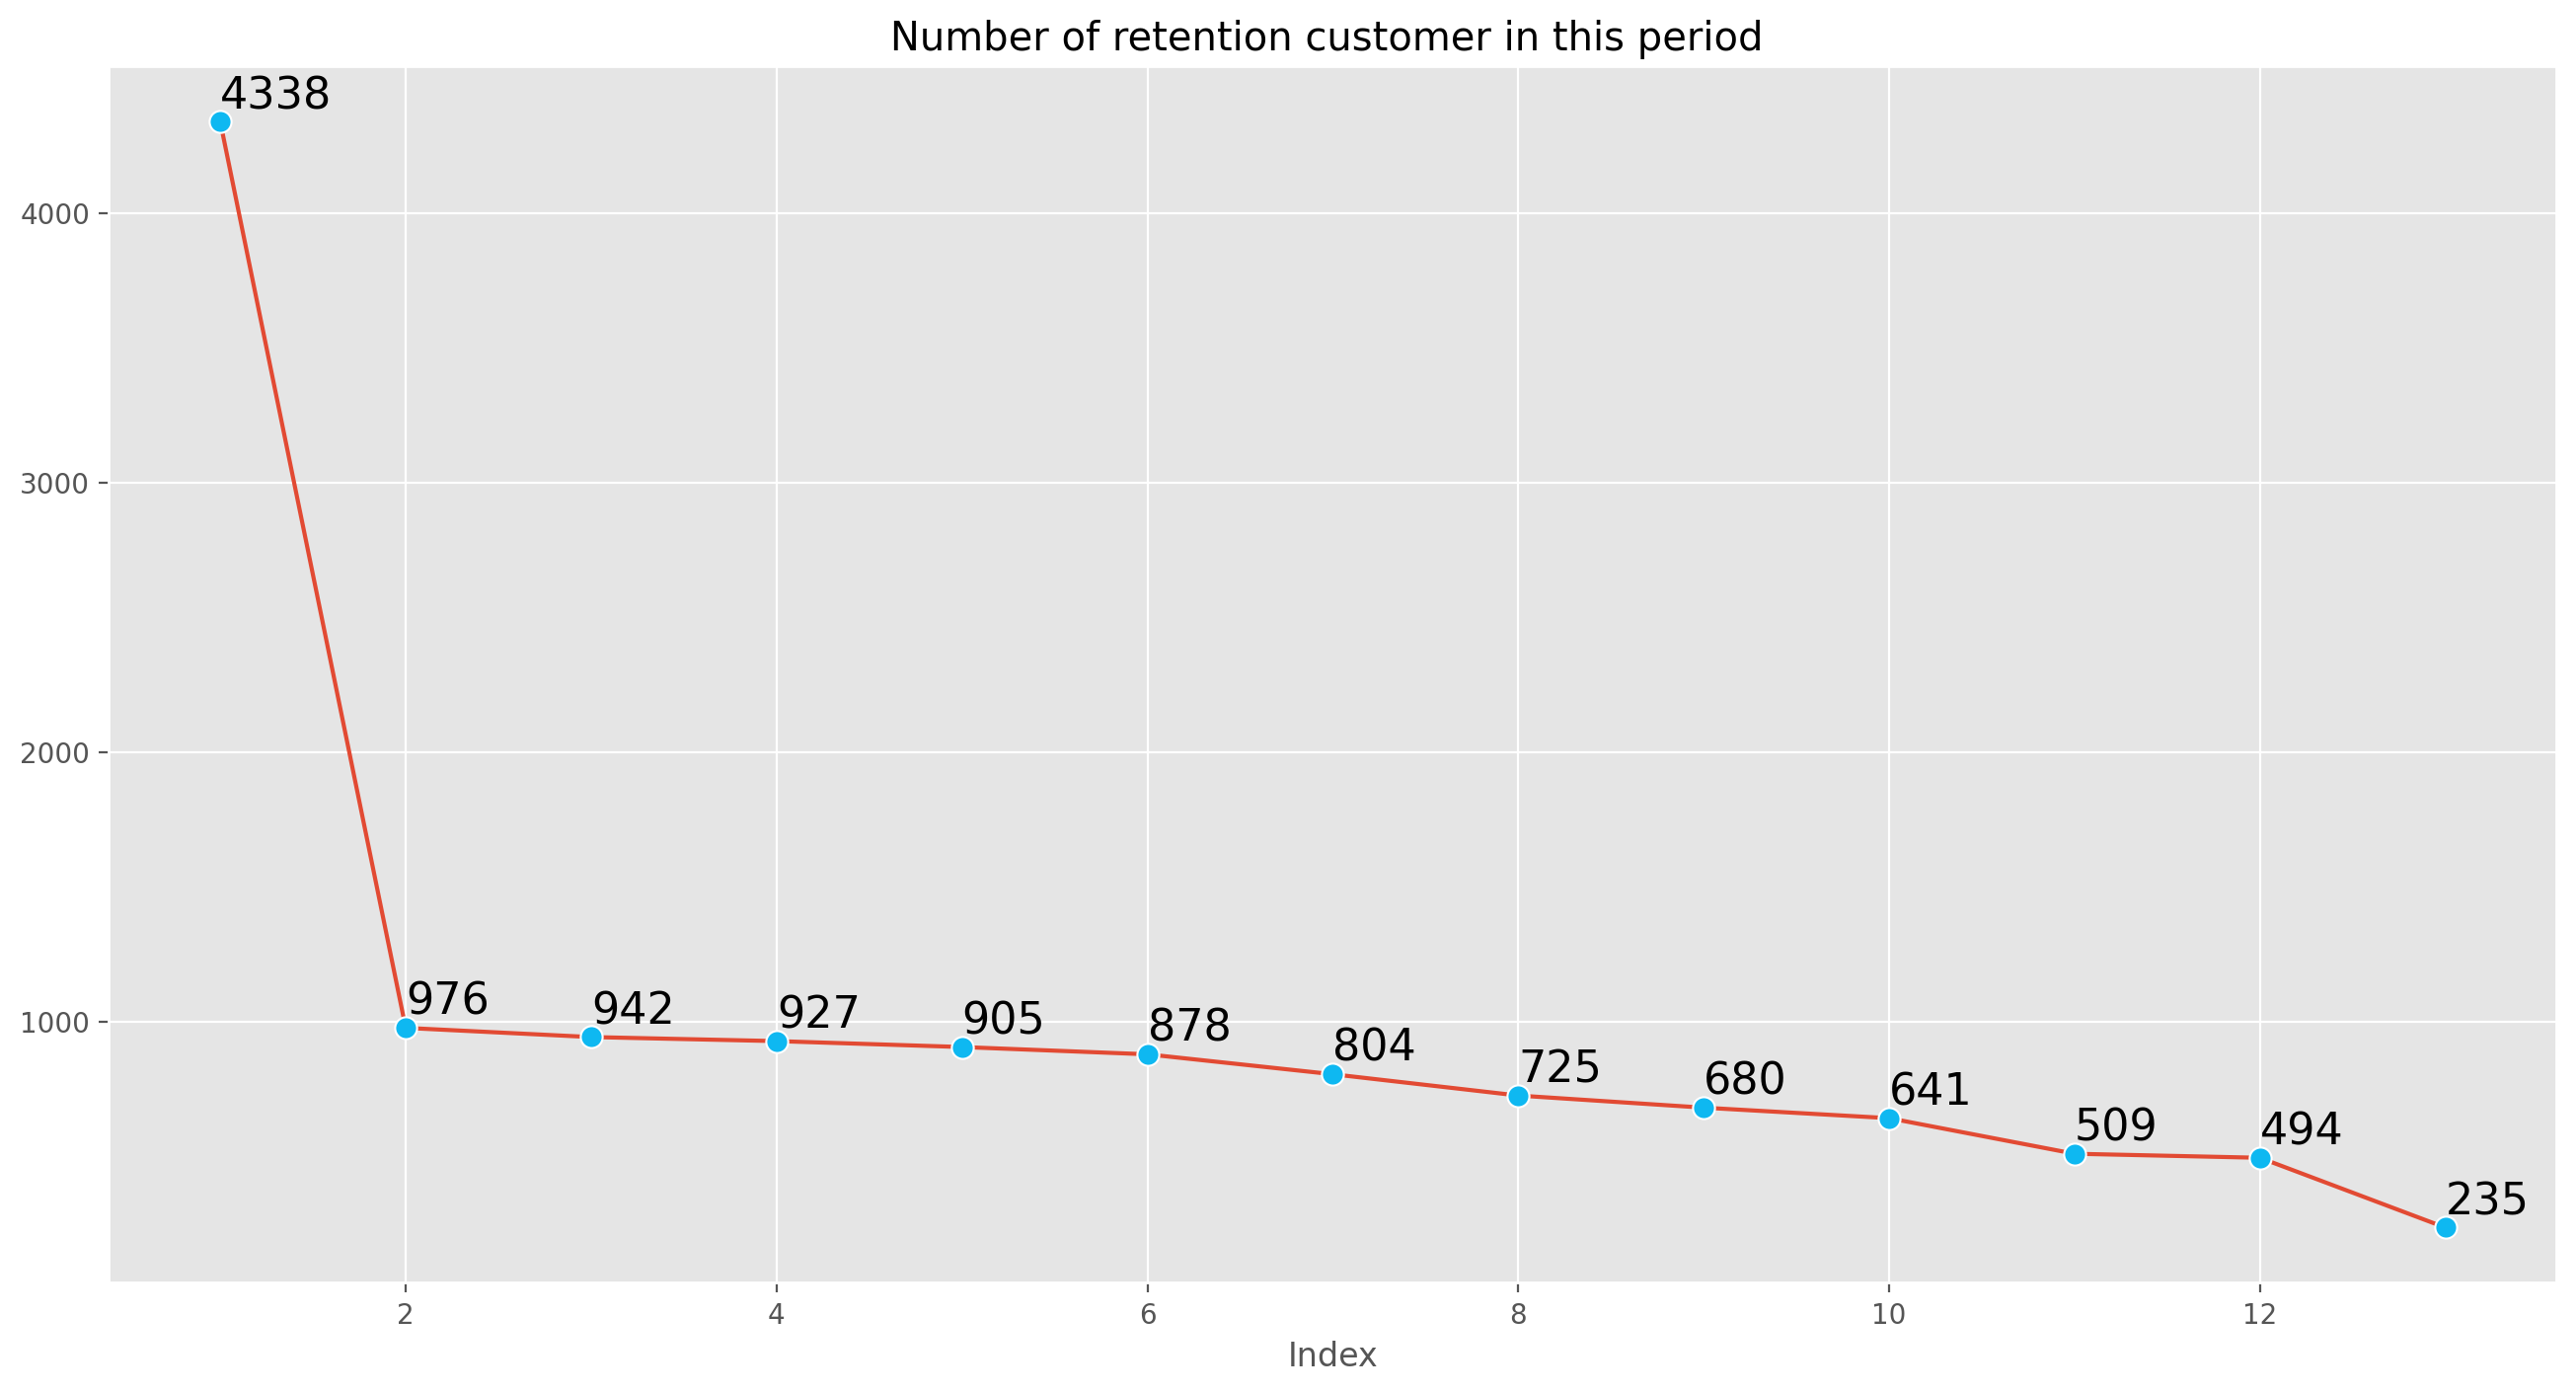

In [ ]:
GrandTotal = CohortCustomer.sum(numeric_only = True)
fig, ax = plt.subplots(figsize = (16,8), dpi = 200)
ax.set_title('Number of retention customer in this period ')
sns.lineplot(x = GrandTotal.index, y = GrandTotal,marker = "o", markeredgecolor = "white", markerfacecolor = "#0EB8F1", markersize=8)
for x, y in zip(GrandTotal.index, GrandTotal):
  plt.text(x=x, y= y+50, s = '{:.0f}'.format(y), color = 'black', size = 16)

### The Number Of Retained Customers Rates In This Period

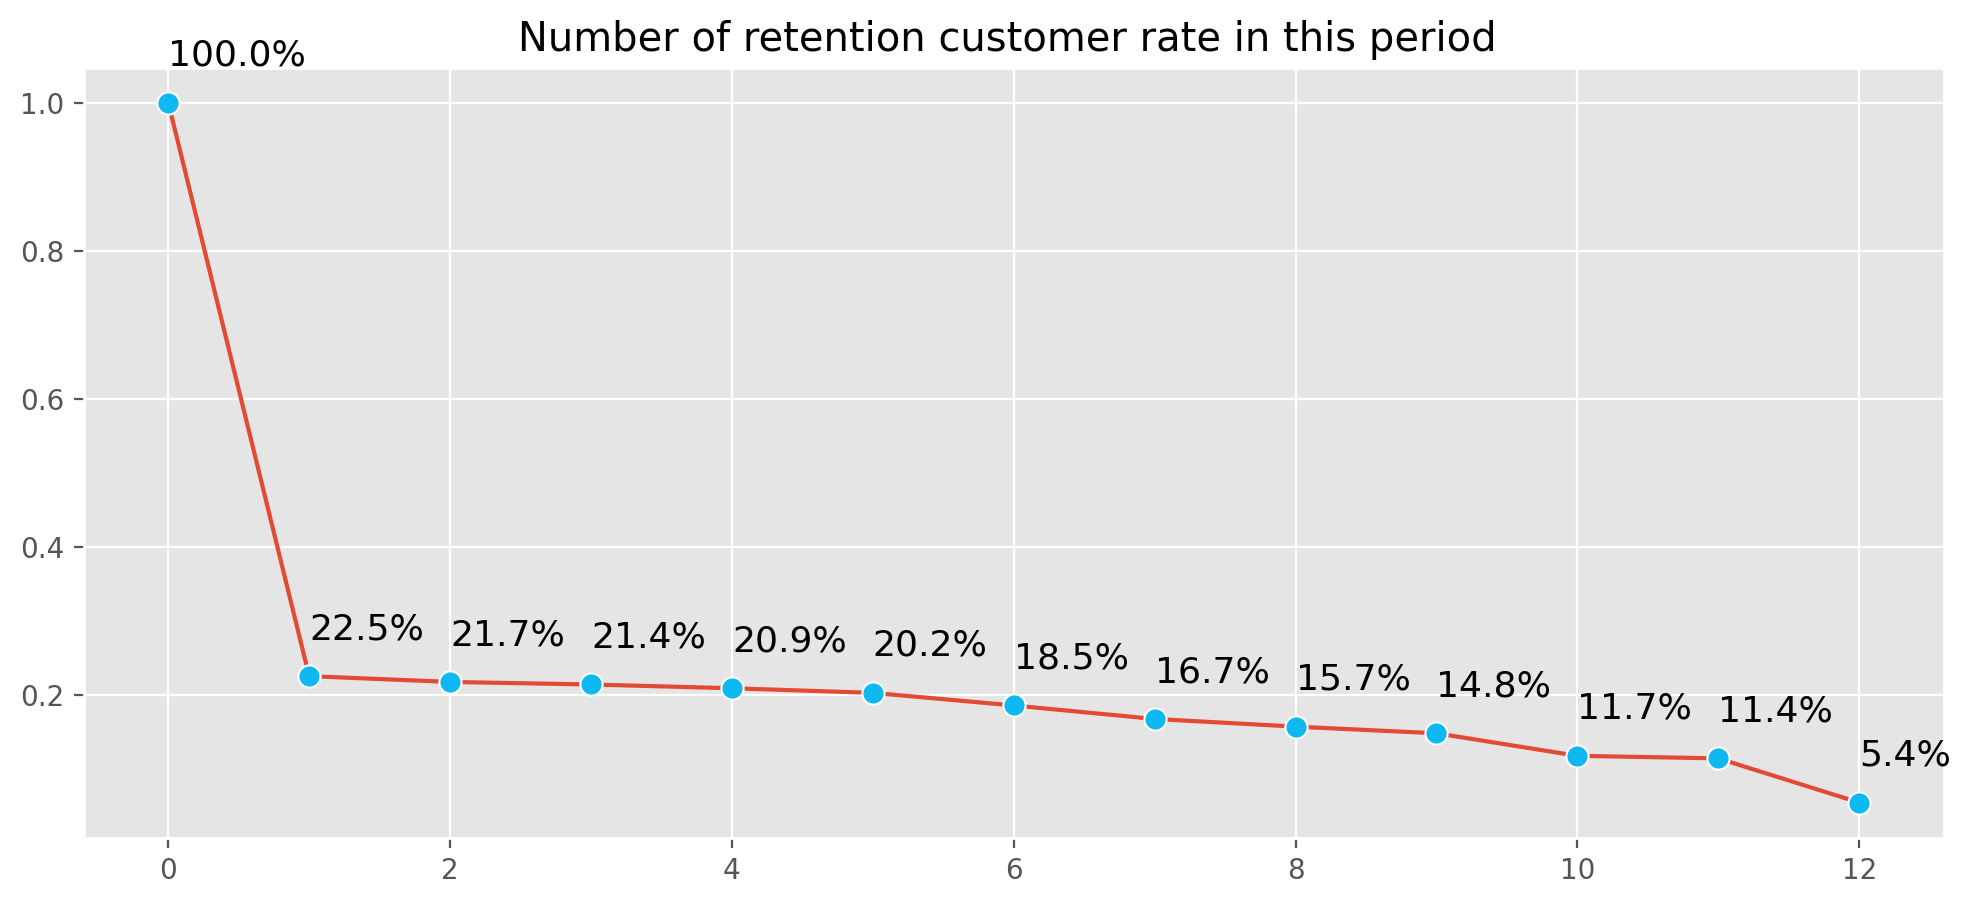

In [ ]:
GrandTotal = pd.Series(np.array(GrandTotal.to_list()))
First = GrandTotal.iloc[0]
GrandTotal = GrandTotal / First
fig, ax = plt.subplots(figsize=(12, 5), dpi=200)
ax.set_title('Number of retention customer rate in this period ')
sns.lineplot(x=GrandTotal.index, y=GrandTotal, marker="o", markeredgecolor="white", markerfacecolor="#0EB8F1", markersize=8)

for x, y in zip(GrandTotal.index, GrandTotal):
    plt.text(x=x, y = y + 0.05, s='{:.1%}'.format(y), color='black', size=13)

plt.show()

### Churn Rate Table


In [ ]:
ChurnRateCohort = 1 - RetentionRate


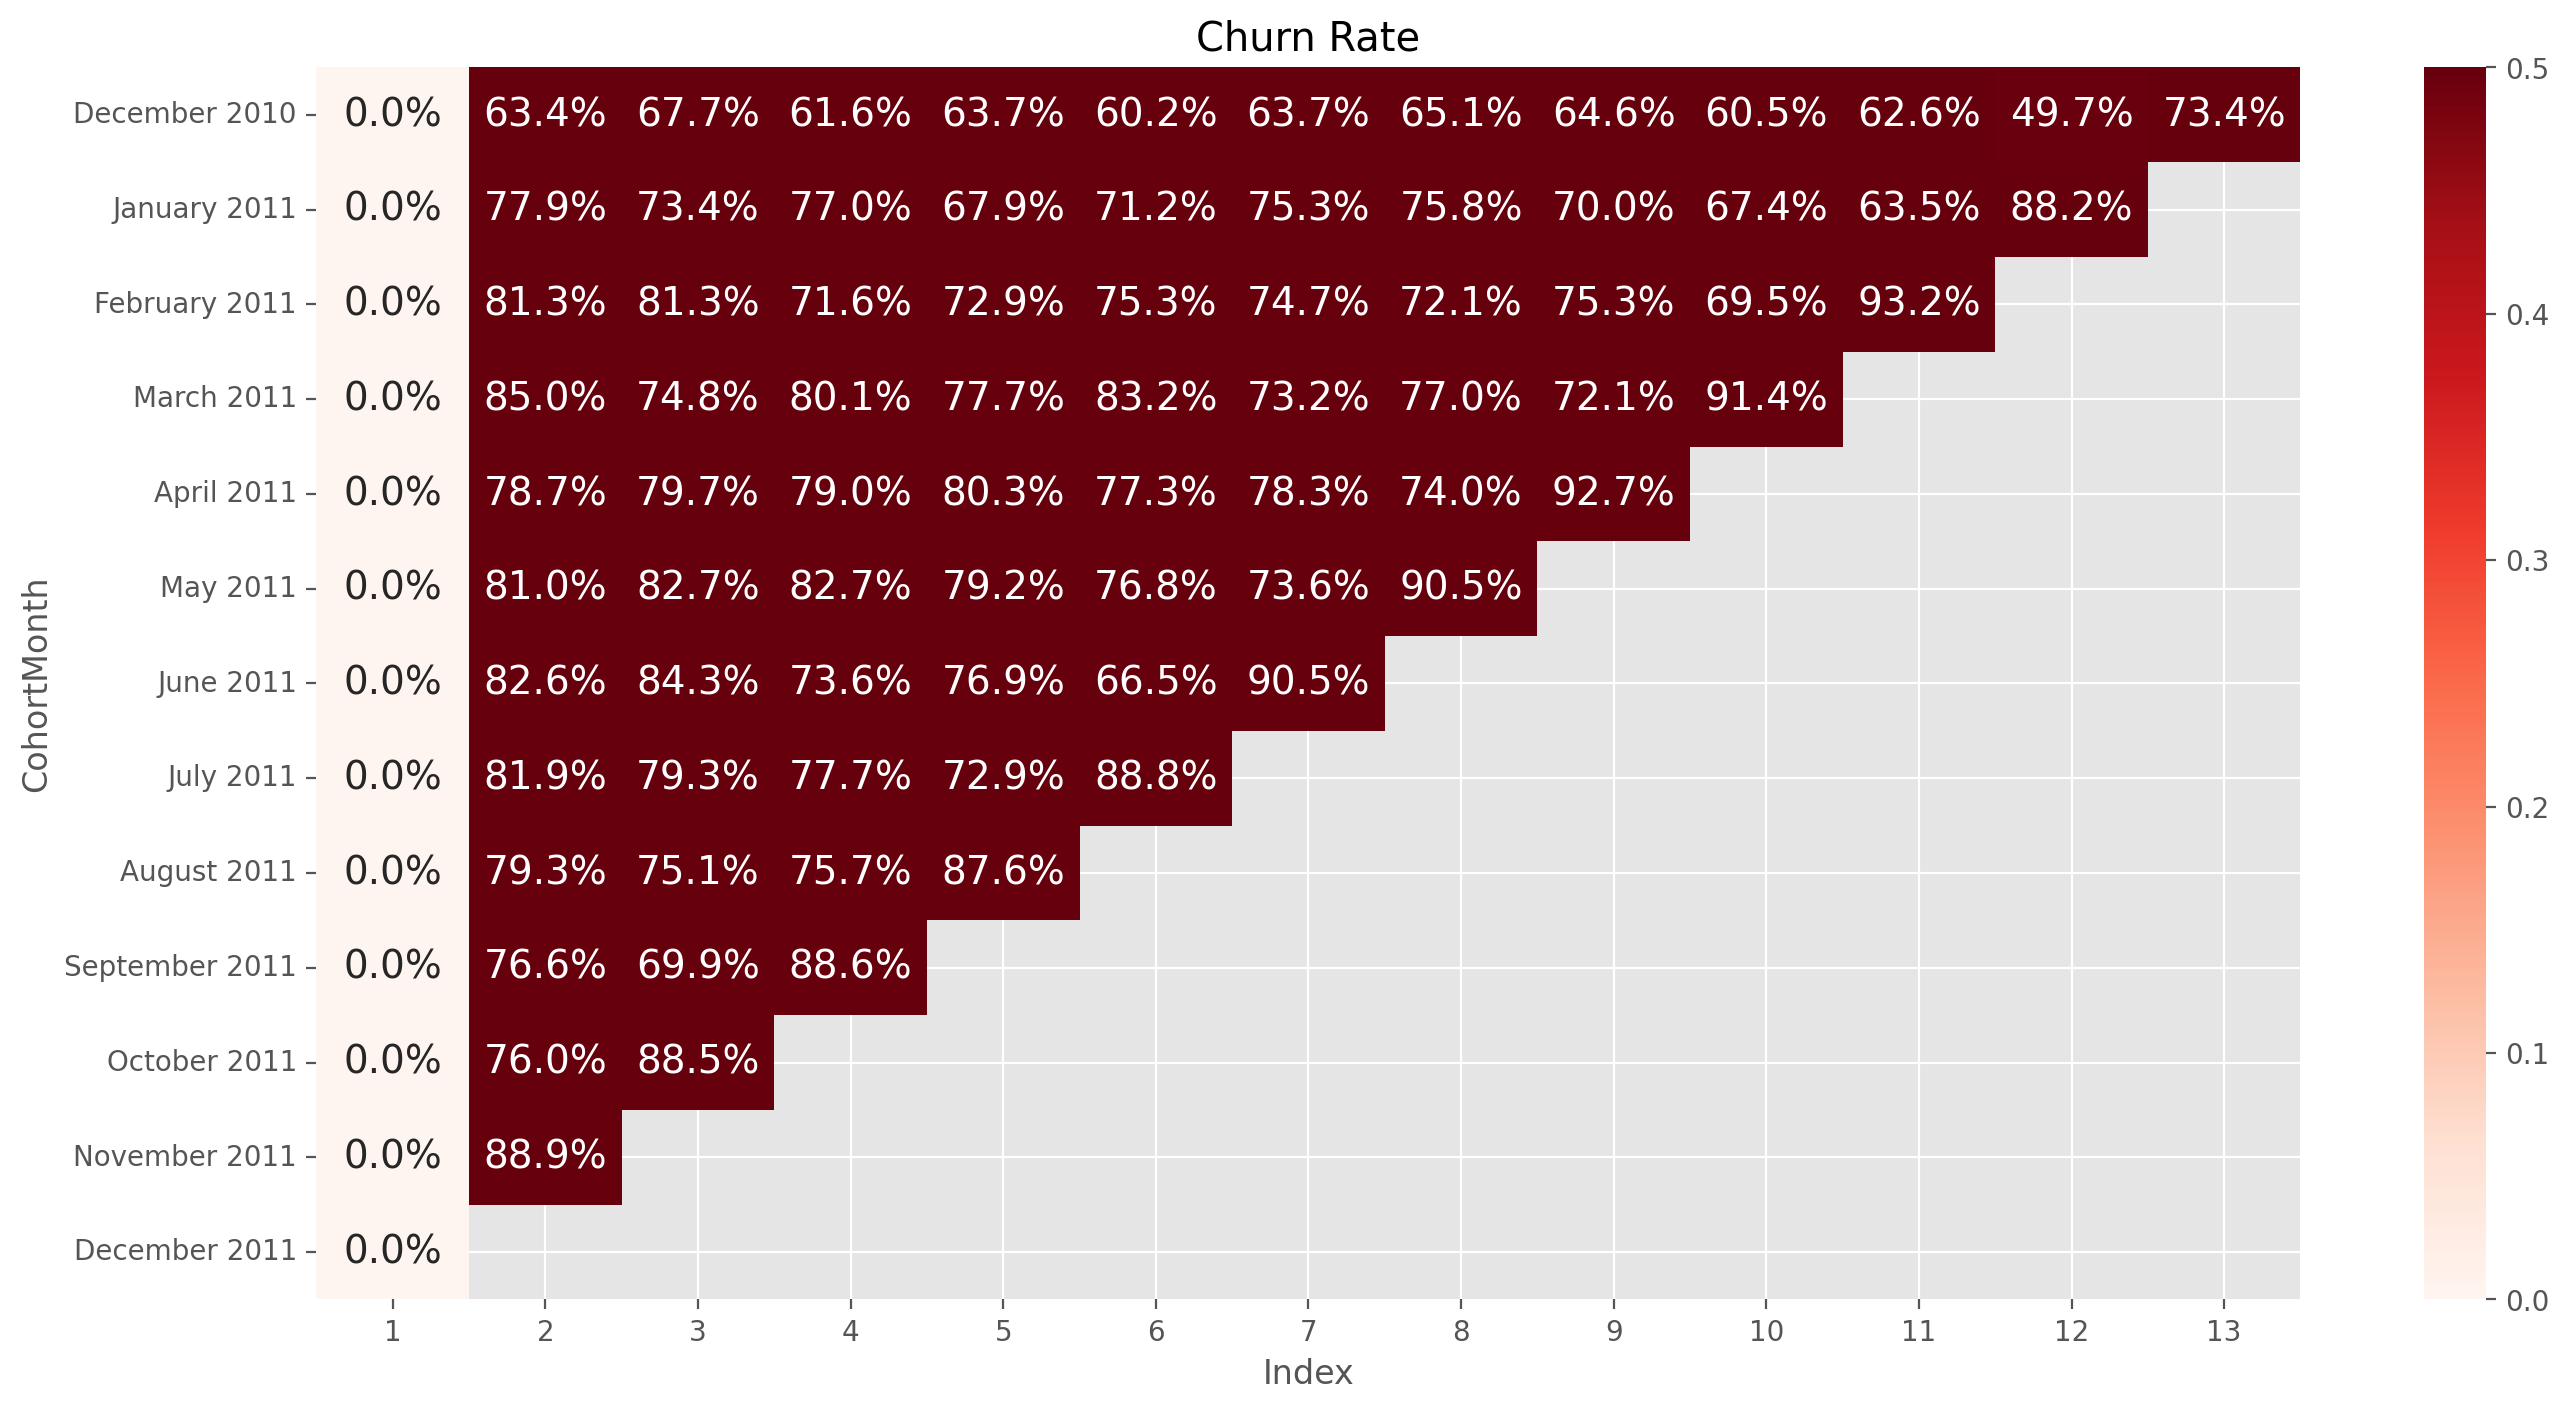

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), dpi = 200)
ax.set_title('Churn Rate')
sns.heatmap(data=ChurnRateCohort, annot=True, fmt=".1%", cmap='Reds', vmax=0.5, ax=ax, annot_kws={'fontsize': 14})
plt.show()

Tỷ lệ churn rất cao không có tháng nào mà tỷ lệ churn dưới 49%

### The Number Of Churned Customer Rates In This Period

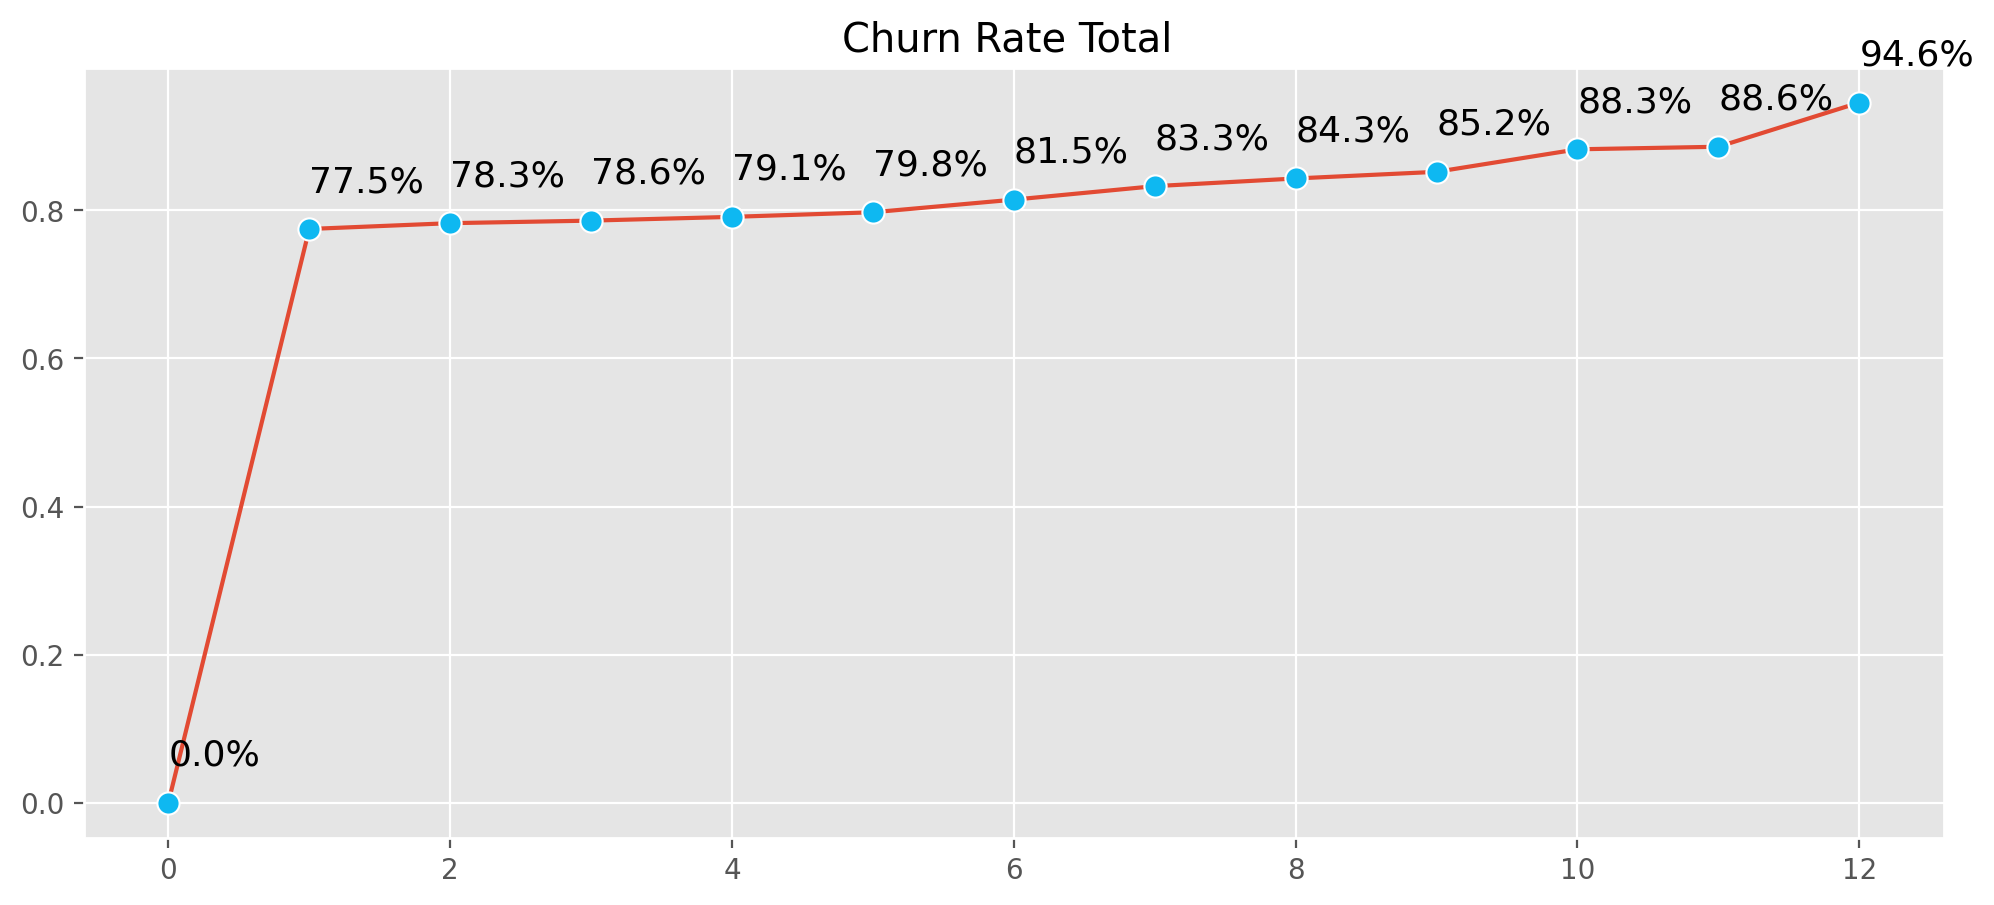

In [ ]:
ChurnRateTotal = 1 - GrandTotal
ChurnRateTotal = pd.Series(np.array(ChurnRateTotal))
fig, ax = plt.subplots(figsize=(12, 5), dpi=200)
ax.set_title('Churn Rate Total ')
sns.lineplot(x=ChurnRateTotal.index, y=ChurnRateTotal.values, marker="o", markeredgecolor="white", markerfacecolor="#0EB8F1", markersize=8)

for x, y in zip(ChurnRateTotal.index, ChurnRateTotal.values):
    plt.text(x=x, y = y + 0.05, s='{:.1%}'.format(y), color='black', size=13)

plt.show()


### Repeat Purchase Ratio

In [ ]:
rpr = df.groupby("CustomerID").agg({'InvoiceNo': pd.Series.nunique})
RepeatRatio = round((rpr[rpr.values>=2]).shape[0]/(rpr.shape[0])*100,2)
print('Repeat Purchase Ratio in this period: {}%'.format(RepeatRatio))

Repeat Purchase Ratio in this period: 65.58%


### Monthly Revenue Of Retained Customers

In [ ]:
mr = round(df.groupby(['CohortMonth','Index'])['Revenue'].sum()/1000,2).reset_index()
mr = mr.pivot(index = 'CohortMonth', columns = 'Index', values = 'Revenue')
mr.index = mr.index.strftime('%b %Y')
display(mr)

Index            1       2       3       4       5       6       7       8   \
CohortMonth                                                                   
Dec 2010     543.29  262.33  224.86  286.59  199.30  315.32  299.24  302.74   
Jan 2011     194.63   54.31   61.95   47.36   79.91   83.94   68.08   72.20   
Feb 2011     151.09   27.22   34.99   47.63   39.15   33.78   48.99   60.64   
Mar 2011     195.45   28.01   56.97   42.15   50.73   38.99   63.52   68.69   
Apr 2011     120.05   28.91   24.86   24.28   26.18   30.15   28.56   34.20   
May 2011     115.58   18.51   19.91   19.16   27.86   32.97   33.23   11.40   
Jun 2011      96.18   13.56   13.77   30.65   25.43   38.38    8.22     NaN   
Jul 2011      72.71   11.79   15.34   17.54   19.29    6.05     NaN     NaN   
Aug 2011      78.54   18.89   32.26   39.39   13.88     NaN     NaN     NaN   
Sep 2011     150.66   28.08   37.01   12.31     NaN     NaN     NaN     NaN   
Oct 2011     164.30   39.99   12.03     NaN     NaN     NaN     NaN     NaN   
Nov 2011     133.79   13.13     NaN     NaN     NaN     NaN     NaN     NaN   
Dec 2011      18.60     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

Index            9       10      11      12      13  
CohortMonth                                          
Dec 2010     309.24  424.47  423.42  498.54  176.05  
Jan 2011      71.05  105.38  121.52   26.46     NaN  
Feb 2011      52.99   60.52    9.73     NaN     NaN  
Mar 2011      68.66   12.28     NaN     NaN     NaN  
Apr 2011       6.35     NaN     NaN     NaN     NaN  
May 2011        NaN     NaN     NaN     NaN     NaN  
Jun 2011        NaN     NaN     NaN     NaN     NaN  
Jul 2011        NaN     NaN     NaN     NaN     NaN  
Aug 2011        NaN     NaN     NaN     NaN     NaN  
Sep 2011        NaN     NaN     NaN     NaN     NaN  
Oct 2011        NaN     NaN     NaN     NaN     NaN  
Nov 2011        NaN     NaN     NaN     NaN     NaN  
Dec 2011        NaN     NaN     NaN     NaN     NaN

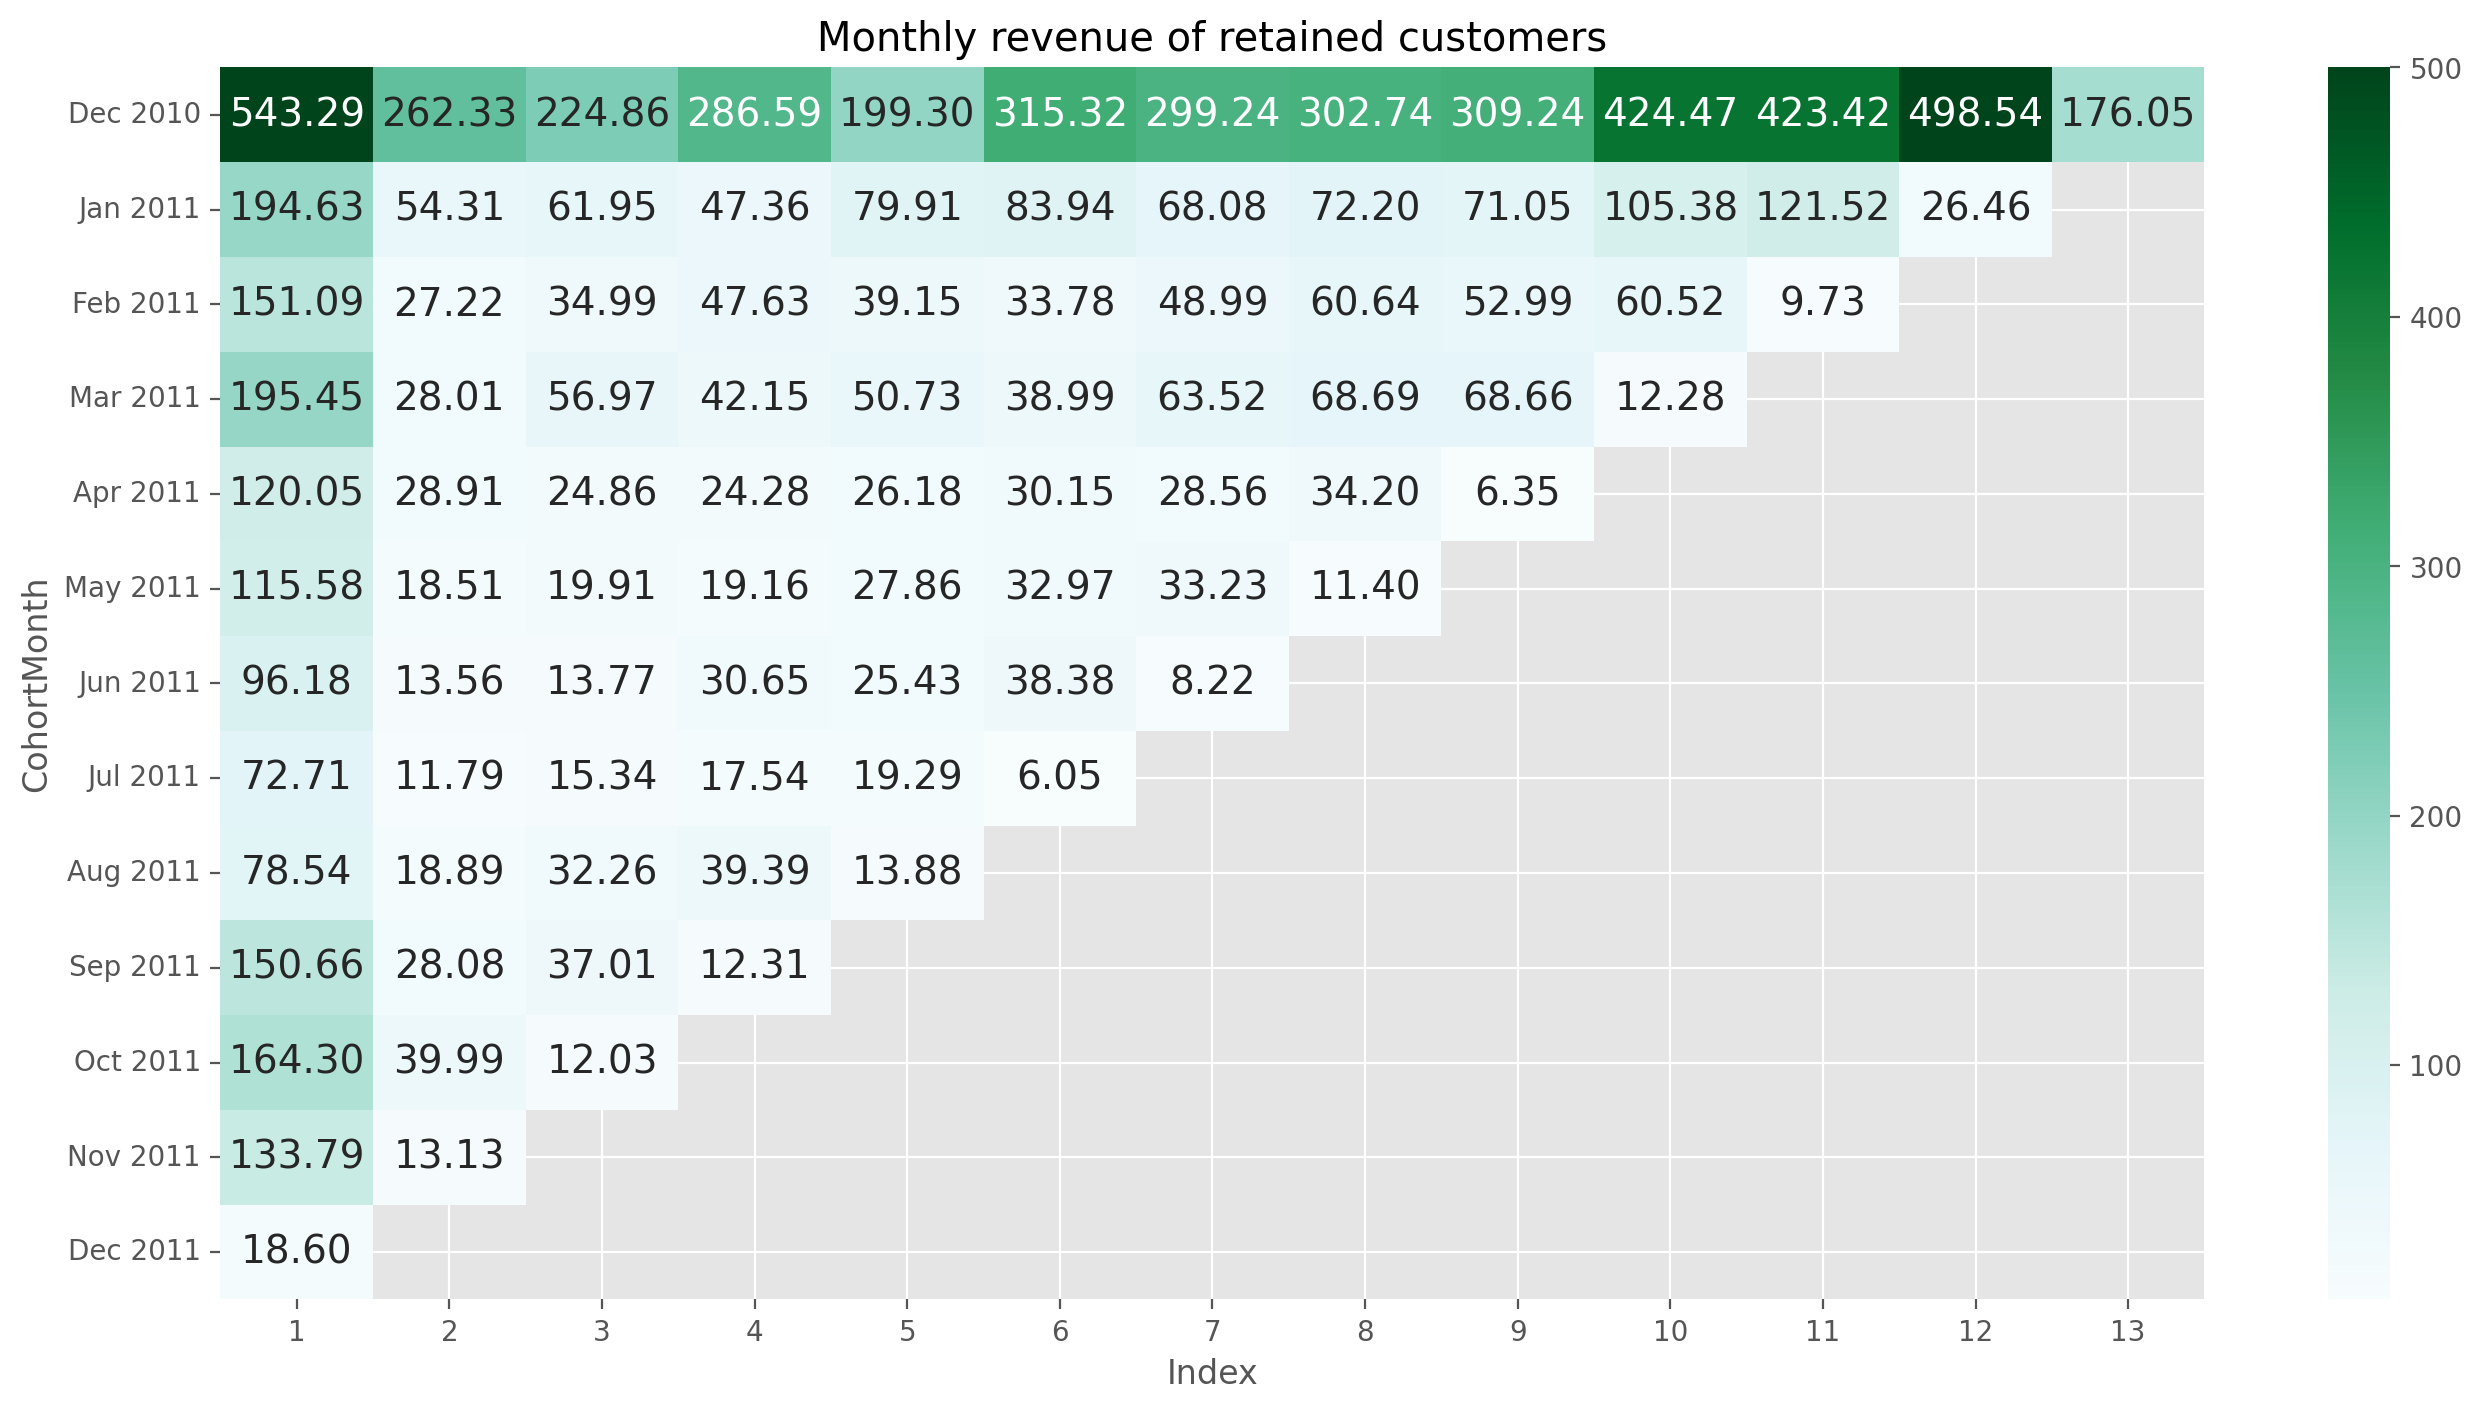

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), dpi = 200)
ax.set_title('Monthly revenue of retained customers')
sns.heatmap(data=mr, annot=True, fmt=".2f", cmap='BuGn', vmax=500, ax=ax, annot_kws={'fontsize': 14})
plt.show()

In [ ]:
nmr = mr.iloc[:,0]
MontlyRev = mr.divide(nmr, axis = 0)
display(MontlyRev)

Index         1         2         3         4         5         6         7   \
CohortMonth                                                                    
Dec 2010     1.0  0.482854  0.413886  0.527508  0.366839  0.580390  0.550792   
Jan 2011     1.0  0.279042  0.318296  0.243334  0.410574  0.431280  0.349792   
Feb 2011     1.0  0.180158  0.231584  0.315243  0.259117  0.223575  0.324244   
Mar 2011     1.0  0.143310  0.291481  0.215656  0.259555  0.199488  0.324994   
Apr 2011     1.0  0.240816  0.207080  0.202249  0.218076  0.251145  0.237901   
May 2011     1.0  0.160149  0.172262  0.165773  0.241045  0.285257  0.287506   
Jun 2011     1.0  0.140986  0.143169  0.318673  0.264400  0.399043  0.085465   
Jul 2011     1.0  0.162151  0.210975  0.241232  0.265301  0.083207       NaN   
Aug 2011     1.0  0.240514  0.410746  0.501528  0.176725       NaN       NaN   
Sep 2011     1.0  0.186380  0.245652  0.081707       NaN       NaN       NaN   
Oct 2011     1.0  0.243396  0.073220       NaN       NaN       NaN       NaN   
Nov 2011     1.0  0.098139       NaN       NaN       NaN       NaN       NaN   
Dec 2011     1.0       NaN       NaN       NaN       NaN       NaN       NaN   

Index              8         9         10        11        12        13  
CohortMonth                                                              
Dec 2010     0.557235  0.569199  0.781295  0.779363  0.917631  0.324044  
Jan 2011     0.370960  0.365052  0.541438  0.624364  0.135950       NaN  
Feb 2011     0.401350  0.350718  0.400556  0.064399       NaN       NaN  
Mar 2011     0.351445  0.351292  0.062829       NaN       NaN       NaN  
Apr 2011     0.284881  0.052895       NaN       NaN       NaN       NaN  
May 2011     0.098633       NaN       NaN       NaN       NaN       NaN  
Jun 2011          NaN       NaN       NaN       NaN       NaN       NaN  
Jul 2011          NaN       NaN       NaN       NaN       NaN       NaN  
Aug 2011          NaN       NaN       NaN       NaN       NaN       NaN  
Sep 2011          NaN       NaN       NaN       NaN       NaN       NaN  
Oct 2011          NaN       NaN       NaN       NaN       NaN       NaN  
Nov 2011          NaN       NaN       NaN       NaN       NaN       NaN  
Dec 2011          NaN       NaN       NaN       NaN       NaN       NaN

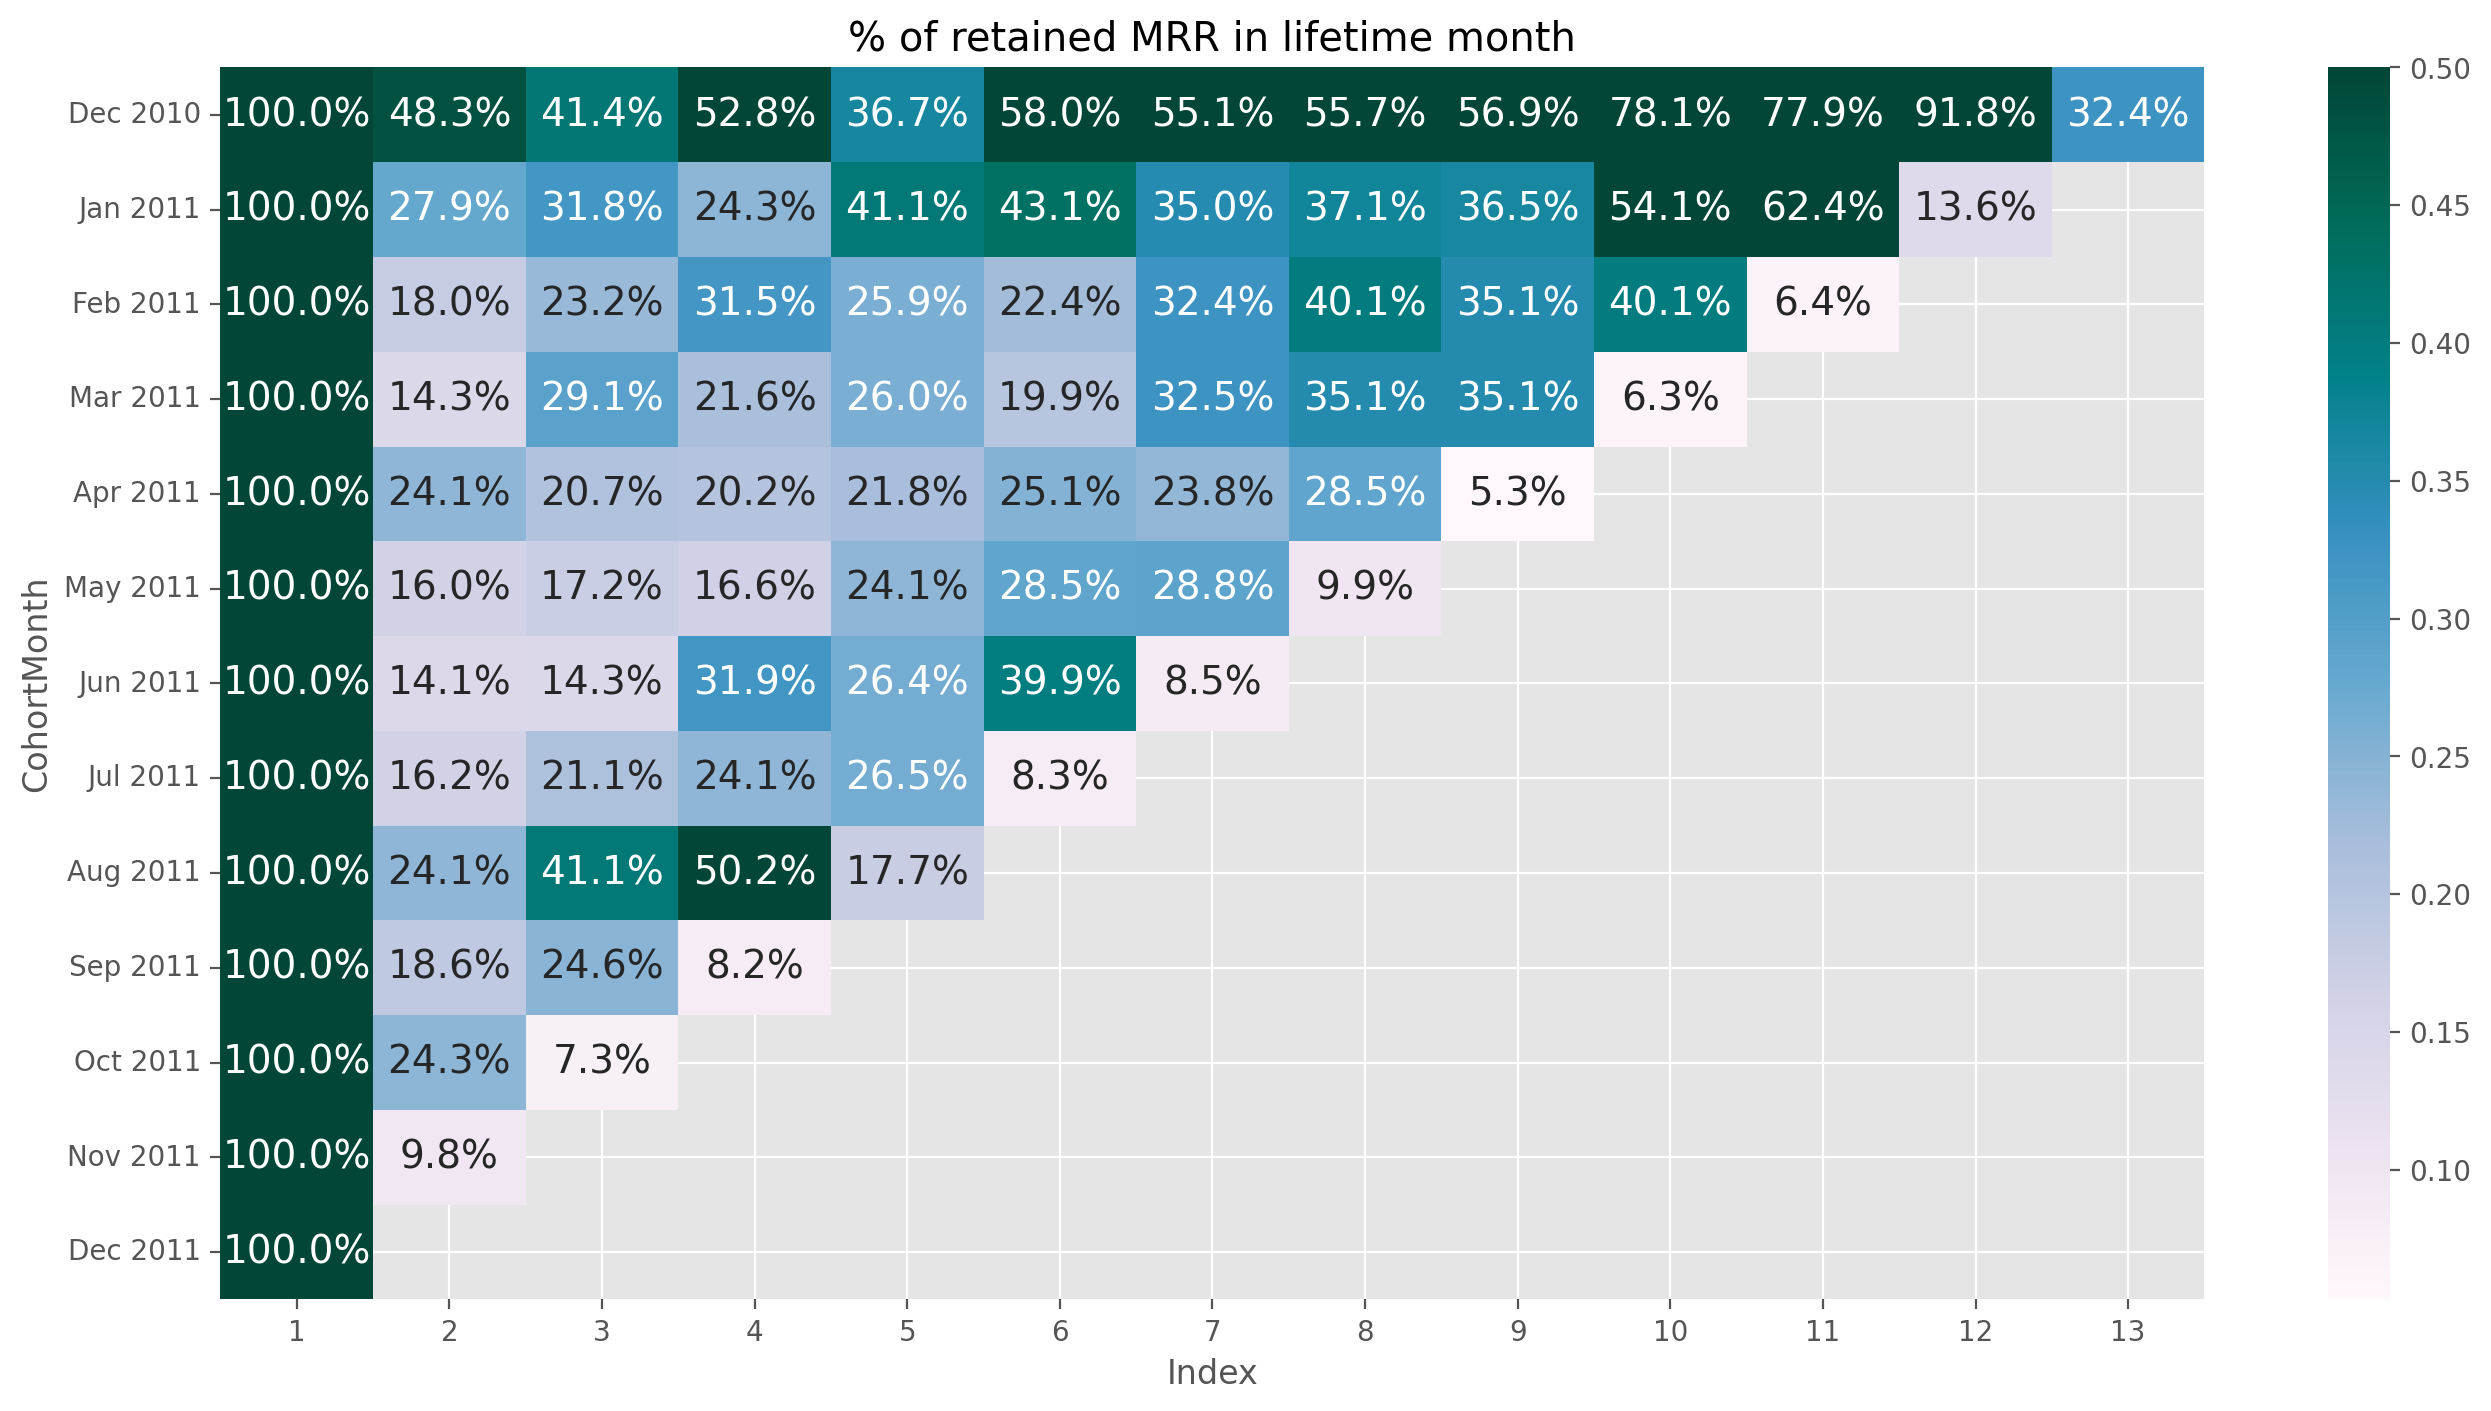

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), dpi = 200)
ax.set_title('% of retained MRR in lifetime month')
sns.heatmap(data= MontlyRev, annot=True, fmt=".1%", cmap='PuBuGn', vmax=0.5, ax=ax, annot_kws={'fontsize': 14})
plt.show()

Bảng kết quả cho thấy là khách hàng chi tiêu ngày càng ít đi bằng chứng là % of retained MRR giảm rõ rệt qua các tháng, điều này có thể xuất phát từ việc số lượng customer retentionn ít đi qua mỗi tháng, Như đã đề câp từ trước cửa hàng cần phải có những hành động marketing, customer retention or đổi thay chính sách kế hoạch mới hiệu quả hơn để tăng tỷ lệ customer retention rate và montly retained revenue

### Customer Retention KPIs Analysis

In [ ]:
data1 = df[df['Index'] == 1]
data2 = df[df['Index']>1]
data1 = data1.groupby('InvoiceMonth').agg({'CustomerID': pd.Series.nunique,
                                  'InvoiceNo': pd.Series.nunique,
                                  'Revenue': pd.Series.sum}) # xem là tháng đó có bao nhiêu khách hàng mới bao nhiêu hóa đơn và bao nhiêu doanh thu từ lượng khách hàng mới
data1.columns = ['NewCustomer','NewNoOrders','NewRevenue']
data2= data2.groupby('InvoiceMonth').agg({'CustomerID': pd.Series.nunique,
                                  'InvoiceNo': pd.Series.nunique,
                                  'Revenue': pd.Series.sum}) # xem là tháng đó có bao nhiêu khách hàng mới bao nhiêu hóa đơn và bao nhiêu doanh thu từ lượng khách hàng mới
data2.columns = [ 'ReturnedCustomer','ReturnedNoOrders','ReturnedRevenue']
data = data1.merge(data2, how = 'left', left_on= 'InvoiceMonth', right_on = 'InvoiceMonth' )
data.sort_index(ascending=True)
display(data)


NewCustomer  NewNoOrders  NewRevenue  ReturnedCustomer  \
InvoiceMonth                                                           
2010-12-01            885         1400  543291.690               NaN   
2011-01-01            417          470  194632.400             324.0   
2011-02-01            380          422  151088.785             378.0   
2011-03-01            452          500  195447.490             522.0   
2011-04-01            300          339  120049.536             556.0   
2011-05-01            284          328  115577.455             772.0   
2011-06-01            242          270   96184.290             749.0   
2011-07-01            188          213   72706.751             761.0   
2011-08-01            169          182   78538.725             766.0   
2011-09-01            299          336  150657.731             967.0   
2011-10-01            358          424  164302.350            1006.0   
2011-11-01            323          397  133785.320            1341.0   
2011-12-01             41           43   18602.195             574.0   

              ReturnedNoOrders  ReturnedRevenue  
InvoiceMonth                                     
2010-12-01                 NaN              NaN  
2011-01-01               517.0       262325.800  
2011-02-01               575.0       279177.850  
2011-03-01               821.0       375756.550  
2011-04-01               810.0       309669.060  
2011-05-01              1227.0       528735.505  
2011-06-01              1123.0       507855.775  
2011-07-01              1118.0       513079.195  
2011-08-01              1098.0       540301.885  
2011-09-01              1419.0       742575.791  
2011-10-01              1505.0       815329.700  
2011-11-01              2260.0       990732.310  
2011-12-01               738.0       307906.730

In [ ]:

data['NewCustomerCumSum'] = data['NewCustomer'].cumsum()
data['ActiveCustomer'] = data['NewCustomer'] + data['ReturnedCustomer']
data['ChurnedCustomer'] = data['NewCustomerCumSum'] - data['ActiveCustomer']
data['NewRevenueChurn'] = data['NewRevenue'].diff()
data.fillna(0, inplace = True)
data['Revenue']  = data['NewRevenue'] + data['ReturnedRevenue']
data["RevenueChurn"] = data.Revenue.diff()
data.fillna(0, inplace = True)
data["RevenueGrowth"] = data["Revenue"].diff()/data["Revenue"].shift()
data["NewRevenueGrowth"] = data['NewRevenue'].diff()/data["NewRevenue"].shift()
data["ReturnedRevenueGrowth"] = data['ReturnedRevenue'].diff()/data["ReturnedRevenue"].shift()
data.fillna(0,inplace = True)
display(data)

NewCustomer  NewNoOrders  NewRevenue  ReturnedCustomer  \
InvoiceMonth                                                           
2010-12-01            885         1400  543291.690               0.0   
2011-01-01            417          470  194632.400             324.0   
2011-02-01            380          422  151088.785             378.0   
2011-03-01            452          500  195447.490             522.0   
2011-04-01            300          339  120049.536             556.0   
2011-05-01            284          328  115577.455             772.0   
2011-06-01            242          270   96184.290             749.0   
2011-07-01            188          213   72706.751             761.0   
2011-08-01            169          182   78538.725             766.0   
2011-09-01            299          336  150657.731             967.0   
2011-10-01            358          424  164302.350            1006.0   
2011-11-01            323          397  133785.320            1341.0   
2011-12-01             41           43   18602.195             574.0   

              ReturnedNoOrders  ReturnedRevenue  NewCustomerCumSum  \
InvoiceMonth                                                         
2010-12-01                 0.0            0.000                885   
2011-01-01               517.0       262325.800               1302   
2011-02-01               575.0       279177.850               1682   
2011-03-01               821.0       375756.550               2134   
2011-04-01               810.0       309669.060               2434   
2011-05-01              1227.0       528735.505               2718   
2011-06-01              1123.0       507855.775               2960   
2011-07-01              1118.0       513079.195               3148   
2011-08-01              1098.0       540301.885               3317   
2011-09-01              1419.0       742575.791               3616   
2011-10-01              1505.0       815329.700               3974   
2011-11-01              2260.0       990732.310               4297   
2011-12-01               738.0       307906.730               4338   

              ActiveCustomer  ChurnedCustomer  NewRevenueChurn      Revenue  \
InvoiceMonth                                                                  
2010-12-01               0.0              0.0            0.000   543291.690   
2011-01-01             741.0            561.0      -348659.290   456958.200   
2011-02-01             758.0            924.0       -43543.615   430266.635   
2011-03-01             974.0           1160.0        44358.705   571204.040   
2011-04-01             856.0           1578.0       -75397.954   429718.596   
2011-05-01            1056.0           1662.0        -4472.081   644312.960   
2011-06-01             991.0           1969.0       -19393.165   604040.065   
2011-07-01             949.0           2199.0       -23477.539   585785.946   
2011-08-01             935.0           2382.0         5831.974   618840.610   
2011-09-01            1266.0           2350.0        72119.006   893233.522   
2011-10-01            1364.0           2610.0        13644.619   979632.050   
2011-11-01            1664.0           2633.0       -30517.030  1124517.630   
2011-12-01             615.0           3723.0      -115183.125   326508.925   

              RevenueChurn  RevenueGrowth  NewRevenueGrowth  \
InvoiceMonth                                                  
2010-12-01           0.000       0.000000          0.000000   
2011-01-01      -86333.490      -0.158908         -0.641753   
2011-02-01      -26691.565      -0.058411         -0.223722   
2011-03-01      140937.405       0.327558          0.293594   
2011-04-01     -141485.444      -0.247697         -0.385771   
2011-05-01      214594.364       0.499383         -0.037252   
2011-06-01      -40272.895      -0.062505         -0.167794   
2011-07-01      -18254.119      -0.030220         -0.244089   
2011-08-01       33054.664       0.056428          0.080212   
201

#### Monthly Customer MoveMent Analysis

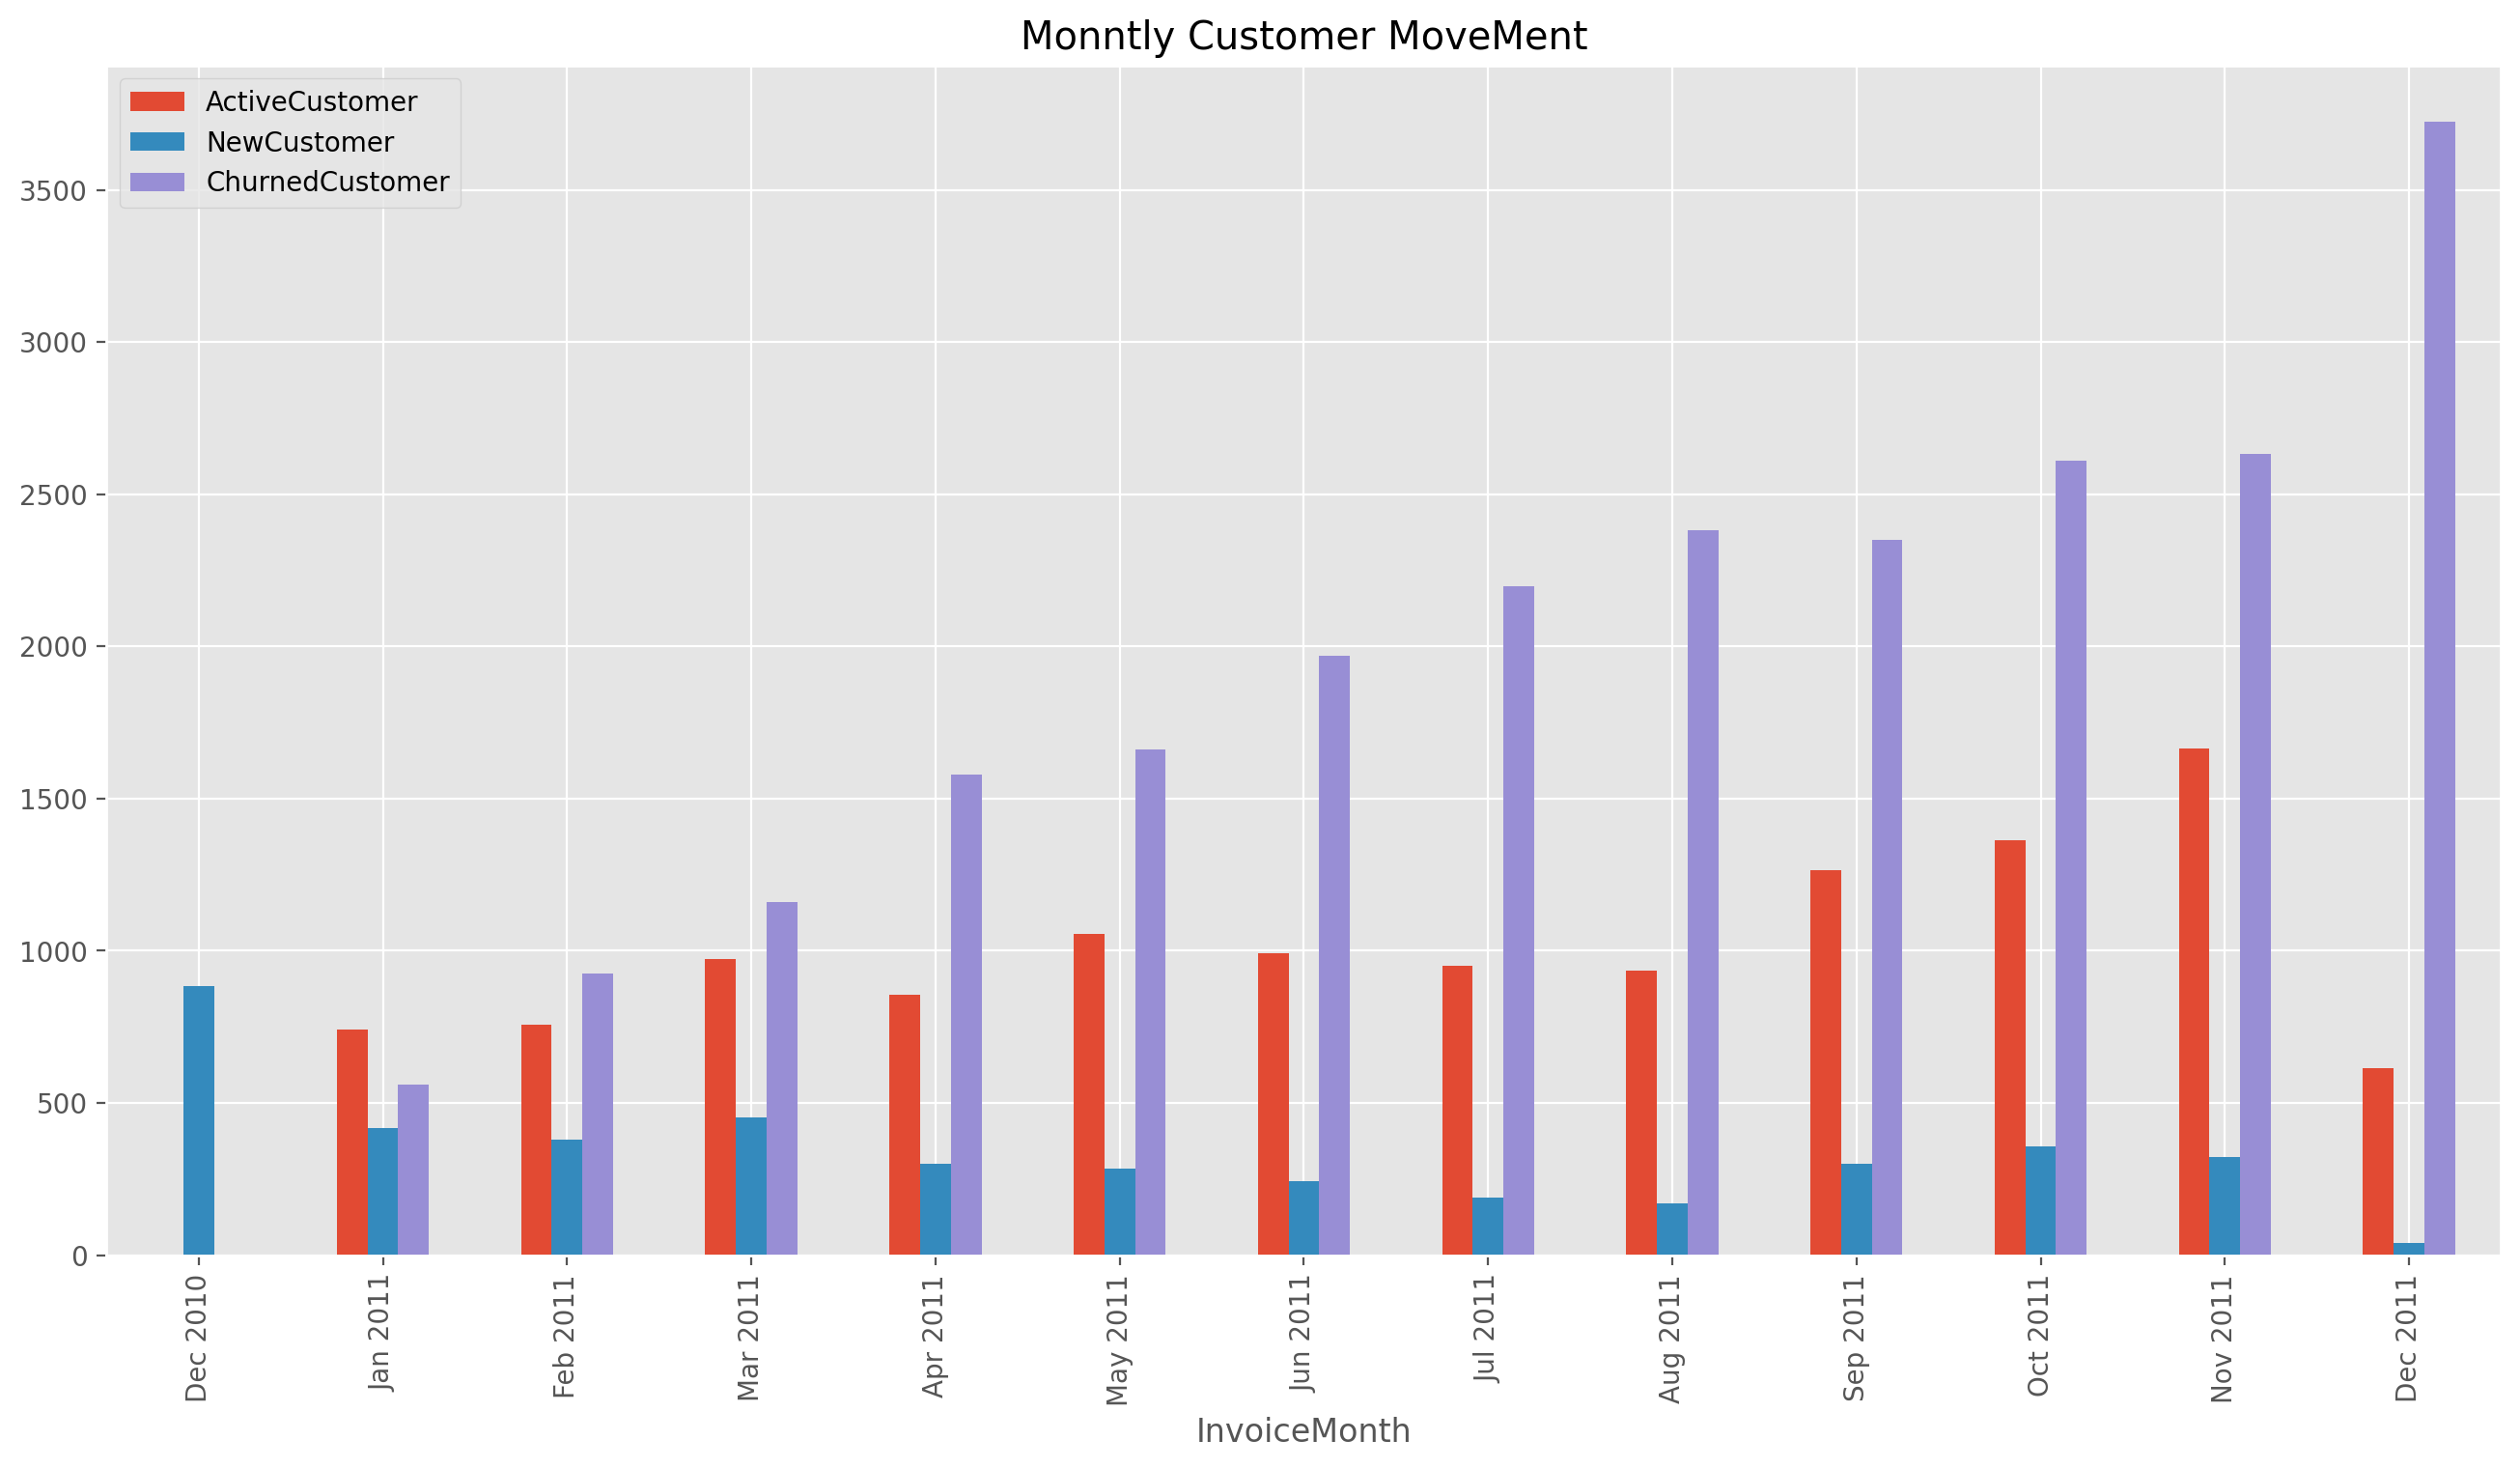

In [ ]:
fig, ax  = plt.subplots(figsize = (16,8), dpi = 200)
BarData = data[['ActiveCustomer', 'NewCustomer', 'ChurnedCustomer']]
BarData.index = BarData.index.strftime('%b %Y')
BarData.plot.bar(stacked=False, ax= ax)
ax.set_title('Monntly Customer MoveMent')
plt.show()

####  Monthly Revenue MoveMent Analysis

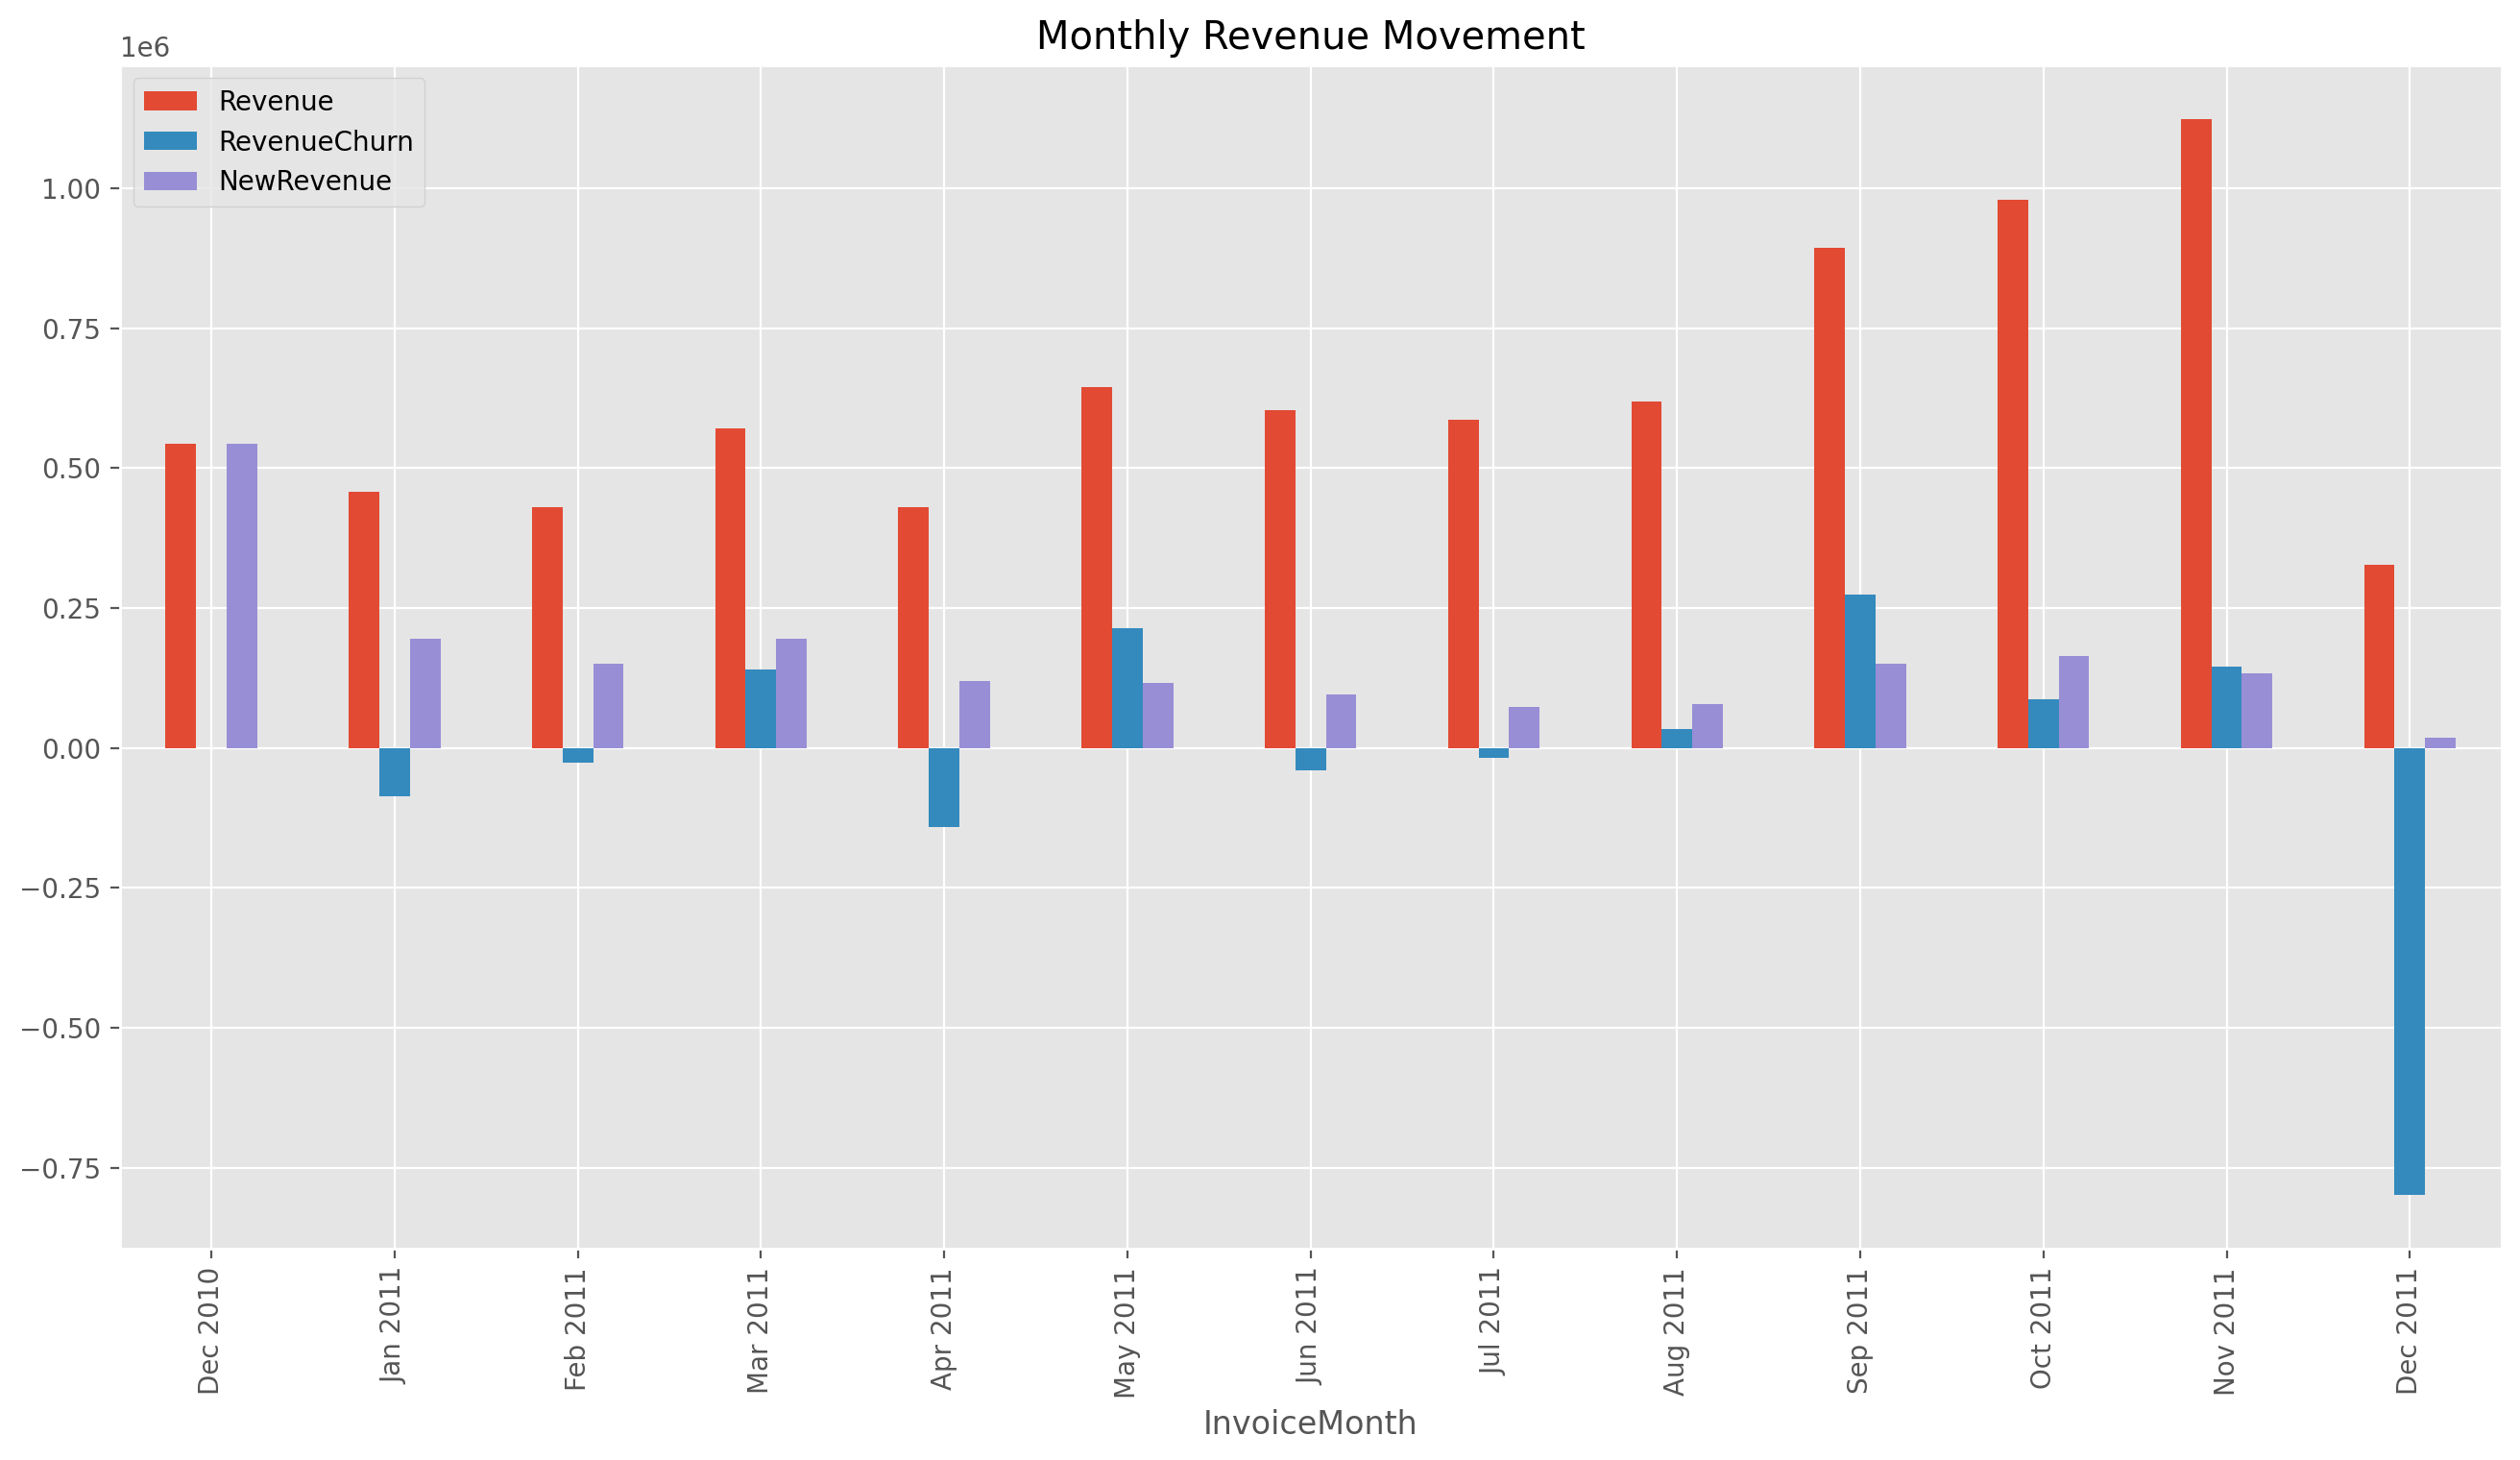

In [ ]:

fig, ax = plt.subplots(figsize=(16, 8), dpi=200)
Bar = data[['Revenue', "RevenueChurn", "NewRevenue"]]
Bar.index = Bar.index.strftime('%b %Y')
Bar.plot.bar(stacked=False, ax=ax)
ax.set_title("Monthly Revenue Movement")
plt.show()

#### Monthly Retained Revenue Growth Rate Analysis

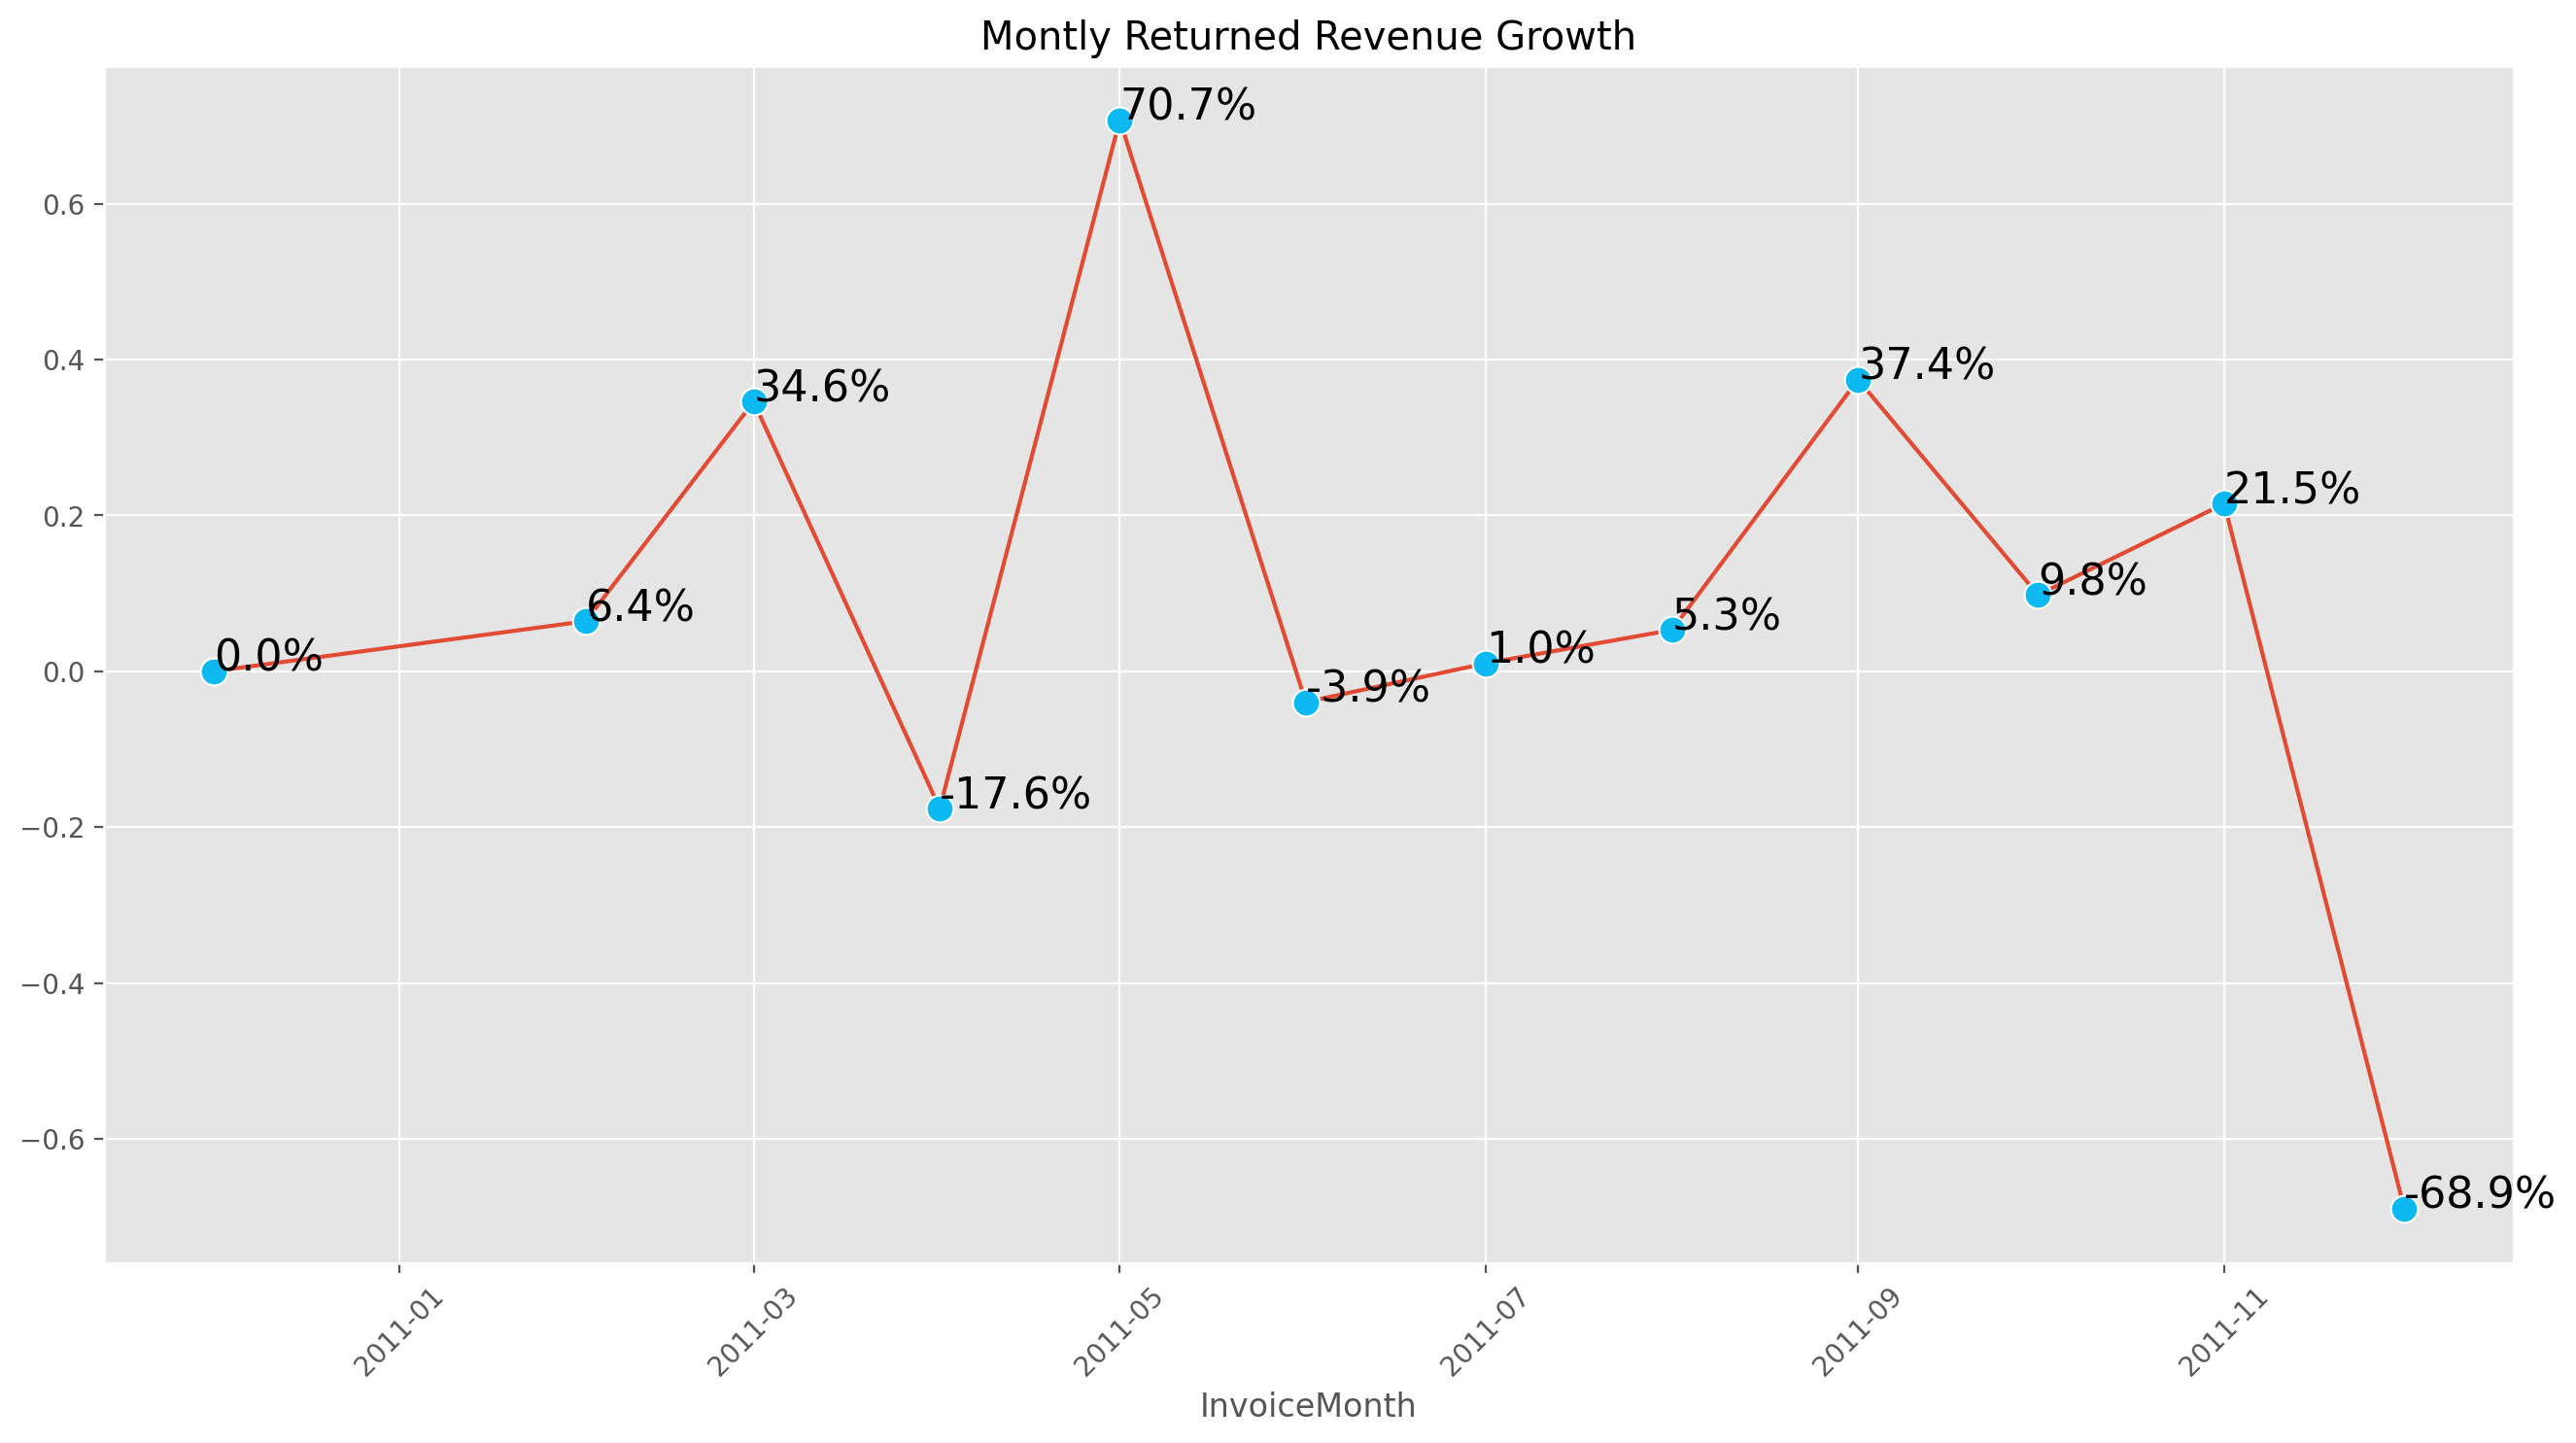

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=200)
sns.lineplot(x=data.index, y=data["ReturnedRevenueGrowth"].values, marker="o", markeredgecolor="white", markerfacecolor="#0EB8F1", markersize=10)
plt.xticks(rotation=45)
for x, y in zip(list(data.index), list(data["ReturnedRevenueGrowth"])):
    plt.text(x = x, y = y, s = '{:.1%}'.format(y), color = 'black', fontsize = 16)
plt.title("Montly Returned Revenue Growth")
plt.show();


Xét về tổng quan:  doanh thu thu được từ retained customer qua các tháng phần lớn là sụt giảm điều này càng chứng minh cho việc khách hàng đang làm không tốt việc giữ chân khách hàng.

Tuy nhiên nếu nhìn theo cách nhìn khác quanh có một tháng họ đã làm rất tốt là tháng 5-2011 so với tháng trước cửa hàng đã đạt tốc độ tăng trưởng lên đến 71%. Cửa hàng nên xem lại vào tháng 5 mình đã thực hiện những chính sách gì để đạt được tốc độ tăng trưởng cao như vậy

#### Time Between Purchase

In [ ]:
tbp = df[['CustomerID', 'InvoiceDate', 'InvoiceNo']]
tbp = tbp.drop_duplicates()
tbp = tbp.sort_values(by=["CustomerID", "InvoiceDate"])
tbp["TimePurchase"] = tbp.groupby("CustomerID")['InvoiceDate'].diff().dt.days.fillna(0)
tbp["n Purchase"] = tbp["InvoiceDate"].groupby(df["CustomerID"]).rank(ascending=True, method='first')
print(tbp)

        CustomerID         InvoiceDate InvoiceNo  TimePurchase  n Purchase
61619      12346.0 2011-01-18 10:01:00    541431           0.0         1.0
14938      12347.0 2010-12-07 14:57:00    537626           0.0         1.0
72246      12347.0 2011-01-26 14:30:00    542237          49.0         2.0
148285     12347.0 2011-04-07 10:43:00    549222          70.0         3.0
220572     12347.0 2011-06-09 13:01:00    556201          63.0         4.0
...            ...                 ...       ...           ...         ...
514067     18283.0 2011-11-30 12:59:00    579673           6.0        15.0
530454     18283.0 2011-12-06 12:02:00    580872           5.0        16.0
198716     18287.0 2011-05-22 10:39:00    554065           0.0         1.0
392716     18287.0 2011-10-12 10:23:00    570715         142.0         2.0
423939     18287.0 2011-10-28 09:29:00    573167          15.0         3.0

[18567 rows x 5 columns]


In [ ]:
AvgTimeBetweenPurchase = round(tbp['TimePurchase'].mean(),2)
print(f'AVG Time Between Purchase {AvgTimeBetweenPurchase} days')

AVG Time Between Purchase 30.21 days


In [ ]:
df1 = tbp[tbp['n Purchase']>1]
print(df1.shape)

(14229, 5)


#### Loyal Customer Rate


In [ ]:
LoyalData = df1.groupby("CustomerID").agg({'n Purchase': pd.Series.max})
LoyalData = LoyalData.groupby('n Purchase').size().reset_index(name = 'size')
LoyalData = LoyalData.sort_values(by = 'size', ascending = False)
LoyalData.head()

n Purchase  size
0         2.0   836
1         3.0   506
2         4.0   387
3         5.0   244
4         6.0   172

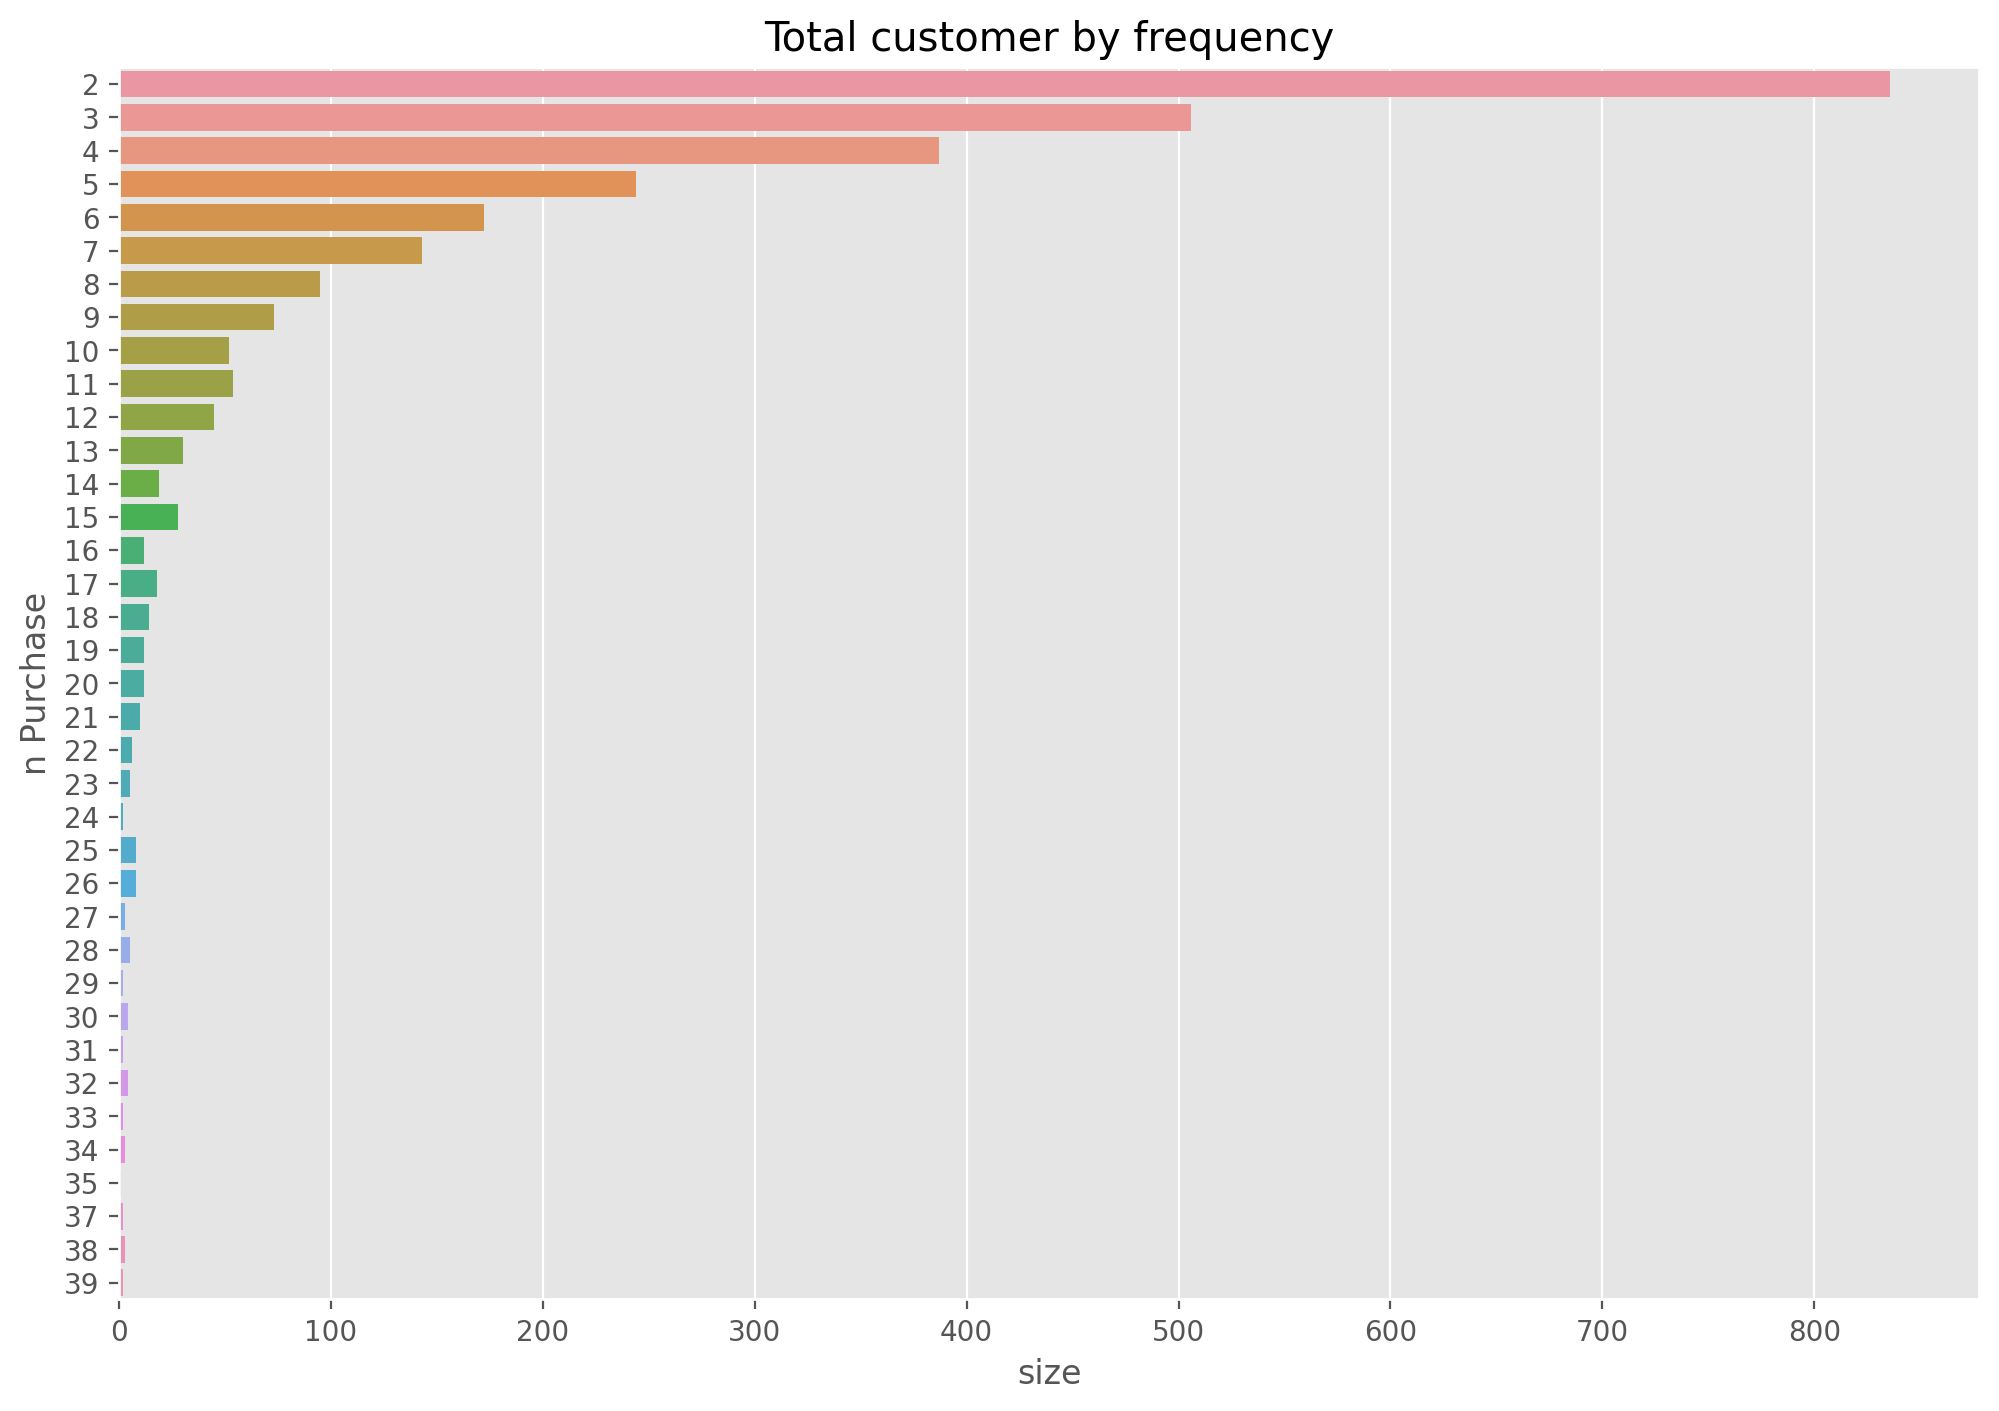

In [ ]:
LoyalData["n Purchase"] = LoyalData["n Purchase"].astype(int)
LoyalDataShow = LoyalData[LoyalData['n Purchase']<40]
fig, ax = plt.subplots(figsize= (12,8), dpi = 200)
sns.barplot(y = LoyalDataShow["n Purchase"], x = LoyalDataShow['size'], data = LoyalDataShow, ax = ax, orient = 'h', )
ax.set_title('Total customer by frequency')
plt.show()

In [ ]:
# LoyalDataRate = Tổng frequency của  Loyal Customer /  tổng số khách hàng
LoyalDataRate = LoyalData[LoyalData['n Purchase'] > 10]
LoyalDataRate = LoyalDataRate['size'].sum()
LoyalDataRate = round(LoyalDataRate/df['CustomerID'].nunique()*100,2)
print(f'Loyal Customer Rate {LoyalDataRate}%' )


Loyal Customer Rate 7.81%


Tỷ lệ khách hàng trung thành chỉ có 7.81% công ty nên hành động ngay lập tức nếu muốn doanh thu đạt được hiệu quả cao

## Customer Segmnetation By RFM Model

In [ ]:
display(df)

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
541913    581588     22138        BAKING SET 9 PIECE RETROSPOT        3.0   
541914    581589     22138        BAKING SET 9 PIECE RETROSPOT        8.0   
541915    581589     23256          CHILDRENS CUTLERY SPACEBOY        4.0   
541916    581589     21217        RED RETROSPOT ROUND CAKE TINS      24.0   
541917    581590     21217        RED RETROSPOT ROUND CAKE TINS      24.0   

               InvoiceDate  UnitPrice  CustomerID         Country  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
...                    ...        ...         ...             ...   
541913 2011-12-09 12:50:00       4.95     12680.0          France   
541914 2011-12-09 12:39:00       4.95     12680.0          France   
541915 2011-12-09 12:50:00       4.15     12680.0          France   
541916 2011-12-09 12:49:00       8.95     13113.0  United Kingdom   
541917 2011-12-09 12:45:00       8.95     13113.0  United Kingdom   

       InvoiceMonth CohortMonth  Index  Revenue  
0        2010-12-01  2010-12-01      1    15.30  
1        2010-12-01  2010-12-01      1    20.34  
2        2010-12-01  2010-12-01      1    22.00  
3        2010-12-01  2010-12-01      1    20.34  
4        2010-12-01  2010-12-01      1    20.34  
...             ...         ...    ...      ...  
541913   2011-12-01  2011-08-01      5    14.85  
541914   2011-12-01  2011-08-01      5    39.60  
541915   2011-12-01  2011-08-01      5    16.60  
541916   2011-12-01  2010-12-01     13   214.80  
541917   2011-12-01  2010-12-01     13   214.80  

[397893 rows x 12 columns]

In [ ]:
max_date = df["InvoiceDate"].max()
min_date = df["InvoiceDate"].min()
print(f" Ngày tạo hóa đơn đầu tiên {min_date}")
print(f"Ngày tạo hóa đơn gần nhất {max_date}")

 Ngày tạo hóa đơn đầu tiên 2010-12-01 08:26:00
Ngày tạo hóa đơn gần nhất 2011-12-09 12:50:00


In [ ]:
df["Revenue"] = df['UnitPrice'] * df["Quantity"]
RfmData = df.groupby("CustomerID").agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days,
    'InvoiceNo': pd.Series.nunique,
    'Revenue': pd.Series.sum
})
RfmData.columns = ['Recency', 'Frequency', 'Monetary']
RfmData = RfmData.drop_duplicates()
RfmData

Recency  Frequency  Monetary
CustomerID                              
12346.0         325          1    310.44
12347.0           1          7   4310.00
12348.0          74          4   1766.19
12349.0          18          1   1490.70
12350.0         309          1    330.95
...             ...        ...       ...
18280.0         277          1    180.60
18281.0         180          1     80.82
18282.0           7          2    178.05
18283.0           3         16   2094.88
18287.0          42          3   1837.28

[4338 rows x 3 columns]

In [ ]:
RfmData["R"]=pd.qcut(RfmData["Recency"], q = 4, labels = np.arange(4,0,-1))
RfmData["F"]=pd.qcut(RfmData["Frequency"].rank(method = "first"), q = 4, labels = np.arange(1,5,1))
RfmData["M"]=pd.qcut(RfmData["Monetary"], q = 4, labels = np.arange(1,5,1))
RfmData["RfmScore"] = RfmData[["R","F","M"]].sum(axis = 1)
RfmData["RfmSegment"] = RfmData[["R", "F", "M"]].astype(str).apply(lambda x: ''.join(x), axis = 1)
RfmData


Recency  Frequency  Monetary  R  F  M  RfmScore RfmSegment
CustomerID                                                            
12346.0         325          1    310.44  1  1  2         4        112
12347.0           1          7   4310.00  4  4  4        12        444
12348.0          74          4   1766.19  2  3  4         9        234
12349.0          18          1   1490.70  3  1  3         7        313
12350.0         309          1    330.95  1  1  2         4        112
...             ...        ...       ... .. .. ..       ...        ...
18280.0         277          1    180.60  1  2  1         4        121
18281.0         180          1     80.82  1  2  1         4        121
18282.0           7          2    178.05  4  3  1         8        431
18283.0           3         16   2094.88  4  4  4        12        444
18287.0          42          3   1837.28  3  3  4        10        334

[4338 rows x 8 columns]

In [ ]:
RfmGroupSize = RfmData["RfmSegment"].value_counts(ascending = False)


In [ ]:
def segment(x):
    if x > 9:
        return "Gold"
    elif x <= 5:
        return "Bronze"
    else:
        return "Silver"

RfmData["Segment1"] = RfmData["RfmScore"].apply(segment)
display(RfmData)

Recency  Frequency  Monetary  R  F  M  RfmScore RfmSegment  \
CustomerID                                                               
12346.0         325          1    310.44  1  1  2         4        112   
12347.0           1          7   4310.00  4  4  4        12        444   
12348.0          74          4   1766.19  2  3  4         9        234   
12349.0          18          1   1490.70  3  1  3         7        313   
12350.0         309          1    330.95  1  1  2         4        112   
...             ...        ...       ... .. .. ..       ...        ...   
18280.0         277          1    180.60  1  2  1         4        121   
18281.0         180          1     80.82  1  2  1         4        121   
18282.0           7          2    178.05  4  3  1         8        431   
18283.0           3         16   2094.88  4  4  4        12        444   
18287.0          42          3   1837.28  3  3  4        10        334   

           Segment1  
CustomerID           
12346.0      Bronze  
12347.0        Gold  
12348.0      Silver  
12349.0      Silver  
12350.0      Bronze  
...             ...  
18280.0      Bronze  
18281.0      Bronze  
18282.0      Silver  
18283.0        Gold  
18287.0        Gold  

[4338 rows x 9 columns]

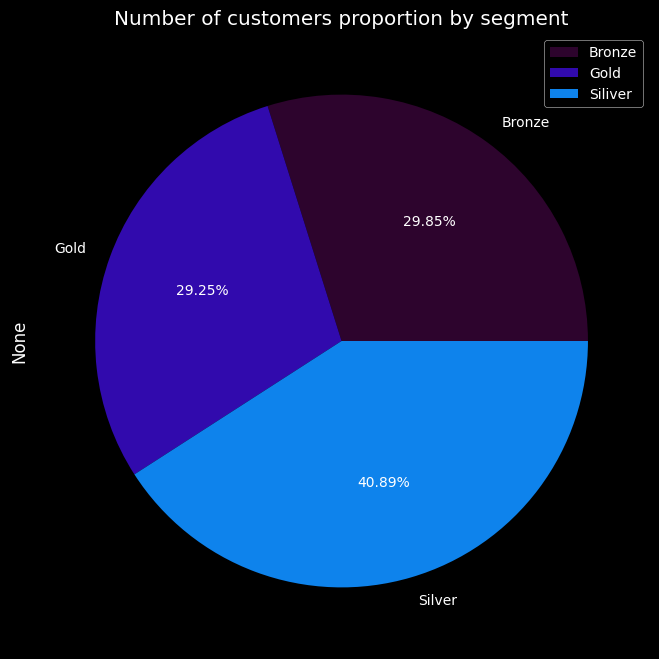

In [ ]:
RfmAnalysis = RfmData[['Segment1', 'Recency', 'Frequency', 'Monetary']]
fig, ax = plt.subplots(figsize = (16,8))
RfmAnalysis.groupby('Segment1')['Recency'].size().plot.pie(autopct = '%.2f%%',
                                                           ax = ax,
                                                           colors = ['#2d042d','#310aad', '#0e83ec'],
                                                          textprops={'color': 'white'})
ax.set_title('Number of customers proportion by segment')
ax.set_ylabel("None")
plt.legend(labels=["Bronze",  'Gold', 'Siliver'])
plt.show()


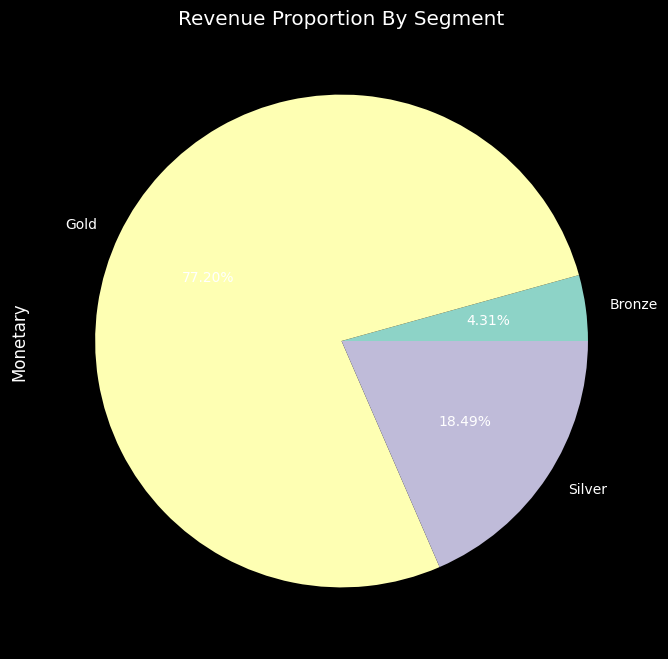

In [ ]:
fig, ax = plt.subplots(figsize = (16,8))
RfmAnalysis.groupby('Segment1')['Monetary'].sum().plot.pie(autopct = '%.2f%%',
                                                          ax = ax)
plt.title('Revenue Proportion By Segment')
plt.show()

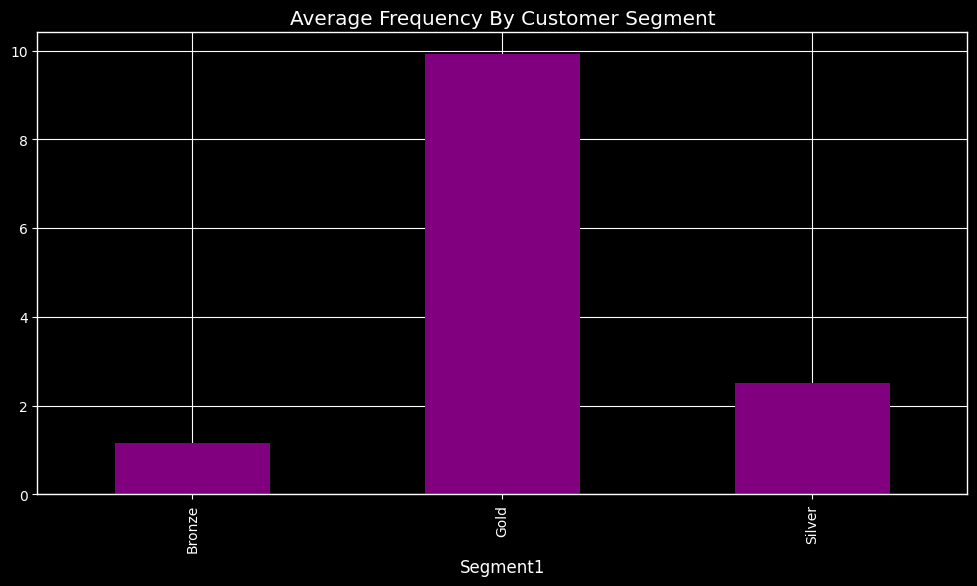

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
RfmAnalysis.groupby('Segment1')['Frequency'].mean().plot.bar(ax = ax, color = 'Purple')
plt.title('Average Frequency By Customer Segment')
plt.show()

Khách hàng tập trung nhiều ở phân khúc Siliver và gần như tương đương ở 2 phân khúc Gold và Bronze

Về Revenue và Frequency nhóm khách hàng ở phân khúc Gold tạo ra doanh thu nhiều hơn cũng như tần suất mua hàng của nhiều hơn 2 phân khúc còn lại

Tuy nhiên theo nguyên tắc Pareto 80% doanh thu phải đến từ 20% khách hàng thuộc nhóm khách hàng chính thì mới tối ưu được doanh thu, duy trì được mức doanh thu tối thiểu ( vì doanh thu đạt được chủ yếu đến từ nhóm khách hàng này) , đồng thời cũng tối ưu được chi phí,  thì với khoảng thời gian này công ty chưa đạt được điều đó khi doanh thu của nhóm khách hàng gold là 77.2% nhưng nhóm khách hàng gold chiếm 27%. Cửa hàng cần phải tập trung vào việc xây dựng mối quan hệ tốt với nhóm khách hàng này. Đảm bảo rằng cửa hàng phải thật sự hiểu rõ nhu cầu, mong muốn và sự hài lòng của khách hàng. Cung cấp dịch vụ chất lượng cao, giải pháp tối ưu hóa và hỗ trợ khách hàng để tạo ra giá trị và duy trì mối quan hệ lâu dài. Sử dụng các chiến lược tiếp thị đích danh và quảng cáo để tiếp cận khách hàng có tiềm năng cao để tăng cường họp nhất vào nhóm khách hàng Gold này. Điều chỉnh chiến lược tiếp thị và bán hàng để tập trung vào nhóm khách hàng quan trọng. Tạo ra các chương trình khuyến mãi, ưu đãi đặc biệt hoặc gói dịch vụ riêng cho nhóm khách hàng này. Đồng thời, cải thiện quy trình bán hàng và tương tác với khách hàng để tăng cường trải nghiệm của họ.
Theo dõi doanh thu và tiếp tục tối ưu hóa chiến lược để đạt được mục tiêu 80/20.

Đối với phân khúc sliver nên tặng voucher, khuyến mãi để tăng hứng thú mua hàng.

Phân Khúc Bronze nên chăm sóc hướng dẫn sử dụng sản phẩm, hỗ trợ bảo hành, xin feedback để thêm thông tin phục vụ cho việc tối ưu hoá trải nghiệm khách hàng => tăng CR và Revenue đồng thời nghiên cứu hành vi của họ để chuyển họ lên phân khúc cao hơn.


## Deep Dive Customer Segmentation

In [ ]:
 RfmData["FmScore"] = (RfmData["F"].astype(int)+RfmData["M"].astype(int))/2
 RfmData["FmScore"] = np.ceil(RfmData["FmScore"]).astype(int)
 RfmData['RfmSegment'] = RfmData[['R','FmScore']].astype(str).apply(lambda x: ''.join(x), axis = 1)
 display(RfmData)

Recency  Frequency  Monetary  R  F  M  RfmScore RfmSegment  \
CustomerID                                                               
12346.0         325          1    310.44  1  1  2         4         12   
12347.0           1          7   4310.00  4  4  4        12         44   
12348.0          74          4   1766.19  2  3  4         9         24   
12349.0          18          1   1490.70  3  1  3         7         32   
12350.0         309          1    330.95  1  1  2         4         12   
...             ...        ...       ... .. .. ..       ...        ...   
18280.0         277          1    180.60  1  2  1         4         12   
18281.0         180          1     80.82  1  2  1         4         12   
18282.0           7          2    178.05  4  3  1         8         42   
18283.0           3         16   2094.88  4  4  4        12         44   
18287.0          42          3   1837.28  3  3  4        10         34   

           Segment1  FmScore  
CustomerID                    
12346.0      Bronze        2  
12347.0        Gold        4  
12348.0      Silver        4  
12349.0      Silver        2  
12350.0      Bronze        2  
...             ...      ...  
18280.0      Bronze        2  
18281.0      Bronze        2  
18282.0      Silver        2  
18283.0        Gold        4  
18287.0        Gold        4  

[4338 rows x 10 columns]

Segmentation

1. ***Champions:*** Những khách hàng đã mua gần đây nhất và thường xuyên nhất và chi tiêu nhiều nhất.

2.   ***Loyal customers:*** Mua thường xuyên. Thường hứng thú với các chương trình khuyến mãi.

3. ***Potential loyalist:*** Khách hàng hoạt động gần đây với tần suất trung bình.

4. ***New/Recent customers:*** Mua gần đây nhất nhưng không thường xuyên.

5. ***Promising:*** Những người mua sắm gần đây nhưng chưa chi tiêu nhiều.

6. ***Needs attention:*** Giá trị ngày mua hàng gần nhất, tần suất và giá trị tiền tệ trên mức trung bình. Có thể họ đã không mua rất gần đây.

7. ***About to sleep:*** Tần suất và tần suất gần đây dưới mức trung bình. Những khách hàng có thể sẽ rời bỏ chúng ta, nếu không có hàng động kéo họ mua hàng trở lại.

8. ***At risk:*** Những khách hàng đã không mua trong một thời gian dài, cần đưa họ mua hàng trở lại

9. ***Can’t lose them:*** Thường xuyên mua nhưng lâu rồi chưa quay lại mua hàng.

10. ***Hibernating:*** Lần mua hàng trước đã lâu và số lượng đơn đặt hàng thấp. Có thể bị mất.

11. ***Lost***: Khách hàng đã rời bỏ chúng ta

In [ ]:
seg_map = {r'12': 'hibernating',
           r'21': 'hibernating',
           r'22': 'hibernating',
           r'11': 'lost',
           r'[1-2][3-4]': 'at_Risk',
           r'[1-2]5': 'cant_loose',
           r'3[1-2]': 'about_to_sleep',
           r'33': 'need_attention',
           r'[3-4][4-5]': 'loyal_customers',
           r'41': 'promising',
           r'51': 'new_customers',
           r'[4-5][2-3]': 'potential_loyalists',
           r'5[4-5]': 'champions'}

RfmData['segment'] = RfmData['RfmSegment'].replace(seg_map, regex = True)

RfmData.head()

Recency  Frequency  Monetary  R  F  M  RfmScore RfmSegment  \
CustomerID                                                               
12346.0         325          1    310.44  1  1  2         4         12   
12347.0           1          7   4310.00  4  4  4        12         44   
12348.0          74          4   1766.19  2  3  4         9         24   
12349.0          18          1   1490.70  3  1  3         7         32   
12350.0         309          1    330.95  1  1  2         4         12   

           Segment1  FmScore          segment  
CustomerID                                     
12346.0      Bronze        2      hibernating  
12347.0        Gold        4  loyal_customers  
12348.0      Silver        4          at_Risk  
12349.0      Silver        2   about_to_sleep  
12350.0      Bronze        2      hibernating

In [ ]:
segments = RfmData.loc[:,"segment"].reset_index()
segments

CustomerID              segment
0        12346.0          hibernating
1        12347.0      loyal_customers
2        12348.0              at_Risk
3        12349.0       about_to_sleep
4        12350.0          hibernating
...          ...                  ...
4333     18280.0          hibernating
4334     18281.0          hibernating
4335     18282.0  potential_loyalists
4336     18283.0      loyal_customers
4337     18287.0      loyal_customers

[4338 rows x 2 columns]

In [ ]:
import plotly.express as px

In [ ]:
segments = segments.groupby(['segment']).size().sort_values(ascending=True).reset_index(name="Count")
Total = segments['Count'].sum()
segments["%SoKhachHang"] = round(segments["Count"] / Total * 100,2)

fig = px.bar(
    segments,
    y='segment',
    x='%SoKhachHang',
    orientation='h',
    title='Tỉ trọng nhóm khách hàng',
    text='%SoKhachHang',
    color='%SoKhachHang',
    color_continuous_scale='ice'
)
fig.update_layout(xaxis_tickformat=':.2%')
fig.update_traces(textposition='inside')
fig.update_layout(plot_bgcolor='mintcream')
fig.update_layout(height=600)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
RfmData[['Recency','Monetary','Frequency','segment']]\
.groupby('segment')\
.agg({'count', 'mean','std','max','min'})

Recency                                  Monetary  \
                           std  min count  max        mean           std   
segment                                                                    
about_to_sleep        9.868584   18   377   50   32.496021    201.759812   
at_Risk              69.347159   51   771  371  121.180285   1357.869761   
hibernating          96.880918   51  1077  373  168.364903    237.232391   
lost                 65.416866  142   302  373  267.205298     67.150841   
loyal_customers      13.045022    0  1026   50   14.923002  15149.457819   
need_attention        9.340504   18   326   50   30.966258    540.717623   
potential_loyalists   5.349952    0   415   17    8.640964    405.706798   
promising             5.276449    0    44   17    8.795455     60.056026   

                                                            Frequency      \
                        min count         max         mean        std min   
segment                                                                     
about_to_sleep         6.90   377    1618.410   327.248581   0.535402   1   
at_Risk               70.02   771   11578.875  1504.145158   2.383153   1   
hibernating            3.75  1077    1595.480   362.988483   0.522376   1   
lost                  15.00   302     302.700   158.434040   0.000000   1   
loyal_customers      680.18  1026  266157.405  5734.820312  13.454716   2   
need_attention       306.46   326    6207.670   952.596184   0.832203   1   
potential_loyalists   35.40   415    2868.900   684.294301   1.099804   1   
promising             41.99    44     301.290   181.873409   0.000000   1   

                                           
                    count  max       mean  
segment                                    
about_to_sleep        377    4   1.350133  
at_Risk               771   34   3.743191  
hibernating          1077    4   1.289694  
lost                  302    1   1.000000  
loyal_customers      1026  209  11.081871  
need_attention        326    5   2.923313  
potential_loyalists   415    7   2.609639  
promising              44    1   1.000000

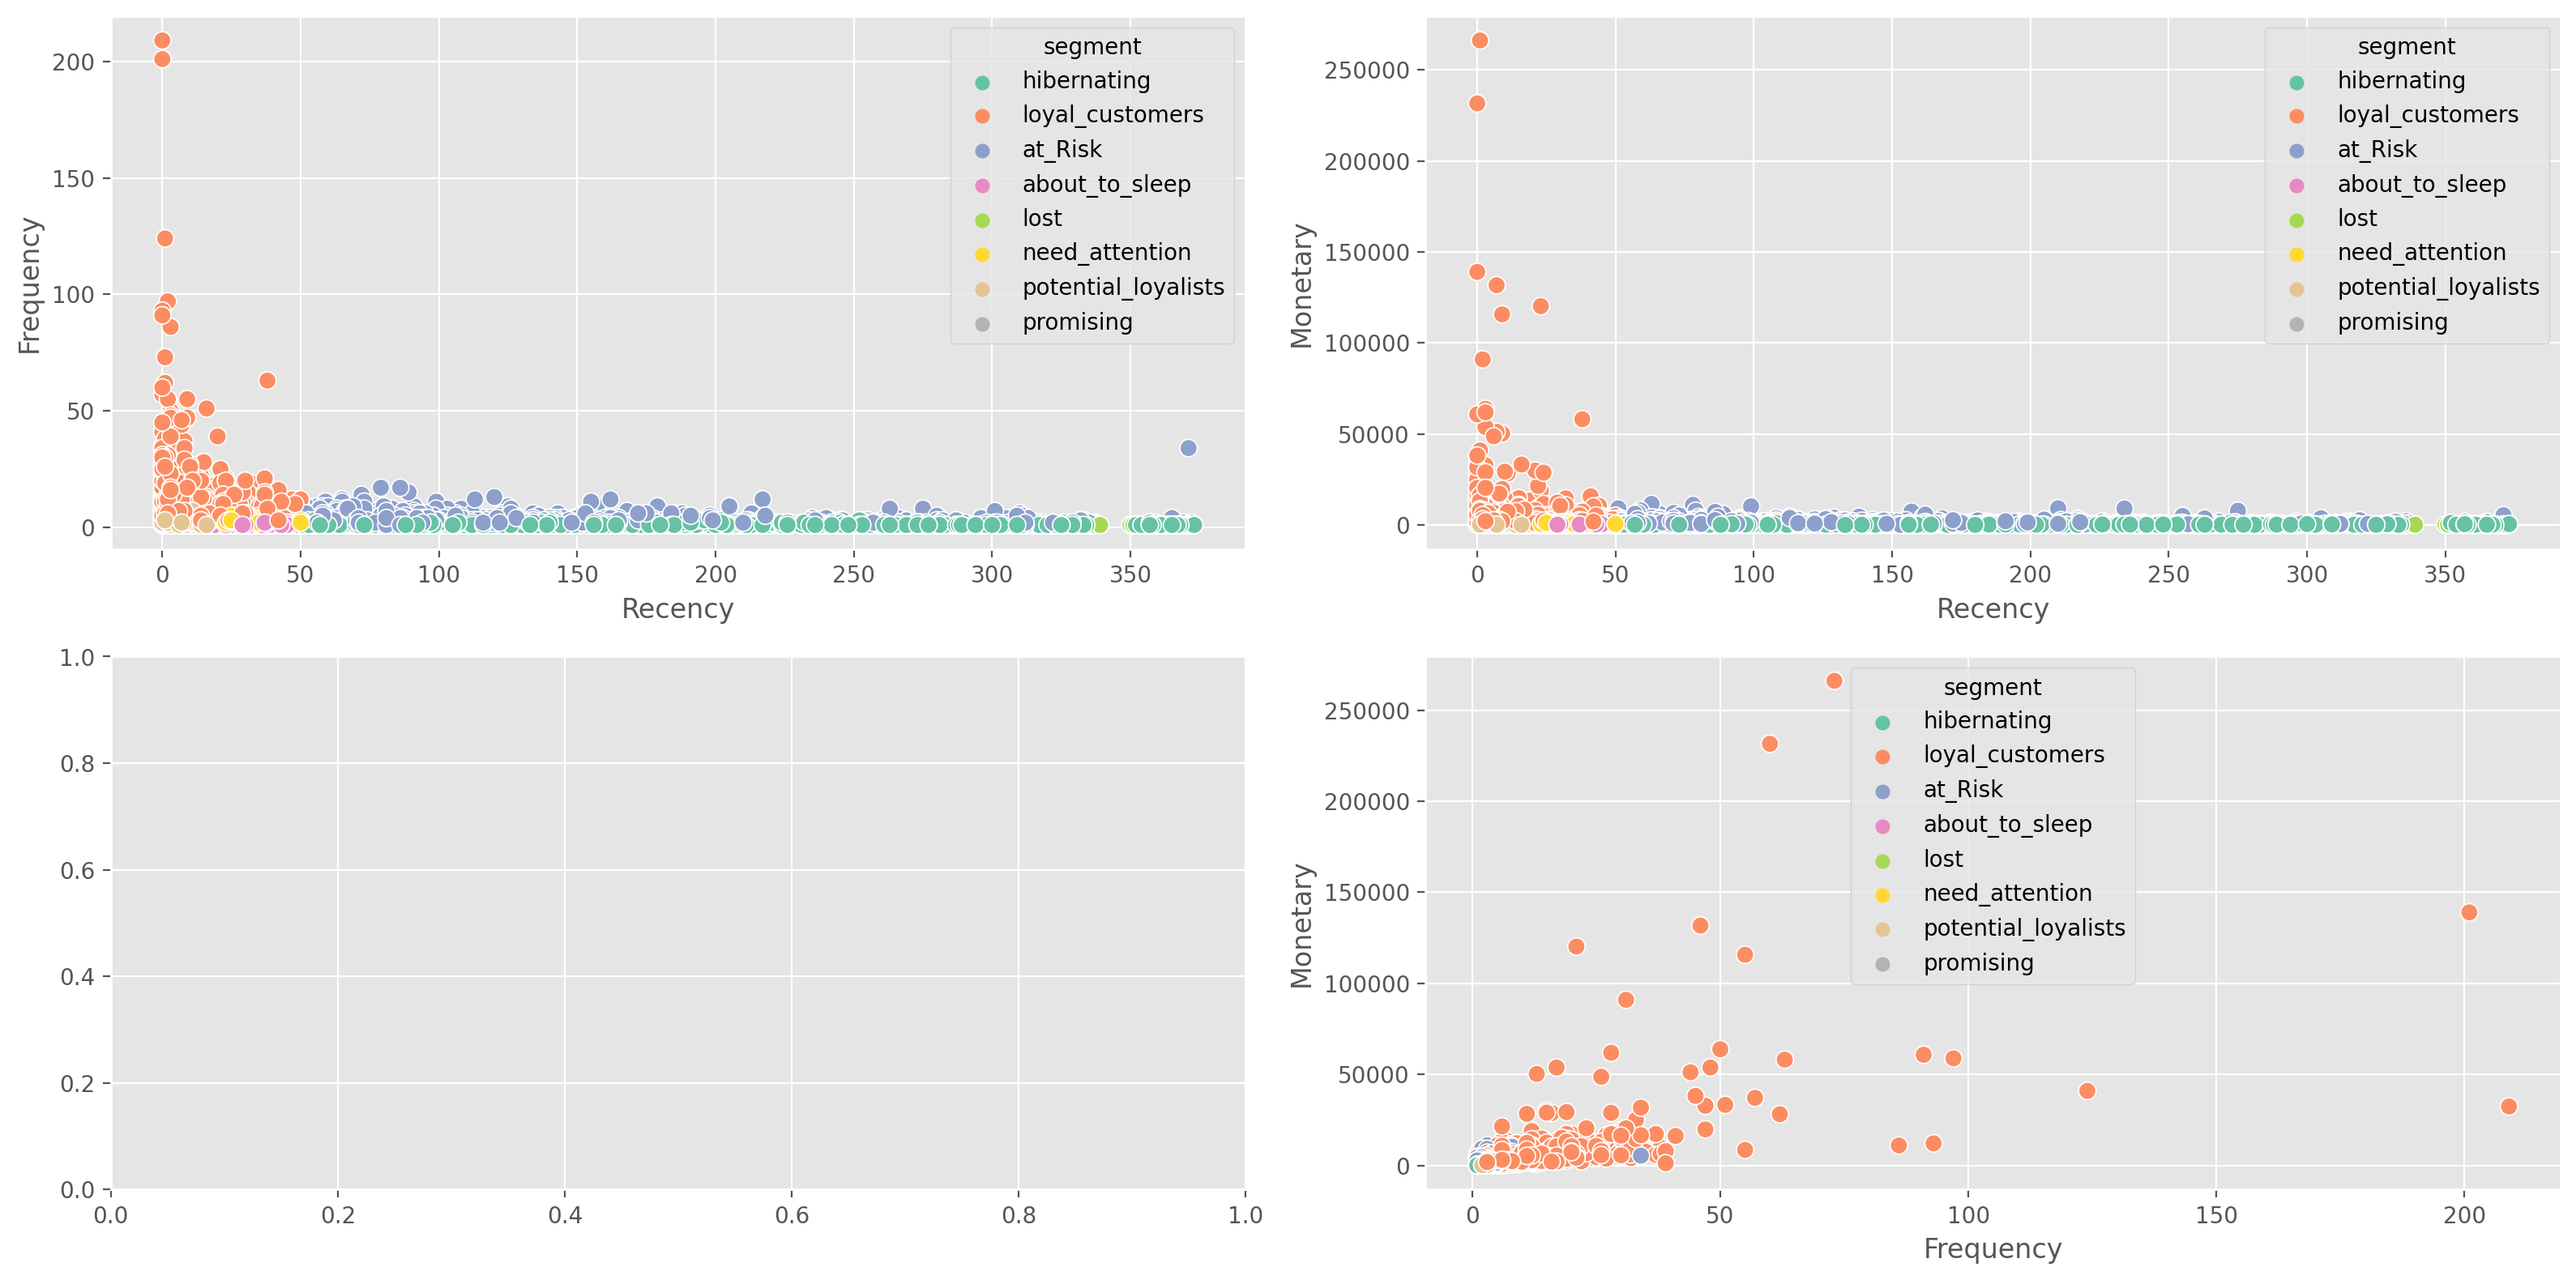

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(16, 8), dpi=200)
feature = ['Recency', 'Frequency', 'Monetary']
for i in range(0, len(feature), 1):
    for j in range(i+1, len(feature), 1):
        if i == 1 and j == 1:
            plt.axis( 'off' )
        else:
            sns.scatterplot(ax=ax[i, j-1], data=RfmData, x=RfmData[feature[i]],
                            y=RfmData[feature[j]],
                            hue='segment',
                            palette="Set2",
                            s=60)
fig.tight_layout()
plt.show()

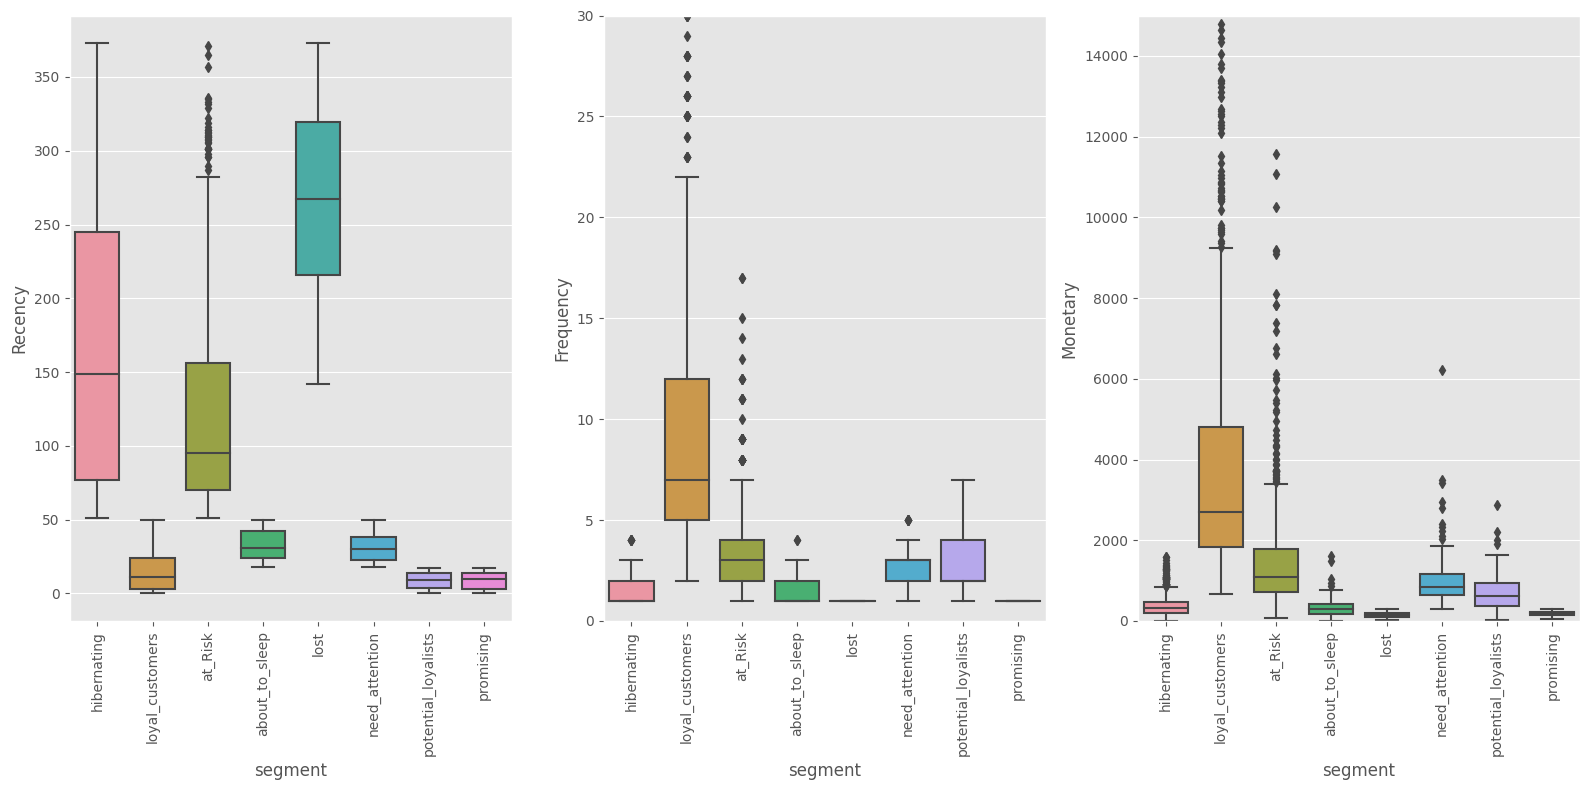

In [ ]:

fig = plt.figure (figsize = (16,8 ))
for i, c in enumerate(feature):
   ax = fig.add_subplot(1,3,i+1)
   sns.boxplot(ax = ax, data = RfmData, x = 'segment', y = feature[i])
   ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
   if i == 1:
    ax.set_ylim([0,30])
   elif i == 2:
    ax.set_ylim([0,15000])
plt.tight_layout()
plt.show()

In [ ]:
display(RfmData)

Recency  Frequency  Monetary  R  F  M  RfmScore RfmSegment  \
CustomerID                                                               
12346.0         325          1    310.44  1  1  2         4         12   
12347.0           1          7   4310.00  4  4  4        12         44   
12348.0          74          4   1766.19  2  3  4         9         24   
12349.0          18          1   1490.70  3  1  3         7         32   
12350.0         309          1    330.95  1  1  2         4         12   
...             ...        ...       ... .. .. ..       ...        ...   
18280.0         277          1    180.60  1  2  1         4         12   
18281.0         180          1     80.82  1  2  1         4         12   
18282.0           7          2    178.05  4  3  1         8         42   
18283.0           3         16   2094.88  4  4  4        12         44   
18287.0          42          3   1837.28  3  3  4        10         34   

           Segment1  FmScore              segment  
CustomerID                                         
12346.0      Bronze        2          hibernating  
12347.0        Gold        4      loyal_customers  
12348.0      Silver        4              at_Risk  
12349.0      Silver        2       about_to_sleep  
12350.0      Bronze        2          hibernating  
...             ...      ...                  ...  
18280.0      Bronze        2          hibernating  
18281.0      Bronze        2          hibernating  
18282.0      Silver        2  potential_loyalists  
18283.0        Gold        4      loyal_customers  
18287.0        Gold        4      loyal_customers  

[4338 rows x 11 columns]

In [ ]:
ParetoData = RfmData.groupby("segment")["Monetary"].sum().\
sort_values(ascending = False).\
reset_index(name = "Value")
display(ParetoData)

segment        Value
0      loyal_customers  5883925.640
1              at_Risk  1159695.917
2          hibernating   390938.596
3       need_attention   310546.356
4  potential_loyalists   283982.135
5       about_to_sleep   123372.715
6                 lost    47847.080
7            promising     8002.430

In [ ]:
ParetoData["%Value"]  =  round(ParetoData["Value"]/ParetoData["Value"].sum()*100,2)
ParetoData['cumulative_%value'] = np.cumsum(ParetoData["%Value"])
ParetoData


segment        Value  %Value  cumulative_%value
0      loyal_customers  5883925.640   71.68              71.68
1              at_Risk  1159695.917   14.13              85.81
2          hibernating   390938.596    4.76              90.57
3       need_attention   310546.356    3.78              94.35
4  potential_loyalists   283982.135    3.46              97.81
5       about_to_sleep   123372.715    1.50              99.31
6                 lost    47847.080    0.58              99.89
7            promising     8002.430    0.10              99.99

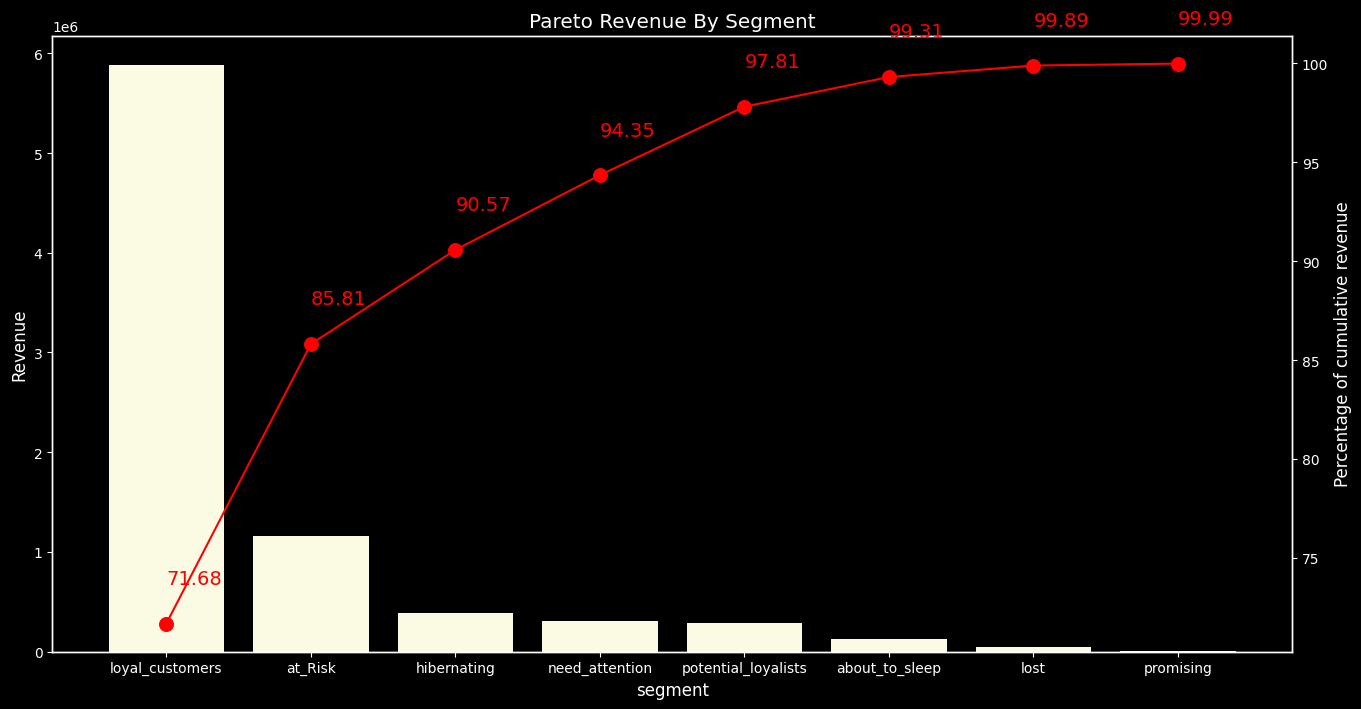

In [ ]:
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(16, 8))
ax.grid(False)
sns.barplot(x=ParetoData.segment, y=ParetoData['Value'], color='lightyellow', ax=ax)
ax2 = ax.twinx()
ax2.grid(False)
sns.lineplot(x=ParetoData.segment, y=ParetoData['cumulative_%value'], ax=ax2,
             color='red', marker='o', markeredgecolor='red',
             markerfacecolor='red', markersize=10)
ax.set_ylabel("Revenue")
ax2.set_ylabel("Percentage of cumulative revenue")
plt.title("Pareto Revenue By Segment")
for x, y in zip(ParetoData.segment, ParetoData['cumulative_%value']):
    ax2.text(x, y + 2, s = '{:.2f}'.format(y), color="red", size=14)
plt.show()


Hibernating: Lần mua hàng trước đã lâu và số lượng đơn đặt hàng thấp. Có thể bị mất Chiêm 24.83% về số lượng khách hàng

Loyal_customer: Mua thường xuyên. Thường hứng thú với các chương trình khuyến mãi. Chiếm 23.65% về số lượng khách hàng

At_risk: Những khách hàng đã không mua trong một thời gian dài, cần đưa họ mua hàng trở lại. Chiếm 17.77% về số lượng khách hàng

Qua biểu đồ Pareto ta thấy được ba nhóm khách hàng trên chiếm 90.57% doanh thu của cửa hàng. Tuy nhiên vì retention rate của cửa hàng thấp đồng thời những chính sách khuyến khích khách hàng quay trở lại mua hàng thật sự chưa hiệu quả cho nên 2 nhóm hibernating và at_risk đã mất một thời gian đài để quay trở lại hoặc có thể  họ không quay lại cửa hàng. Mặc dù 2 nhóm này chiếm lượng doanh thu lớn hơn so với các nhóm còn lại. Mặc khác nhóm loyal_customer chiếm 23.65% số lượng khách hàng nhưng chỉ chiếm 71.68% tổng doanh thu vẫn chưa đáp ứng được nguyên lý 80-20 của Pareto. Cửa hàng cần phải có những chính sách hiệu quả hơn nữa để nhóm khách hàng loyal_customer chi tiền hơn nữa vì nhóm này rất dễ dàng chấp nhận sản phẩm của chúng ta, tạo ra các chương trình CrossSale, Upsale để khuyến khích họ mua hàng. Đồng thời 2 nhóm còn lại phải có những hành động khuyến mãi, giảm giá, tặng voucher, nhắc nhở họ mua hàng để họ quay trở lại lần sau cũng như kích thích nhu cầu mua sắm của họ

## Conclusion

Trong giai đoạn này cửa hàng có tỷ lệ retention rate thấp nhưng lại giảm dần theo thời gian điều này ảnh hưởng rất lớn đến doanh thu mà cửa hàng sẽ nhận được. Mặc khác nguyên nhân chủ yếu của việc này là cửa hàng chưa có những chính sách khuyến khích khách hàng quay lại hiệu quả. Trong bài phân tích này đã đưa ra một số giải pháp phân khúc khách hàng như dùng mô hình RFM để segment khách hàng hay deep dive segment và đưa ra một số giải pháp cho từng segment để cửa hàng tạo ra kế hoạch tiếp thị hợp lí đúng tới đối tượng từ đó tăng tỉ lệ customer retention.